
<div align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/Escudo-UdeA.svg/970px-Escudo-UdeA.svg.png" width="300" height="300">
</div>

# **MODELO DE PREDICCIÓN DE TIEMPO DE ESPERA DE LOS ASEGURADOS EN INCIDENTES DE TRÁNSITO**

# **ESTUDIANTES**

# **Diego Fernando Londoño Londoño**

# **Yenny Patricia Vergara Monsalve**

# **1. DESCRIPCIÓN DEL PROYECTO**


El presente proyecto tiene como objetivo desarrollar un modelo predictivo que estime el tiempo de espera de un asegurado tras reportar un accidente de tránsito, con el fin de optimizar los procesos de atención y mejorar la experiencia del cliente en una compañía aseguradora.

La iniciativa surge de la necesidad de contar con herramientas analíticas que permitan anticipar demoras y gestionar de forma eficiente los recursos disponibles en campo, como gestores de siniestros y unidades móviles.

Para ello, se utilizó un conjunto de datos históricos de siniestros, registrados por la aseguradora a través de sus sistemas de gestión durante un período determinado. Estos datos incluyen variables relacionadas con la ubicación, hora del incidente, tipo de accidente, tráfico, disponibilidad de personal y otros factores relevantes como el clima y la distancia.

Se implementó un proceso iterativo que incluyó limpieza, análisis exploratorio, selección de variables y entrenamiento de distintos modelos de machine learning como regresión lineal, árboles de decisión y random forest, evaluando su desempeño mediante métricas como el MAE y el RMSE.

Entre los principales obstáculos se encontraron problemas de calidad de datos, presencia de valores atípicos y desequilibrios en la distribución de los tiempos de atención.

Los resultados obtenidos muestran que el modelo tiene un desempeño aceptable para predecir tiempos de espera con un margen de error razonable, y representa una herramienta valiosa para la toma de decisiones operativas en tiempo real.


# **2. OBJETIVOS**


**Objetivo del Proyecto**

Predecir el tiempo de espera en la atención de un asegurado durante una incidencia de tránsito, desarrollando un modelo de Machine Learning con el fin de brindar soporte al proceso del gestor de seguros.

**Objetivos Específicos**

•	Realizar un análisis exploratorio y limpieza de datos provenientes de los datos históricos de siniestros para identificar patrones, inconsistencias y variables relevantes.

•	Construir variables derivadas (ingeniería de características) que integren factores espaciales, temporales y contextuales como clima, tráfico, distancia, entre otros.

•	Entrenar y comparar modelos de aprendizaje automático para estimar el tiempo de espera, evaluando su desempeño con métricas como MAE, RMSE y R2

•	Seleccionar el modelo con mejor desempeño y validar su capacidad predictiva para su futura integración en los sistemas de gestión de siniestros de la aseguradora.

•	Emitir el conjunto de recomendaciones correspondientes que permitan mejorar el rendimiento del modelo seleccionado en etapas posteriores de la investigación



# **3. IMPORTACIÓN DE LIBRERÍAS**

## **3.1. Librerias y configuraciones previas**

In [ ]:
# Gestion de librerias
# ==============================================================================
import numpy as np
import pandas as pd
import math
from importlib import reload

# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib

# Preprocesado y modelado
# ==============================================================================

#creación de modelos
from sklearn.ensemble import GradientBoostingRegressor

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#evaluacion de variables
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
import multiprocessing

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from rich import print

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#Instalar libereria
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 1.9 MB/s eta 0:00:00


## **3.2. Funciones**

In [ ]:
# Función para graficar atributos en barras, pair plot o box-plot
def multiple_plot(ncols, data, columns, target_var, plot_type, title, rot):
    '''
    Función para graficar atributos en barras, pair plot o box-plot.
        Parameters:
            ncols       [integer]    Number of columns for subplots.
            data        [dataframe]  Features dataframe.
            columns     [list]       List of names of featutes in dataframe to plot.
            target_var  [string]     Name of column of target variable or feature.
            plot_type   [string]     Name of graphic. [countplot, boxplt or scatterplot]
            title       [string]     Title for figure
            rot         [integer]    Rotation angle for x axis labels
        Returns:
            Plot of figure

    Ejemplos:
        multiple_plot(1, d , None, 'bad_credit', 'countplot', 'Frecuencia de instancias para la variable bad_credit',0)
        multiple_plot(1, d , 'purpose', 'age_yrs', 'boxplot', 'Distribución de la variable próposito vs la edad',90)
        multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)
        multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)
        multiple_plot(3, d , catCols, 'age_yrs', 'boxplot', 'Distribución de la variables categóticas vs. la edad',30)
    '''


    # Paletas de colores y colores de las gráficas
    paletas = ['nipy_spectral','hsv','jet_r','Paired','Set2','Dark2','tab10','husl','mako']
    color = ['steelblue','forestgreen', 'amber']


    # Parámetros iniciales
    title_dist = 1.1  # Ajusta la distancia vertical del título en el gráfico
    x = -1            # Ubicación en el eje x del gráfico
    y =  0            # Ubicación en el eje y del gráfico
    nrows = 1         # Número inicial de filas


    # Ajustar el número de filas según el tipo de gráfico y la cantidad de columnas
    if isinstance(columns, list):
        nrows = math.ceil(len(columns) / ncols)

    # Crear el gráfico según el tipo especificado
    if ((nrows <= 1 and ncols <= 1) or plot_type == 'scatterplot'):

        # Countplot
        if plot_type == 'countplot':
            # Configurar el gráfico countplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.countplot(data=data,
                          x=target_var,
                          ax=axes,
                          palette=paletas[0],
                          zorder=1,
                          order=data[target_var].value_counts().index,
                          alpha=0.8
                          )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)

        # Boxplot
        elif plot_type == 'boxplot':
            # Configurar el gráfico boxplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.boxplot(data=data,
                        x=columns,
                        y=target_var,
                        ax=axes,
                        palette=paletas[0],
                        zorder=1
                        )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)


        # Scatterplot Matrix (Pairplot)
        elif plot_type == 'scatterplot':
            # Configurar el gráfico pairplot
            plot = sns.pairplot(data[columns],
                                palette=paletas[0],
                                diag_kws={'color': color[1]},
                                plot_kws={'color': color[0]},
                                diag_kind='kde'
                                )
            # Ajustar el tamaño del gráfico
            plot.fig.set_size_inches(12, 12)
            # Añadir un título al pairplot
            plot.fig.suptitle(title, fontsize=14, fontweight="bold")
            # Ajustar el diseño para evitar solapamientos
            plt.subplots_adjust(top=0.9)
            # Mostrar el gráfico
            plt.show()

    # Graficar más de un subplot
    else:
        # Crear subplots con el número especificado de filas y columnas
        fig, axes = plt.subplots(nrows, ncols, figsize=(15, (nrows * 3) + 1))

        for i, column in enumerate(columns):
            x = x + 1

            # Reiniciar x e incrementar y si x alcanza el número de columnas
            if x >= ncols:
                y = y + 1
                x = 0

            # Configurar el subplot actual
            if nrows == 1:
                ax_cond = axes[i]
                title_dist = 1.1
            else:
                ax_cond = axes[y, x]

            # Crear el gráfico según el tipo especificado
            if plot_type == 'countplot':
                # Countplot
                sns.countplot(data=data,
                              x=column,
                              ax=ax_cond,
                              palette=paletas[0],
                              zorder=1,
                              edgecolor='black',
                              linewidth=0.5,
                              order=data[column].value_counts().index
                              )

            elif plot_type == 'boxplot':
                # Boxplot
                sns.boxplot(data=data,
                            x=column,
                            y=target_var,
                            ax=ax_cond,
                            palette=paletas[0],
                            zorder=1
                            )

            # Añadir cuadrícula en el eje y
            ax_cond.grid(axis='y', zorder=0)
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título del subplot
            ax_cond.set_title(column, fontsize=10)
            # Ajustar tamaño de las etiquetas
            ax_cond.tick_params(labelsize=8)
            # Limpiar etiquetas del eje x
            ax_cond.set_xlabel("")

        # Ajustar el diseño y el título general del conjunto de subplots
        fig.tight_layout()
        fig.suptitle(title, fontsize=14, fontweight="bold", y=title_dist - 0.15)
        plt.subplots_adjust(top=0.9)

        # Eliminar subplots sin datos si hay más de una fila
        if nrows > 1:
            for ax in axes.flat:
                if not bool(ax.has_data()):
                    fig.delaxes(ax)  # Eliminar si no hay datos en el subplot

# **4. CARGA DE DATOS**

## **4.1. Carga del dataset**

In [7]:
# Cargar dataset final para el procesamiento
# ==============================================================================
import pandas as pd

archivo = "https://github.com/ferdilo04/Monografia_EACD/raw/refs/heads/main/DataSet/DataSet_final_escalado.xlsx"
df = pd.read_excel(archivo)

# Ver estructura básica
display(df.head(3))

# Configuración estética
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

,annoregistro,mesregistro,diaregistro,horaregistro,diasemana,annoatencion,mesatencion,diaatencion,Horaantencion,TiempoAtencion,...,fechallegada_mes,fechallegada_dia,fechallegada_hora,Abogadounico_freq,franja_horaria,hora_sin,hora_cos,atencion_lenta,condicion_lluvia,Municipio_top
0,2016,6,8,9,Miercoles,2016,6,8,9,0,...,1970-01-01,1970-01-01,1970-01-01,0.03972,Pico Mañana,0.707107,-0.707107,0,No,Medellín
1,2016,6,8,11,Miercoles,2016,6,8,11,0,...,1970-01-01,1970-01-01,1970-01-01,0.03972,Día Normal,0.258819,-0.965926,0,No,Medellín
2,2016,6,8,14,Miercoles,2016,6,8,14,0,...,1970-01-01,1970-01-01,1970-01-01,0.03972,Día Normal,-0.500000,-0.866025,0,No,Medellín


<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

# **5. RESUMEN DATASET**

\##**5.1. Resumen General del Dataset**

In [ ]:
# Identificar columnas numéricas y columnas categóricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("[bold]RESUMEN GENERAL DEL DATASET [/bold]")
print(f"Total de filas: {df.shape[0]}")
print(f"Total de columnas: {df.shape[1]}")
print(f"Variables numéricas: {len(numeric_cols)}")
print(f"Variables categóricas: {len(cat_cols)}")


RESUMEN GENERAL DEL DATASET 

Total de filas: 8040

Total de columnas: 40

Variables numéricas: 14

Variables categóricas: 18

# **6. TIPOS DE DATOS**



### **6.1. Identificación de los tipos de columnas que tiene el DataSet**

In [ ]:
df.info() #Visualización de las columnas e identificación de los tipos de columnas que tiene el DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   annoregistro       8040 non-null   int64         
 1   mesregistro        8040 non-null   int64         
 2   diaregistro        8040 non-null   int64         
 3   horaregistro       8040 non-null   int64         
 4   diasemana          8040 non-null   object        
 5   annoatencion       8040 non-null   int64         
 6   mesatencion        8040 non-null   int64         
 7   diaatencion        8040 non-null   int64         
 8   Horaantencion      8040 non-null   int64         
 9   TiempoAtencion     8040 non-null   int64         
 10  HoraPicoTarde      8040 non-null   object        
 11  HoraPicoManana     8040 non-null   object        
 12  InicioNoche        8040 non-null   object        
 13  Amanecer           8040 non-null   object        
 14  Municipi

# **7. SEGMENTACIÓN DE LOS DATOS**

## **7.1. División del DataSet en Entrenamiento, Validación y Prueba**



División consistente completada:

,Conjunto,Registros,Porcentaje (%)
0,Entrenamiento,5145,63.992537
1,Validación,1287,16.007463
2,Prueba,1608,20.000000


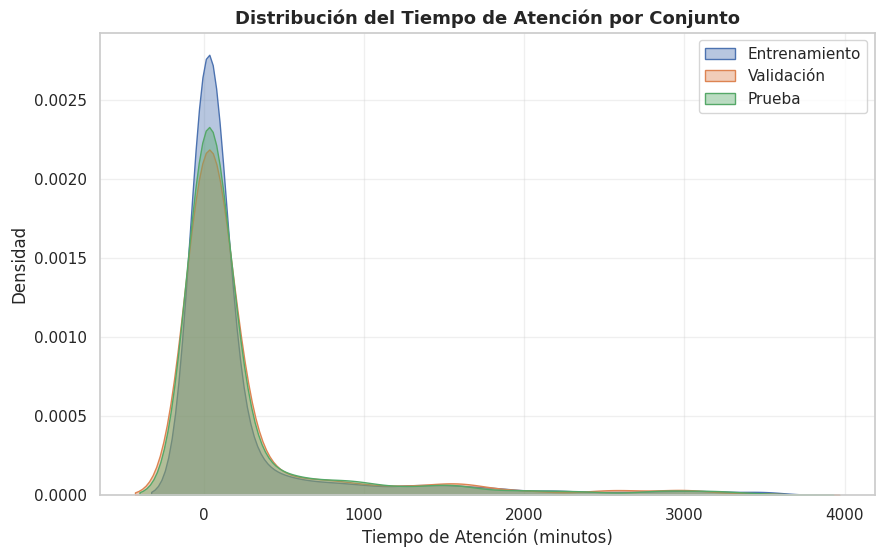

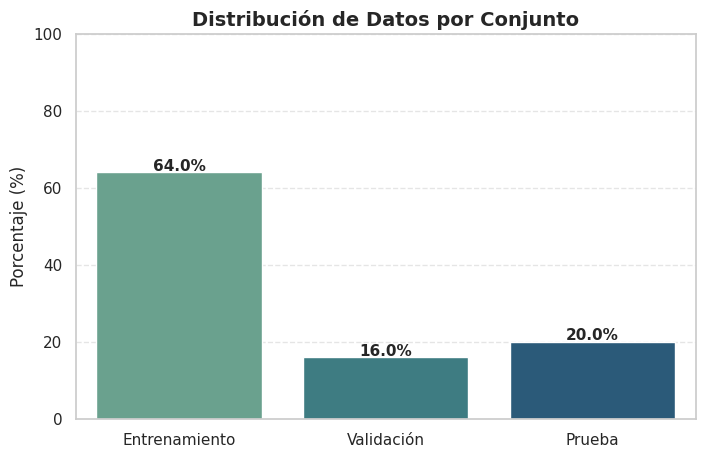

In [ ]:
def dividir_dataset(df, columna_objetivo='TiempoAtencion',
                             test_size=0.2, valid_size=0.2, random_state=42, estratificar=True):
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import seaborn as sns

    np.random.seed(random_state)

    X = df.drop(columns=[columna_objetivo])
    y = df[columna_objetivo]

    #  Si se desea estratificar, creamos "bins" de la variable continua
    if estratificar:
        # Agrupar los tiempos en 5 rangos aproximados
        y_bins = pd.qcut(y, q=5, duplicates='drop')
        strat = y_bins
    else:
        strat = None

    # 1️ División inicial: Train + Test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=strat
    )

    # 2️ División secundaria: Train → Train_final + Valid
    if estratificar:
        y_bins_train = pd.qcut(y_train, q=5, duplicates='drop')
        strat_train = y_bins_train
    else:
        strat_train = None

    X_train_final, X_valid, y_train_final, y_valid = train_test_split(
        X_train, y_train, test_size=valid_size, random_state=random_state, stratify=strat_train
    )

    # 3️ Resumen de tamaños
    total = len(df)
    resumen = pd.DataFrame({
        'Conjunto': ['Entrenamiento', 'Validación', 'Prueba'],
        'Registros': [len(X_train_final), len(X_valid), len(X_test)],
        'Porcentaje (%)': [
            len(X_train_final)/total*100,
            len(X_valid)/total*100,
            len(X_test)/total*100
        ]
    })

    print("\n División consistente completada:")
    display(resumen)

    # 4️ Visualización de la variable objetivo
    plt.figure(figsize=(10, 6))
    sns.kdeplot(y_train_final, label='Entrenamiento', fill=True, alpha=0.4)
    sns.kdeplot(y_valid, label='Validación', fill=True, alpha=0.4)
    sns.kdeplot(y_test, label='Prueba', fill=True, alpha=0.4)
    plt.title('Distribución del Tiempo de Atención por Conjunto', fontsize=13, fontweight='bold')
    plt.xlabel('Tiempo de Atención (minutos)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.barplot(data=resumen, x='Conjunto', y='Porcentaje (%)', palette='crest')
    for i, val in enumerate(resumen['Porcentaje (%)']):
        plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', fontsize=11, fontweight='bold')
    plt.title('Distribución de Datos por Conjunto', fontsize=14, fontweight='bold')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel('')
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    return {
        'X_train': X_train_final,
        'X_valid': X_valid,
        'X_test': X_test,
        'y_train': y_train_final,
        'y_valid': y_valid,
        'y_test': y_test,
        'resumen': resumen
    }

df_limpio = df.copy()
conjuntos = dividir_dataset(df_limpio, columna_objetivo='TiempoAtencion', estratificar=True)


## **7.2. Conversión de Variables Datetime a Numéricas**

In [ ]:
# =========================================================
# DETECCIÓN Y CONVERSIÓN AUTOMÁTICA DE COLUMNAS DE FECHA
# =========================================================
import pandas as pd

def detectar_y_convertir_fechas(conjuntos, palabras_clave=['fecha', 'hora', 'tiempo']):
    """
    Detecta columnas que parezcan representar fechas u horas
    y las convierte automáticamente a tipo datetime en los DataFrames del diccionario.
    Ignora las Series (como y_train, y_valid, y_test).
    """
    conjuntos_actualizados = {}

    for nombre, df in conjuntos.items():
        # Solo procesar si el elemento es un DataFrame
        if not isinstance(df, pd.DataFrame):
            conjuntos_actualizados[nombre] = df
            continue

        df = df.copy()
        columnas_fecha = [col for col in df.columns if any(p in col.lower() for p in palabras_clave)]

        if columnas_fecha:
            print(f" {nombre}: se detectaron posibles columnas de fecha → {columnas_fecha}")
            for col in columnas_fecha:
                df[col] = pd.to_datetime(df[col], errors='coerce')
        else:
            print(f" {nombre}: no se detectaron columnas relacionadas con fechas.")

        conjuntos_actualizados[nombre] = df

    return conjuntos_actualizados


# =========================================================
# TRANSFORMACIÓN DE FECHAS A VARIABLES NUMÉRICAS
# =========================================================
def transformar_fechas(X, mostrar_info=True):
    """
    Convierte todas las columnas datetime en variables numéricas:
    año, mes, día, hora, minuto y día de la semana.
    """
    X = X.copy()
    cols_datetime = X.select_dtypes(include=['datetime64[ns]']).columns

    if len(cols_datetime) == 0:
        if mostrar_info:
            print(" No se encontraron columnas tipo datetime.")
        return X

    for col in cols_datetime:
        X[f'{col}_year'] = X[col].dt.year
        X[f'{col}_month'] = X[col].dt.month
        X[f'{col}_day'] = X[col].dt.day
        X[f'{col}_hour'] = X[col].dt.hour
        X[f'{col}_minute'] = X[col].dt.minute
        X[f'{col}_dayofweek'] = X[col].dt.dayofweek  # 0=Lunes, 6=Domingo
        X.drop(columns=[col], inplace=True)

    if mostrar_info:
        print(f" Se transformaron {len(cols_datetime)} columnas datetime a variables numéricas.")
        print("   Columnas transformadas:", list(cols_datetime))

    return X


# =========================================================
# APLICACIÓN AUTOMÁTICA EN TODOS LOS CONJUNTOS
# =========================================================
conjuntos = detectar_y_convertir_fechas(conjuntos)

# Aplicar solo a los conjuntos de características
X_train_final = transformar_fechas(conjuntos['X_train'])
X_valid = transformar_fechas(conjuntos['X_valid'])
X_test = transformar_fechas(conjuntos['X_test'])

print("\n Conversión y transformación completadas correctamente.")


X_train: se detectaron posibles columnas de fecha → ['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 
'HoraPicoTarde', 'HoraPicoManana']

X_valid: se detectaron posibles columnas de fecha → ['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 
'HoraPicoTarde', 'HoraPicoManana']

X_test: se detectaron posibles columnas de fecha → ['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 
'HoraPicoTarde', 'HoraPicoManana']

resumen: no se detectaron columnas relacionadas con fechas.

Se transformaron 6 columnas datetime a variables numéricas.

Columnas transformadas:
['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 'HoraPicoTarde', 'HoraPicoManana']

Se transformaron 6 columnas datetime a variables numéricas.

Columnas transformadas:
['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 'HoraPicoTarde', 'HoraPicoManana']

Se transformaron 6 columnas datetime a variables numéricas.

Columnas transformadas:
['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 'HoraPicoTarde', 'HoraPicoManana']

Conversión y transformación completadas correctamente.

Columnas datetime detectadas: ['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 'HoraPicoTarde', 
'HoraPicoManana']

Visualizaciones de distribución temporal:

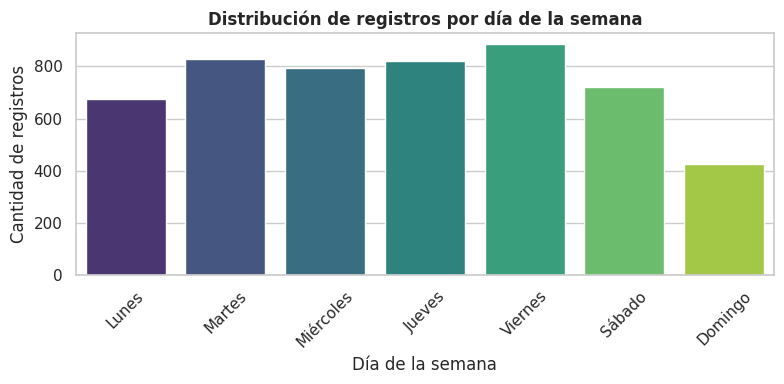

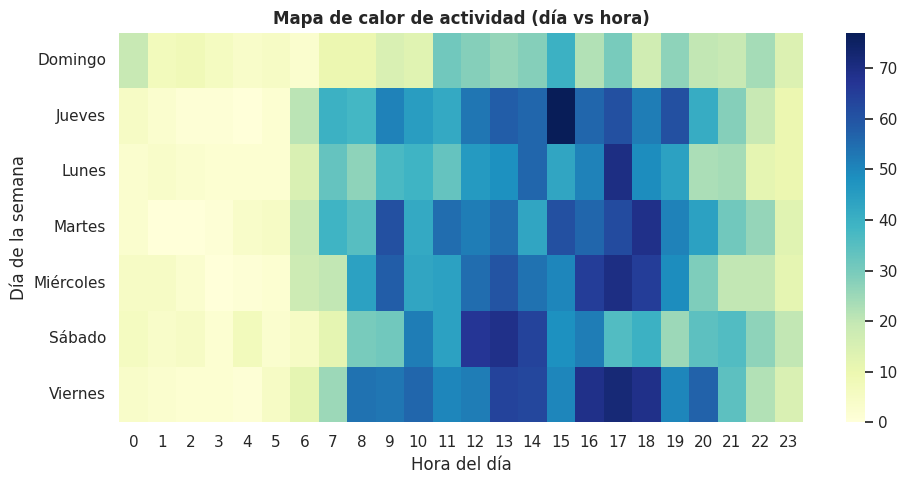

Columnas datetime detectadas: ['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 'HoraPicoTarde', 
'HoraPicoManana']

Columnas datetime detectadas: ['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 'HoraPicoTarde', 
'HoraPicoManana']

In [ ]:
# =========================================================
# CONVERSIÓN DE VARIABLES DATETIME A NUMÉRICAS + DÍA EN ESPAÑOL
# =========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def transformar_fechas(X, nombre_columna_fecha=None, mostrar_graficos=True):
    """
    Convierte columnas datetime en variables numéricas (año, mes, día, hora, minuto, día de la semana en español)
    y muestra visualizaciones de la distribución temporal.
    """
    X = X.copy()

    # Diccionario de días en español
    dias_espanol = {
        'Monday': 'Lunes',
        'Tuesday': 'Martes',
        'Wednesday': 'Miércoles',
        'Thursday': 'Jueves',
        'Friday': 'Viernes',
        'Saturday': 'Sábado',
        'Sunday': 'Domingo'
    }

    # Seleccionar columnas tipo datetime
    datetime_cols = X.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns

    if len(datetime_cols) == 0:
        print(" No se encontraron columnas tipo datetime.")
        return X

    print(f" Columnas datetime detectadas: {list(datetime_cols)}")

    for col in datetime_cols:
        X[f'{col}_year'] = X[col].dt.year
        X[f'{col}_month'] = X[col].dt.month
        X[f'{col}_day'] = X[col].dt.day
        X[f'{col}_hour'] = X[col].dt.hour
        X[f'{col}_minute'] = X[col].dt.minute
        X[f'{col}_dayofweek'] = X[col].dt.day_name().map(dias_espanol)

        # Eliminar la columna datetime original después de extraer sus componentes
        X.drop(columns=[col], inplace=True)

        # Reordenar columnas
        order_cols = [
            f'{col}_year', f'{col}_month', f'{col}_day',
            f'{col}_hour', f'{col}_minute', f'{col}_dayofweek'
        ]
        # The line below reorders, but the drop above handles removal. This reordering itself doesn't affect type.
        # X[order_cols] = X[order_cols]

    # Graficar distribución de días y horas (si se solicita)
    if mostrar_graficos and nombre_columna_fecha is not None and nombre_columna_fecha in datetime_cols:
        print("\n Visualizaciones de distribución temporal:")

        # Preparar data para gráficas
        # These columns might have been dropped, so re-derive for plotting if needed or ensure they exist
        if f'{nombre_columna_fecha}_dayofweek' in X.columns and f'{nombre_columna_fecha}_hour' in X.columns:
            X_plot = pd.DataFrame({
                'DíaSemana': X[f'{nombre_columna_fecha}_dayofweek'],
                'Hora': X[f'{nombre_columna_fecha}_hour']
            })

            # Gráfico 1: Conteo por día de la semana
            plt.figure(figsize=(8,4))
            sns.countplot(x='DíaSemana', data=X_plot, order=[dias_espanol[d] for d in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']], palette='viridis')
            plt.title("Distribución de registros por día de la semana", fontsize=12, fontweight='bold')
            plt.xlabel("Día de la semana")
            plt.ylabel("Cantidad de registros")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

            # Gráfico 2: Mapa de calor Día vs Hora
            pivot = X_plot.pivot_table(index='DíaSemana', columns='Hora', aggfunc='size', fill_value=0)
            plt.figure(figsize=(10,5))
            sns.heatmap(pivot, cmap="YlGnBu")
            plt.title("Mapa de calor de actividad (día vs hora)", fontsize=12, fontweight='bold')
            plt.xlabel("Hora del día")
            plt.ylabel("Día de la semana")
            plt.tight_layout()
            plt.show()

    return X


# =========================================================
# APLICACIÓN A LOS CONJUNTOS DE DATOS
# =========================================================
X_train_final = transformar_fechas(conjuntos['X_train'], nombre_columna_fecha='fecha', mostrar_graficos=True)
X_valid = transformar_fechas(conjuntos['X_valid'], nombre_columna_fecha='fecha', mostrar_graficos=False)
X_test = transformar_fechas(conjuntos['X_test'], nombre_columna_fecha='fecha', mostrar_graficos=False)

## **7.3. Eliminación Columnas Tipo Datatime Después de ser Procesadas**

In [ ]:
# =========================================================
# ELIMINAR COLUMNAS TIPO DATETIME SI YA FUERON PROCESADAS
# =========================================================

cols_datetime = X_train_final.select_dtypes(include=['datetime64[ns]']).columns
if len(cols_datetime) > 0:
    print(" Columnas datetime eliminadas:", list(cols_datetime))
    X_train_final = X_train_final.drop(columns=cols_datetime)
    X_valid = X_valid.drop(columns=cols_datetime)
    X_test = X_test.drop(columns=cols_datetime)
else:
    print(" No hay columnas datetime en los conjuntos de entrenamiento.")


No hay columnas datetime en los conjuntos de entrenamiento.

# **8. SELECCIÓN Y ENTRENAMIENTO DE MODELOS**



## **8.1. Selección de modelos (Regresión)**


Para nuestro problema de es de Regresión de predicción del tiempo de llegada, vamos a utilizar los siguientes modelos :


# Modelos a usar
Modelos = [''LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor', 'GradientBoostingRegressor', 'XGBRegressor' ]
```

Para usar estos modelo nos basamos en la documentación de investigaciones de problemas similares al nuestro donde hablan que estos son los modelos generalemnte usados en este tipo de casos



In [ ]:
# =========================================================
# FLUJO DE SELECCIÓN DE MODELOS
# =========================================================

# 1️ Identificar tipo de problema
tipo_problema = "regresion"  # "clasificacion" o "series_tiempo"

# 2️ Listar modelos candidatos
if tipo_problema == "regresion":
    modelos_candidatos = [
        "LinearRegression",
        "Ridge",
        "Lasso",
        "RandomForestRegressor",
        "GradientBoostingRegressor",
        "XGBRegressor"
    ]
elif tipo_problema == "clasificacion":
    modelos_candidatos = [
        "LogisticRegression",
        "RandomForestClassifier",
        "GradientBoostingClassifier",
        "XGBClassifier",
        "SVC"
    ]
elif tipo_problema == "series_tiempo":
    modelos_candidatos = [
        "ARIMA",
        "SARIMA",
        "Prophet",
        "LSTM",
        "XGBoost con features de tiempo"
    ]

print(" Modelos candidatos según tipo de problema:")
print(modelos_candidatos)


Modelos candidatos según tipo de problema:

['LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor', 'GradientBoostingRegressor', 'XGBRegressor']

## **8.2. Entrenamiento y Validación Cruzada Inicial**

evaluar rápidamente varios modelos base para identificar cuáles tienen mejor desempeño antes de ajustar sus hiperparámetros.

Se codifican las variables categóricas con **OneHotEncoder**, y con **StandardScaler** se escala las variables numéricas. Adicional se ejecuta validación cruzada usando 5 particiones **cv=5** y se calcula las siguientes métricas:

**R² (coeficiente de determinación)**

**MAE (error absoluto medio)**

**RMSE (raíz del error cuadrático medio)**

### **8.2.1. Enlazar Variables desde el diccionario de conjuntos**

In [ ]:
# =========================================================
# Enlazar las variables desde el diccionario de conjuntos
# =========================================================
X_train_final = conjuntos['X_train']
y_train_final = conjuntos['y_train']
X_valid = conjuntos['X_valid']
y_valid = conjuntos['y_valid']
X_test = conjuntos['X_test']
y_test = conjuntos['y_test']

print("Variables cargadas desde el diccionario 'conjuntos':")
print(f"  - X_train_final: {X_train_final.shape}")
print(f"  - y_train_final: {y_train_final.shape}")
print(f"  - X_valid: {X_valid.shape}")
print(f"  - X_test: {X_test.shape}")


Variables cargadas desde el diccionario 'conjuntos':

- X_train_final: (5145, 27)

- y_train_final: (5145,)

- X_valid: (1287, 27)

- X_test: (1608, 27)

### **8.2.2. Validación Cruzada Incial con CV=3**

Modelos base optimizados definidos:

- RandomForestRegressor

- GradientBoostingRegressor

- XGBRegressor

Variables numéricas: 8

Variables categóricas (filtradas): 10

Validación cruzada rápida: 3-fold con 2572 muestras (50% del dataset)

Entrenando modelo: RandomForestRegressor ...

Entrenando modelo: GradientBoostingRegressor ...

Entrenando modelo: XGBRegressor ...

Resultados de Validación Cruzada Rápida:

,Modelo,R2 Promedio,R2 Desviación,MAE Promedio,RMSE Promedio
0,RandomForestRegressor,0.039488,0.068455,3783.120061,26231.566475
1,GradientBoostingRegressor,-0.307687,0.447454,3208.691110,29383.355893
2,XGBRegressor,-0.777050,0.609657,3232.564999,34019.426699


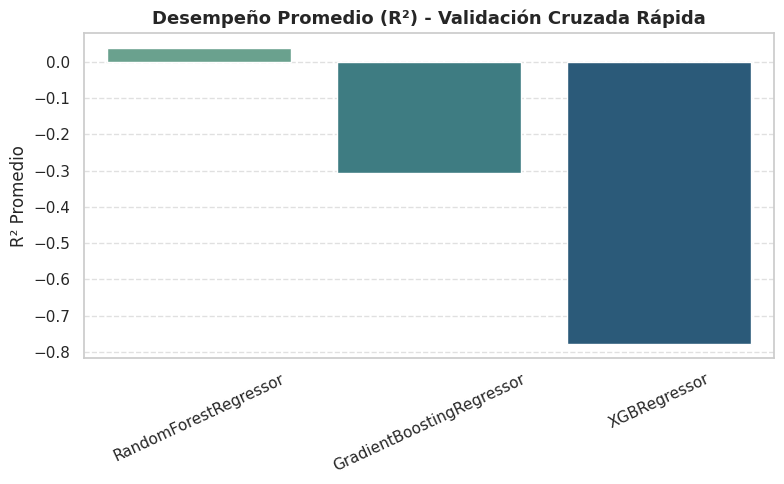

Mejores modelos (R² más alto):

,Modelo,R2 Promedio,R2 Desviación,MAE Promedio,RMSE Promedio
0,RandomForestRegressor,0.039488,0.068455,3783.120061,26231.566475
1,GradientBoostingRegressor,-0.307687,0.447454,3208.691110,29383.355893
2,XGBRegressor,-0.777050,0.609657,3232.564999,34019.426699


In [ ]:
# =========================================================
#  VALIDACIÓN CRUZADA INICIAL
# =========================================================

from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1MODELOS BASE
modelos_base_opt = {

    'RandomForestRegressor': RandomForestRegressor(
        n_estimators=80,      # menos árboles (default=100)
        max_depth=10,         # limita la profundidad
        random_state=42,
        n_jobs=-1
    ),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),

     'XGBRegressor': XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        n_jobs=-1,
         random_state=42
     )
}

print(" Modelos base optimizados definidos:\n")
for nombre in modelos_base_opt.keys():
    print(f" - {nombre}")

# SELECCIÓN Y FILTRADO DE VARIABLES
categorical_cols = [
    col for col in X_train_final.select_dtypes(include=['object']).columns
    if X_train_final[col].nunique() < 20  # excluye variables con demasiadas categorías
]
numeric_cols = X_train_final.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n Variables numéricas: {len(numeric_cols)}")
print(f" Variables categóricas (filtradas): {len(categorical_cols)}")


# PIPELINE DE PREPROCESAMIENTO
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)


# FUNCIÓN DE VALIDACIÓN CRUZADA (cv=3)
def validacion_cruzada_rapida(modelos, X, y, preprocessor, cv=3, frac=0.8):
    """
    Evalúa modelos de regresión de manera más rápida (muestra parcial + cv reducido)
    """
    resultados = []
    # Usar una muestra del dataset para acelerar (ej. 50%)
    X_muestra = X.sample(frac=frac, random_state=42)
    y_muestra = y.loc[X_muestra.index]

    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    print(f"\n Validación cruzada rápida: {cv}-fold con {len(X_muestra)} muestras ({int(frac*100)}% del dataset)\n")

    for nombre, modelo in modelos.items():
        print(f"Entrenando modelo: {nombre} ...")
        try:
            pipe = Pipeline([
                ('preproc', preprocessor),
                ('model', modelo)
            ])

            scores = cross_validate(
                pipe, X_muestra, y_muestra, cv=kf,
                scoring={
                    'r2': 'r2',
                    'mae': 'neg_mean_absolute_error',
                    'rmse': 'neg_root_mean_squared_error'
                },
                return_train_score=False,
                n_jobs=-1
            )

            resultados.append({
                'Modelo': nombre,
                'R2 Promedio': np.mean(scores['test_r2']),
                'R2 Desviación': np.std(scores['test_r2']),
                'MAE Promedio': -np.mean(scores['test_mae']),
                'RMSE Promedio': -np.mean(scores['test_rmse'])
            })
        except Exception as e:
            print(f" Error en {nombre}: {e}")

    resultados_df = pd.DataFrame(resultados).sort_values(by='R2 Promedio', ascending=False)
    print("\n Resultados de Validación Cruzada Rápida:\n")
    display(resultados_df)

    # Visualización comparativa
    plt.figure(figsize=(8,5))
    sns.barplot(data=resultados_df, x='Modelo', y='R2 Promedio', palette='crest')
    plt.title('Desempeño Promedio (R²) - Validación Cruzada Rápida', fontsize=13, fontweight='bold')
    plt.ylabel('R² Promedio')
    plt.xlabel('')
    plt.xticks(rotation=25)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return resultados_df



# EJECUCIÓN DE LA VALIDACIÓN CRUZADA
resultados_rapidos = validacion_cruzada_rapida(
    modelos=modelos_base_opt,
    X=X_train_final,
    y=y_train_final,
    preprocessor=preprocessor,
    cv=3,     # menos folds
    frac=0.5  # usa el 50% de los datos para acelerar
)

print("\n Mejores modelos (R² más alto):")
display(resultados_rapidos.head(3))


### **8.2.3. Validación Cruzada Incial con CV=5**

Validación cruzada completa: 5-fold con 5145 muestras

Entrenando modelo completo: RandomForestRegressor ...

Entrenando modelo completo: GradientBoostingRegressor ...

Entrenando modelo completo: XGBRegressor ...

Resultados de Validación Cruzada Completa:

,Modelo,R2 Promedio,R2 Desviación,MAE Promedio,RMSE Promedio
1,GradientBoostingRegressor,0.505008,0.150519,2698.128039,18156.178318
0,RandomForestRegressor,0.295955,0.163321,3231.675472,22003.589574
2,XGBRegressor,0.267419,0.299293,2548.664531,20549.891297


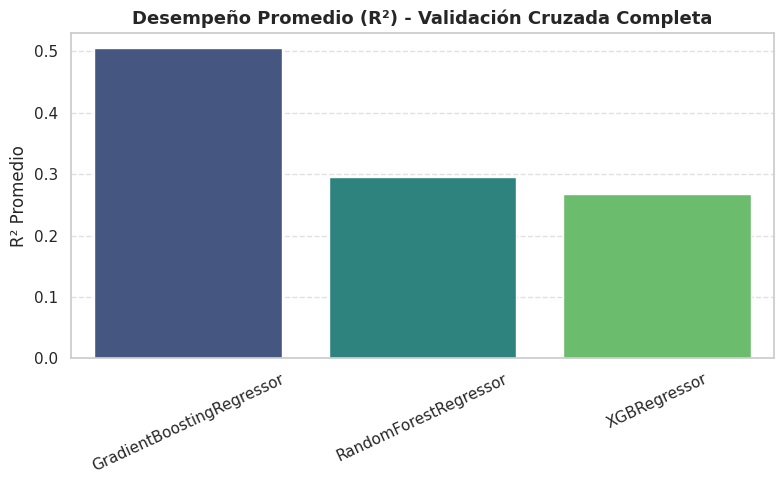

Mejores modelos (R² más alto)

,Modelo,R2 Promedio,R2 Desviación,MAE Promedio,RMSE Promedio
1,GradientBoostingRegressor,0.505008,0.150519,2698.128039,18156.178318
0,RandomForestRegressor,0.295955,0.163321,3231.675472,22003.589574
2,XGBRegressor,0.267419,0.299293,2548.664531,20549.891297


In [ ]:
# =========================================================
#  VALIDACIÓN CRUZADA INICIAL - VERSIÓN COMPLETA (CV=5)
# =========================================================

def validacion_cruzada_completa(modelos, X, y, preprocessor, cv=5):
    """
    Versión extendida: usa todo el dataset y 5-fold CV para resultados finales.
    """
    resultados = []
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    print(f"\n Validación cruzada completa: {cv}-fold con {len(X)} muestras\n")

    for nombre, modelo in modelos.items():
        print(f"Entrenando modelo completo: {nombre} ...")
        try:
            pipe = Pipeline([
                ('preproc', preprocessor),
                ('model', modelo)
            ])

            scores = cross_validate(
                pipe, X, y, cv=kf,
                scoring={
                    'r2': 'r2',
                    'mae': 'neg_mean_absolute_error',
                    'rmse': 'neg_root_mean_squared_error'
                },
                return_train_score=False,
                n_jobs=-1
            )

            resultados.append({
                'Modelo': nombre,
                'R2 Promedio': np.mean(scores['test_r2']),
                'R2 Desviación': np.std(scores['test_r2']),
                'MAE Promedio': -np.mean(scores['test_mae']),
                'RMSE Promedio': -np.mean(scores['test_rmse'])
            })
        except Exception as e:
            print(f" Error en {nombre}: {e}")

    resultados_df = pd.DataFrame(resultados).sort_values(by='R2 Promedio', ascending=False)
    print("\n Resultados de Validación Cruzada Completa:\n")
    display(resultados_df)

    # Visualización comparativa
    plt.figure(figsize=(8,5))
    sns.barplot(data=resultados_df, x='Modelo', y='R2 Promedio', palette='viridis')
    plt.title('Desempeño Promedio (R²) - Validación Cruzada Completa', fontsize=13, fontweight='bold')
    plt.ylabel('R² Promedio')
    plt.xlabel('')
    plt.xticks(rotation=25)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return resultados_df


# =========================================================
#  EJECUCIÓN DE LA VALIDACIÓN CRUZADA COMPLETA
# =========================================================
resultados_completos = validacion_cruzada_completa(
    modelos=modelos_base_opt,
    X=X_train_final,
    y=y_train_final,
    preprocessor=preprocessor,
    cv=5
)

print("\nMejores modelos (R² más alto)")
display(resultados_completos.head(3))


## **8.3. Definición Diccionario de Modelos**


Crear un diccionario centralizado con los modelos de regresión que serán evaluados con pipelines completos.

Preprocesamiento (ColumnTransformer)

StandardScaler para columnas numéricas

OneHotEncoder para columnas categóricas

In [ ]:
# -----------------------------
#  Importación de librerías
# -----------------------------
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd # Ensure pandas is imported
import numpy as np # Ensure numpy is imported
from sklearn.base import BaseEstimator, TransformerMixin # Import necessary classes

# -----------------------------
#  Transformar columnas
# -----------------------------
class ColumnTypeConverter(BaseEstimator, TransformerMixin):
    def __init__(self, columns, dtype=str):
        self.columns = columns
        self.dtype = dtype

    def fit(self, X, y=None):
        return self # Nothing to fit

    def transform(self, X):
        X_transformed = X.copy()
        for col in self.columns:
            if col in X_transformed.columns:
                # Use .astype(str) which handles potential mixed types better for OHE
                X_transformed[col] = X_transformed[col].astype(self.dtype)
            else:
                print(f" La columna '{col}' no se encontro para ser convertida.")
        return X_transformed



#  Definición de columnas
if 'X_train_final' not in locals() and 'X_train_final' not in globals():
    raise ValueError(" X_train_final is not defined. Please run the data splitting cells first.")

datetime_cols_to_drop_final = X_train_final.select_dtypes(include=['datetime64[ns]']).columns.tolist()
if datetime_cols_to_drop_final:
    print(f" Explicitly dropping datetime columns before defining features: {datetime_cols_to_drop_final}")
    X_train_final = X_train_final.drop(columns=datetime_cols_to_drop_final)
    X_valid = X_valid.drop(columns=datetime_cols_to_drop_final, errors='ignore')
    X_test = X_test.drop(columns=datetime_cols_to_drop_final, errors='ignore')


numerical_features = X_train_final.select_dtypes(include=[np.number]).columns.tolist()
all_other_features = X_train_final.columns.difference(numerical_features).tolist()
categorical_features = all_other_features # Assume all non-numerical features are categorical

print(" Columnas numéricas finales:", numerical_features)
print(" Columnas categóricas finales:", categorical_features)

# Preprocesamiento
# Paso 1: Convertir las columnas categoricas
type_converter = ('type_convert', ColumnTypeConverter(columns=categorical_features, dtype=str))

# Paso 2: Apicar StandardScaler a las cateristicas numericas
feature_transformer = ('features', ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
))


# -----------------------------
#  Definición de modelos (using Pipelines with preprocessor steps)
# -----------------------------
models = {

    'RandomForestRegressor': Pipeline([
        type_converter,
        feature_transformer,
        ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
    ]),

    'GradientBoostingRegressor': Pipeline([
        type_converter,
        feature_transformer,
        ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ]),

    'XGBRegressor': Pipeline([
        type_converter,
        feature_transformer,
        ('model', XGBRegressor(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=6,
            random_state=42,
            n_jobs=-1,
            objective='reg:squarederror'
        ))
    ]),

}

# -----------------------------
#  Confirmación
# -----------------------------
print(" Diccionario de modelos definido correctamente. Modelos disponibles:")
for nombre in models.keys():
    print(f" - {nombre}")

Explicitly dropping datetime columns before defining features: ['fecha', 'fechallegada', 'horaregistro', 
'Horaantencion', 'HoraPicoTarde', 'HoraPicoManana']

Columnas numéricas finales:
[
    'idproceso',
    'annoregistro',
    'mesregistro',
    'diaregistro',
    'annoatencion',
    'mesatencion',
    'diaatencion',
    'distancia'
]

Columnas categóricas finales:
[
    'Abogadounico',
    'Acuerdo',
    'Amanecer',
    'Aseguradora',
    'Decripcion',
    'InicioNoche',
    'Instancia',
    'Lluvia',
    'Municipio',
    'RandomAbogado',
    'UsuarioRegistra',
    'diasemana',
    'placa'
]

Diccionario de modelos definido correctamente. Modelos disponibles:

- RandomForestRegressor

- GradientBoostingRegressor

- XGBRegressor

## **8.4. Ajuste de hiperparámetros (RandomizedSearchCV / GridSearchCV)**

Vamos a realizar el ajuste de Hiperparámetros a estos tres modelos que dieron mejor resultado en relación al R2. Vamos a utilizar GridSearch y RnadomizedSearch


### **8.4.1.1. Ajuste de Hiperpárametros - RANDOMIZED SEARCH**

Tamaño de la muestra: (4116, 21)

Columnas numéricas: 8 | categóricas: 10

Optimizando hiperparámetros para: RandomForestRegressor ...

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Mejor R² CV: 0.2342

R² Entrenamiento: 0.5761 | RMSE: 15590.4555 | MSE: 243062303.3075

Parámetros: {'model__max_depth': 11, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6, 
'model__n_estimators': 150}

Optimizando hiperparámetros para: GradientBoostingRegressor ...

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Mejor R² CV: -0.0868

R² Entrenamiento: 0.9867 | RMSE: 2759.7092 | MSE: 7615994.9853

Parámetros: {'model__learning_rate': np.float64(0.13349630192554332), 'model__max_depth': 4, 
'model__n_estimators': 121, 'model__subsample': np.float64(0.7021198915659151)}

Optimizando hiperparámetros para: XGBRegressor ...

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Mejor R² CV: -0.0413

R² Entrenamiento: 0.7209 | RMSE: 12649.0398 | MSE: 159998208.6998

Parámetros: {'model__colsample_bytree': np.float64(0.7599443886861021), 'model__learning_rate': 
np.float64(0.019333132642723086), 'model__max_depth': 6, 'model__n_estimators': 114, 'model__subsample': 
np.float64(0.8368209952651107)}

Tiempo total: 3.69 minutos

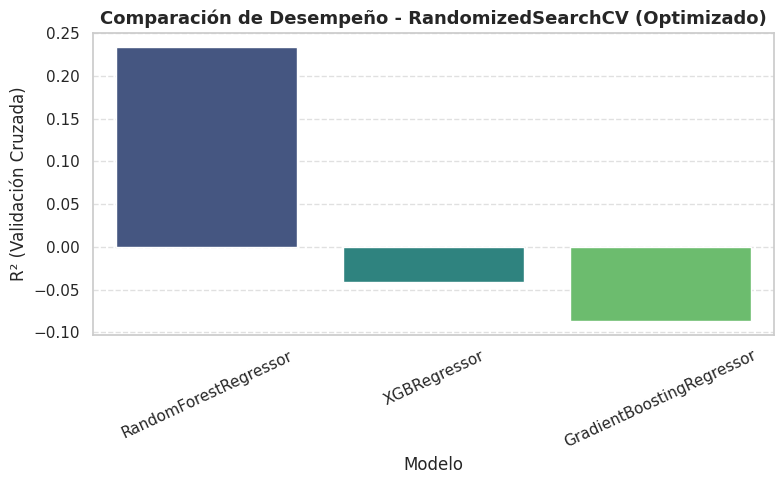

Resultados guardados en: resultados_randomsearch_opt_20251125_2239.xlsx

,Modelo,R² (CV),R² (Entrenamiento),MSE,RMSE,Mejores Parámetros
0,RandomForestRegressor,0.234185,0.576057,2.430623e+08,15590.455520,"{'model__max_depth': 11, 'model__min_samples_l..."
1,XGBRegressor,-0.041270,0.720936,1.599982e+08,12649.039833,{'model__colsample_bytree': 0.7599443886861021...
2,GradientBoostingRegressor,-0.086769,0.986716,7.615995e+06,2759.709221,"{'model__learning_rate': 0.13349630192554332, ..."


In [ ]:
# =========================================================
# AJUSTE DE HIPERPARÁMETROS - RANDOMIZED SEARCH (OPTIMIZADO)
# =========================================================

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import randint, uniform
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# =========================================================
# 1️ Muestra del dataset para acelerar la búsqueda
# =========================================================
X_sample = X_train_final.sample(frac=0.8, random_state=42)  # Usa solo el 80% del dataset
y_sample = y_train_final.loc[X_sample.index]

print(f" Tamaño de la muestra: {X_sample.shape}")

# =========================================================
# 2️ Identificar variables predictoras
# =========================================================
categorical_cols = [
    col for col in X_sample.select_dtypes(include=['object']).columns
    if X_sample[col].nunique() < 30  # excluye columnas con muchas categorías
]
numeric_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Columnas numéricas: {len(numeric_cols)} | categóricas: {len(categorical_cols)}")

# =========================================================
# 3️ Preprocesamiento
# =========================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)

# =========================================================
# 4️ Modelos y distribuciones de hiperparámetros
# =========================================================
modelos_random = {
    'RandomForestRegressor': {
        'modelo': RandomForestRegressor(random_state=42),
        'param_distrib': {
            'model__n_estimators': randint(100, 300),
            'model__max_depth': randint(3, 12),
            'model__min_samples_split': randint(2, 10),
            'model__min_samples_leaf': randint(1, 4)
        }
    },
    'GradientBoostingRegressor': {
        'modelo': GradientBoostingRegressor(random_state=42),
        'param_distrib': {
            'model__n_estimators': randint(100, 300),
            'model__max_depth': randint(3, 8),
            'model__learning_rate': uniform(0.01, 0.2),
            'model__subsample': uniform(0.7, 0.3)
        }
    },
    'XGBRegressor': {
        'modelo': XGBRegressor(objective='reg:squarederror', n_jobs=2, random_state=42),
        'param_distrib': {
            'model__n_estimators': randint(100, 300),
            'model__max_depth': randint(3, 8),
            'model__learning_rate': uniform(0.01, 0.2),
            'model__subsample': uniform(0.7, 0.3),
            'model__colsample_bytree': uniform(0.6, 0.4)
        }
    }
}

# =========================================================
# 5️ Función para ajuste con métricas
# =========================================================
def ajuste_random_search(modelos, X, y, preprocessor, n_iter=10, cv=3):
    resultados = []
    inicio_total = time.time()
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    for nombre, conf in modelos.items():
        print(f"\n Optimizando hiperparámetros para: {nombre} ...")

        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('model', conf['modelo'])
        ])

        random_search = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=conf['param_distrib'],
            n_iter=n_iter,
            scoring='r2',
            cv=kf,
            n_jobs=2,  # limita núcleos
            random_state=42,
            verbose=1
        )

        random_search.fit(X, y)

        best_model = random_search.best_estimator_
        y_pred = best_model.predict(X)

        # Métricas
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)

        resultados.append({
            'Modelo': nombre,
            'R² (CV)': random_search.best_score_,
            'R² (Entrenamiento)': r2,
            'MSE': mse,
            'RMSE': rmse,
            'Mejores Parámetros': random_search.best_params_
        })

        print(f" Mejor R² CV: {random_search.best_score_:.4f}")
        print(f" R² Entrenamiento: {r2:.4f} | RMSE: {rmse:.4f} | MSE: {mse:.4f}")
        print(f" Parámetros: {random_search.best_params_}")

    duracion_total = (time.time() - inicio_total) / 60
    print(f"\n Tiempo total: {duracion_total:.2f} minutos")

    resultados_df = pd.DataFrame(resultados).sort_values(by='R² (CV)', ascending=False).reset_index(drop=True)

    # =========================================================
    # 6️ Visualización y exportación
    # =========================================================
    plt.figure(figsize=(8,5))
    sns.barplot(data=resultados_df, x='Modelo', y='R² (CV)', palette='viridis')
    plt.title('Comparación de Desempeño - RandomizedSearchCV (Optimizado)', fontsize=13, fontweight='bold')
    plt.ylabel('R² (Validación Cruzada)')
    plt.xticks(rotation=25)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Exportar resultados
    fecha_actual = pd.Timestamp.now().strftime("%Y%m%d_%H%M")
    ruta_salida = f"resultados_randomsearch_opt_{fecha_actual}.xlsx"
    resultados_df.to_excel(ruta_salida, index=False)
    print(f"\n Resultados guardados en: {ruta_salida}")

    display(resultados_df)
    return resultados_df


# =========================================================
# 7️ Ejecutar el proceso optimizado
# =========================================================
resultados_random_opt = ajuste_random_search(
    modelos=modelos_random,
    X=X_sample,
    y=y_sample,
    preprocessor=preprocessor,
    n_iter=10,   # solo 10 combinaciones por modelo
    cv=5         # 3 particiones de validación
)


### **8.4.1.2. Ajuste de Hiperpárametros - GRID SEARCH**

Tamaño de la muestra: (3601, 21)

Columnas numéricas: 8 | categóricas: 10

Optimizando hiperparámetros para: RandomForestRegressor ...

Fitting 3 folds for each of 16 candidates, totalling 48 fits


Mejor R² CV: 0.1666

R² Train: 0.6690 | RMSE: 14015.2974 | MSE: 196428560.2505 | MAE: 1778.0351

Parámetros óptimos: {'model__max_depth': 20, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 
'model__n_estimators': 200}

Tiempo de búsqueda: 3.27 min

Optimizando hiperparámetros para: GradientBoostingRegressor ...

Fitting 3 folds for each of 16 candidates, totalling 48 fits


Mejor R² CV: 0.2319

R² Train: 0.9819 | RMSE: 3273.0534 | MSE: 10712878.6364 | MAE: 1053.1286

Parámetros óptimos: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200, 
'model__subsample': 0.8}

Tiempo de búsqueda: 1.62 min

Optimizando hiperparámetros para: XGBRegressor ...

Fitting 3 folds for each of 32 candidates, totalling 96 fits


Mejor R² CV: 0.3150

R² Train: 0.9938 | RMSE: 1915.1158 | MSE: 3667668.3418 | MAE: 813.1867

Parámetros óptimos: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 4, 
'model__n_estimators': 300, 'model__subsample': 0.8}

Tiempo de búsqueda: 0.42 min

RESULTADOS FINALES - GRID SEARCH OPTIMIZADO

,Modelo,R2 (CV),R2 (Entrenamiento),MSE,RMSE,MAE,Mejores Parámetros,Tiempo (min)
0,XGBRegressor,0.315022,0.993819,3.667668e+06,1915.115752,813.186663,"{'model__colsample_bytree': 0.8, 'model__learn...",0.42
1,GradientBoostingRegressor,0.231876,0.981946,1.071288e+07,3273.053412,1053.128562,"{'model__learning_rate': 0.1, 'model__max_dept...",1.62
2,RandomForestRegressor,0.166621,0.668960,1.964286e+08,14015.297366,1778.035137,"{'model__max_depth': 20, 'model__min_samples_l...",3.27


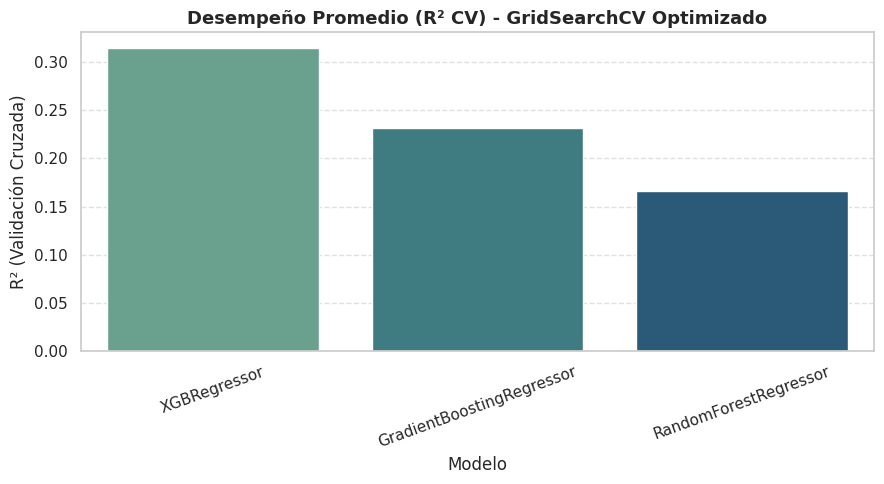

Resultados guardados en: resultados_gridsearch_opt_20251125_2248.xlsx

Tiempo total de ejecución: 5.32 minutos

In [ ]:
# =========================================================
# AJUSTE DE HIPERPARÁMETROS - GRID SEARCH (OPTIMIZADO)
# =========================================================
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

# =========================================================
# Verificación de variables base
# =========================================================
if 'X_train_final' not in locals() or 'y_train_final' not in locals():
    raise ValueError("Las variables 'X_train_final' y 'y_train_final' no están definidas.")

# =========================================================
# 1️ Muestra del dataset para acelerar el entrenamiento
# =========================================================
X_sample = X_train_final.sample(frac=.70, random_state=42)
y_sample = y_train_final.loc[X_sample.index]
print(f" Tamaño de la muestra: {X_sample.shape}")

# =========================================================
# 2️ Identificar variables predictoras
# =========================================================
categorical_cols = [
    col for col in X_sample.select_dtypes(include=['object']).columns
    if X_sample[col].nunique() < 30  # excluye columnas con muchas categorías
]
numeric_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Columnas numéricas: {len(numeric_cols)} | categóricas: {len(categorical_cols)}")

# =========================================================
# 3️ Preprocesamiento
# =========================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)

# =========================================================
# 4 Definición de grillas simplificadas de hiperparámetros
# =========================================================
param_grids = {
   #'LinearRegression': {
        #'model__fit_intercept': [True, False],
        #'model__positive': [False, True]
  #  },
    'RandomForestRegressor': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },
    'GradientBoostingRegressor': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5],
        'model__subsample': [0.8, 1.0]
    },
    'XGBRegressor': {
        'model__n_estimators': [200, 300],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [4, 6],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0]
    }
}

# =========================================================
# 5 Modelos base
# =========================================================
modelos_grid = {
    #'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=2)
}

# =========================================================
# 6 Ejecución del Grid Search para cada modelo
# =========================================================
resultados_grid = []
inicio_total = time.time()

for nombre, modelo in modelos_grid.items():
    print(f"\n Optimizando hiperparámetros para: {nombre} ...")
    inicio = time.time()

    try:
        # Pipeline con preprocesamiento
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('model', modelo)
        ])

        grid = GridSearchCV(
            estimator=pipe,
            param_grid=param_grids[nombre],
            cv=3,  # Reducido a 3 folds
            scoring='r2',
            n_jobs=2,
            verbose=1
        )

        grid.fit(X_sample, y_sample)

        # Predicción con el mejor modelo
        y_pred = grid.best_estimator_.predict(X_sample)

        # Métricas
        r2 = r2_score(y_sample, y_pred)
        mse = mean_squared_error(y_sample, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_sample, y_pred)
        duracion = round((time.time() - inicio) / 60, 2)

        resultados_grid.append({
            'Modelo': nombre,
            'R2 (CV)': grid.best_score_,
            'R2 (Entrenamiento)': r2,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'Mejores Parámetros': grid.best_params_,
            'Tiempo (min)': duracion
        })

        print(f" Mejor R² CV: {grid.best_score_:.4f}")
        print(f" R² Train: {r2:.4f} | RMSE: {rmse:.4f} | MSE: {mse:.4f} | MAE: {mae:.4f}")
        print(f" Parámetros óptimos: {grid.best_params_}")
        print(f" Tiempo de búsqueda: {duracion} min")

    except Exception as e:
        print(f" Error al optimizar {nombre}: {e}")

# =========================================================
# 7 Resultados finales y exportación
# =========================================================
resultados_grid_df = pd.DataFrame(resultados_grid).sort_values(by='R2 (CV)', ascending=False).reset_index(drop=True)
print("\n RESULTADOS FINALES - GRID SEARCH OPTIMIZADO")
display(resultados_grid_df)

# =========================================================
# 6️ Visualización comparativa
# =========================================================
plt.figure(figsize=(9,5))
sns.barplot(data=resultados_grid_df, x='Modelo', y='R2 (CV)', palette='crest')
plt.title('Desempeño Promedio (R² CV) - GridSearchCV Optimizado', fontsize=13, fontweight='bold')
plt.ylabel('R² (Validación Cruzada)')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ========================================================
# 8 Exportación a Excel
# =========================================================
fecha_actual = pd.Timestamp.now().strftime("%Y%m%d_%H%M")
ruta_excel = f"resultados_gridsearch_opt_{fecha_actual}.xlsx"
resultados_grid_df.to_excel(ruta_excel, index=False)
print(f" Resultados guardados en: {ruta_excel}")

print(f"\n Tiempo total de ejecución: {(time.time() - inicio_total)/60:.2f} minutos")


### **8.4.2.1. Ajuste de Hiperparámetros (GridSearchCV) Comparación TRAINT vs TEST**

Tamaño entrenamiento: (4116, 21)

Tamaño Pruebas: (1029, 21)

Tamaño de la muestra entrenamiento: (2881, 21)

Columnas numéricas: 8 | categóricas: 10

Optimizando hiperparámetros para: RandomForestRegressor

============================================================

Fitting 3 folds for each of 16 candidates, totalling 48 fits


Mejor R² CV: 0.2755

R² Train: 0.9022 | R² Test: 0.0895

Diferencia R²: 0.8126 (sobreajuste)

RMSE Train: 8036.4820 | RMSE Test: 33373.0595

⏱Tiempo de búsqueda: 1.65 min

Optimizando hiperparámetros para: GradientBoostingRegressor

============================================================

Fitting 3 folds for each of 16 candidates, totalling 48 fits


Mejor R² CV: 0.6110

R² Train: 0.9587 | R² Test: 0.1939

Diferencia R²: 0.7647 (sobreajuste)

RMSE Train: 5223.9643 | RMSE Test: 31401.4156

⏱Tiempo de búsqueda: 0.72 min

Optimizando hiperparámetros para: XGBRegressor

============================================================

Fitting 3 folds for each of 32 candidates, totalling 96 fits


Mejor R² CV: 0.5287

R² Train: 0.9983 | R² Test: 0.1928

Diferencia R²: 0.8055 (sobreajuste)

RMSE Train: 1074.2541 | RMSE Test: 31423.7199

⏱Tiempo de búsqueda: 0.42 min

================================================================================

RESULTADOS FINALES - COMPARATIVA TRAIN vs TEST

================================================================================

,Modelo,R2 (CV),R2 (Train),R2 (Test),Diferencia R2,RMSE (Train),RMSE (Test),Diferencia RMSE,MAE (Train),MAE (Test),Mejores Parámetros,Tiempo (min)
0,GradientBoostingRegressor,0.610953,0.958664,0.193946,0.764718,5223.964293,31401.415626,26177.451333,1406.899721,3215.878748,"{'model__learning_rate': 0.05, 'model__max_dep...",0.72
1,XGBRegressor,0.528738,0.998252,0.192801,0.805451,1074.254106,31423.719923,30349.465817,553.871071,3127.860364,"{'model__colsample_bytree': 1.0, 'model__learn...",0.42
2,RandomForestRegressor,0.275475,0.902173,0.089547,0.812626,8036.482006,33373.059490,25336.577484,1556.658623,3655.705655,"{'model__max_depth': 10, 'model__min_samples_l...",1.65


ANÁLISIS DE SOBREAJUSTE

==================================================

,Modelo,R2 (Train),R2 (Test),Diferencia R2,Nivel_Sobreajuste
0,GradientBoostingRegressor,0.958664,0.193946,0.764718,ALTO
1,XGBRegressor,0.998252,0.192801,0.805451,ALTO
2,RandomForestRegressor,0.902173,0.089547,0.812626,ALTO


MEJOR MODELO POR CRITERIO

==================================================

,Criterio,Modelo,R² Test,R² Train,Diferencia R²
0,Mejor Generalización (Test),GradientBoostingRegressor,0.193946,0.958664,0.764718
1,Mejor Ajuste (Train),XGBRegressor,0.192801,0.998252,0.805451
2,Mejor Balance,GradientBoostingRegressor,0.193946,0.958664,0.764718


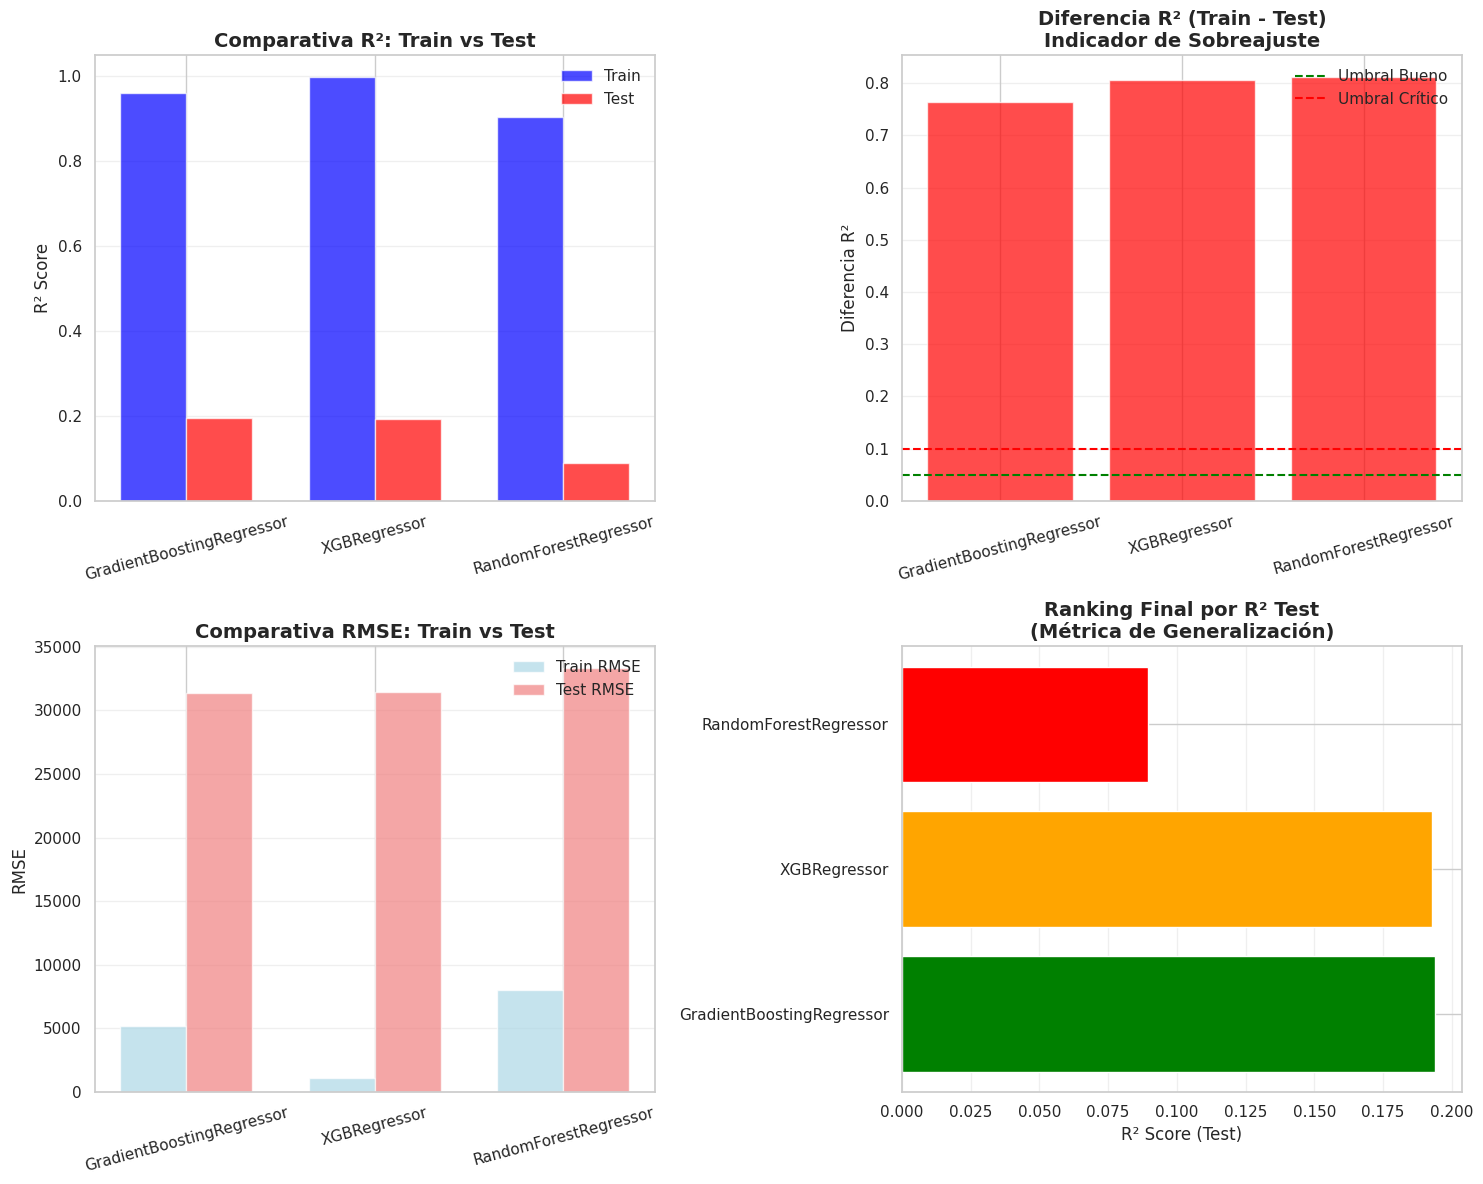

================================================================================

RECOMENDACIÓN FINAL BASADA EN COMPARACIÓN TRAIN vs TEST

================================================================================

MEJOR MODELO PARA PRODUCCIÓN: GradientBoostingRegressor

R² en Test (Generalización): 0.1939

Diferencia R²: 0.7647

ALERTA: ALTO SOBREAJUSTE - Revisar parámetros o features

COMPARATIVA CON OTRAS OPCIONES:

Mejor en Train: XGBRegressor (R² Test: 0.1928)

Mejor balance: GradientBoostingRegressor (Diff R²: 0.7647)

Resultados guardados en: resultados_gridsearch_train_test_20251125_2251.xlsx

Tiempo total de ejecución: 2.81 minutos

In [ ]:
# =========================================================
# AJUSTE DE HIPERPARÁMETROS - GRID SEARCH (OPTIMIZADO) CON COMPARACIÓN TRAIN vs TEST
# =========================================================
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

# =========================================================
# Verificación de variables base
# =========================================================
if 'X_train_final' not in locals() or 'y_train_final' not in locals():
    raise ValueError("Las variables 'X_train_final' y 'y_train_final' no están definidas.")

# =========================================================
# 1️ DIVISIÓN EN TRAIN Y TEST PARA COMPARACIÓN
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_train_final, y_train_final,
    test_size=0.2,
    random_state=42
)

print(f"Tamaño entrenamiento: {X_train.shape}")
print(f"Tamaño Pruebas: {X_test.shape}")

# =========================================================
# 2️ Muestra del dataset para acelerar el entrenamiento
# =========================================================
X_sample = X_train.sample(frac=.70, random_state=42)
y_sample = y_train.loc[X_sample.index]
print(f"Tamaño de la muestra entrenamiento: {X_sample.shape}")

# =========================================================
# 3️ Identificar variables predictoras
# =========================================================
categorical_cols = [
    col for col in X_sample.select_dtypes(include=['object']).columns
    if X_sample[col].nunique() < 30  # excluye columnas con muchas categorías
]
numeric_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Columnas numéricas: {len(numeric_cols)} | categóricas: {len(categorical_cols)}")

# =========================================================
# 4️ Preprocesamiento
# =========================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)

# =========================================================
# 5️ Definición de grillas simplificadas de hiperparámetros
# =========================================================
param_grids = {
    'RandomForestRegressor': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },
    'GradientBoostingRegressor': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5],
        'model__subsample': [0.8, 1.0]
    },
    'XGBRegressor': {
        'model__n_estimators': [200, 300],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [4, 6],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0]
    }
}

# =========================================================
# 6️ Modelos base
# =========================================================
modelos_grid = {
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=2)
}

# =========================================================
# 7️ Ejecución del Grid Search con COMPARACIÓN TRAIN vs TEST
# =========================================================
resultados_grid = []
mejores_modelos = {}
inicio_total = time.time()

for nombre, modelo in modelos_grid.items():
    print(f"\nOptimizando hiperparámetros para: {nombre}")
    print("=" * 60)
    inicio = time.time()

    try:
        # Pipeline con preprocesamiento
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('model', modelo)
        ])

        grid = GridSearchCV(
            estimator=pipe,
            param_grid=param_grids[nombre],
            cv=3,
            scoring='r2',
            n_jobs=2,
            verbose=1
        )

        # Entrenar con la muestra de entrenamiento
        grid.fit(X_sample, y_sample)

        # PREDICCIONES EN TRAIN Y TEST
        y_pred_train = grid.best_estimator_.predict(X_sample)
        y_pred_test = grid.best_estimator_.predict(X_test)

        # MÉTRICAS EN TRAIN
        r2_train = r2_score(y_sample, y_pred_train)
        mse_train = mean_squared_error(y_sample, y_pred_train)
        rmse_train = np.sqrt(mse_train)
        mae_train = mean_absolute_error(y_sample, y_pred_train)

        # MÉTRICAS EN TEST
        r2_test = r2_score(y_test, y_pred_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        rmse_test = np.sqrt(mse_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)

        # DIFERENCIAS (SOBREAJUSTE)
        diff_r2 = r2_train - r2_test
        diff_rmse = rmse_test - rmse_train

        duracion = round((time.time() - inicio) / 60, 2)

        # Guardar resultados
        resultados_grid.append({
            'Modelo': nombre,
            'R2 (CV)': grid.best_score_,
            'R2 (Train)': r2_train,
            'R2 (Test)': r2_test,
            'Diferencia R2': diff_r2,
            'RMSE (Train)': rmse_train,
            'RMSE (Test)': rmse_test,
            'Diferencia RMSE': diff_rmse,
            'MAE (Train)': mae_train,
            'MAE (Test)': mae_test,
            'Mejores Parámetros': grid.best_params_,
            'Tiempo (min)': duracion
        })

        # Guardar el mejor modelo para análisis posterior
        mejores_modelos[nombre] = grid.best_estimator_

        print(f"Mejor R² CV: {grid.best_score_:.4f}")
        print(f"R² Train: {r2_train:.4f} | R² Test: {r2_test:.4f}")
        print(f"Diferencia R²: {diff_r2:.4f} (sobreajuste)")
        print(f"RMSE Train: {rmse_train:.4f} | RMSE Test: {rmse_test:.4f}")
        print(f"⏱Tiempo de búsqueda: {duracion} min")

    except Exception as e:
        print(f"Error al optimizar {nombre}: {e}")

# =========================================================
# 8️ RESULTADOS FINALES Y ANÁLISIS COMPARATIVO
# =========================================================
if resultados_grid:
    resultados_grid_df = pd.DataFrame(resultados_grid)

    # ORDENAR POR R² TEST (Métrica más importante)
    resultados_grid_df = resultados_grid_df.sort_values(by='R2 (Test)', ascending=False).reset_index(drop=True)

    print("\n" + "="*80)
    print("RESULTADOS FINALES - COMPARATIVA TRAIN vs TEST")
    print("="*80)
    display(resultados_grid_df)

    # =========================================================
    # 9️ ANÁLISIS DE SOBREAJUSTE
    # =========================================================
    print("\nANÁLISIS DE SOBREAJUSTE")
    print("="*50)

    # Clasificar nivel de sobreajuste
    resultados_grid_df['Nivel_Sobreajuste'] = resultados_grid_df['Diferencia R2'].apply(
        lambda x: 'BAJO' if x < 0.05 else 'MODERADO' if x < 0.1 else 'ALTO'
    )

    analisis_sobreajuste = resultados_grid_df[['Modelo', 'R2 (Train)', 'R2 (Test)', 'Diferencia R2', 'Nivel_Sobreajuste']]
    display(analisis_sobreajuste)

    # =========================================================
    # 10️ COMPARATIVA MEJOR MODELO POR CRITERIO
    # =========================================================
    print("\nMEJOR MODELO POR CRITERIO")
    print("="*50)

    mejor_por_test = resultados_grid_df.iloc[0]  # Ya ordenado por R² Test
    mejor_por_train = resultados_grid_df.loc[resultados_grid_df['R2 (Train)'].idxmax()]
    mejor_por_balance = resultados_grid_df.loc[resultados_grid_df['Diferencia R2'].idxmin()]

    comparativa_criterios = pd.DataFrame({
        'Criterio': ['Mejor Generalización (Test)', 'Mejor Ajuste (Train)', 'Mejor Balance'],
        'Modelo': [mejor_por_test['Modelo'], mejor_por_train['Modelo'], mejor_por_balance['Modelo']],
        'R² Test': [mejor_por_test['R2 (Test)'], mejor_por_train['R2 (Test)'], mejor_por_balance['R2 (Test)']],
        'R² Train': [mejor_por_test['R2 (Train)'], mejor_por_train['R2 (Train)'], mejor_por_balance['R2 (Train)']],
        'Diferencia R²': [mejor_por_test['Diferencia R2'], mejor_por_train['Diferencia R2'], mejor_por_balance['Diferencia R2']]
    })

    display(comparativa_criterios)

    # =========================================================
    # 11️ VISUALIZACIÓN COMPARATIVA MEJORADA
    # =========================================================
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Gráfico 1: Comparativa R² Train vs Test
    modelos = resultados_grid_df['Modelo']
    x_pos = np.arange(len(modelos))
    width = 0.35

    axes[0,0].bar(x_pos - width/2, resultados_grid_df['R2 (Train)'], width,
                 label='Train', alpha=0.7, color='blue')
    axes[0,0].bar(x_pos + width/2, resultados_grid_df['R2 (Test)'], width,
                 label='Test', alpha=0.7, color='red')
    axes[0,0].set_title('Comparativa R²: Train vs Test', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('R² Score')
    axes[0,0].set_xticks(x_pos)
    axes[0,0].set_xticklabels(modelos, rotation=15)
    axes[0,0].legend()
    axes[0,0].grid(axis='y', alpha=0.3)

    # Gráfico 2: Diferencia R² (Sobreajuste)
    colors = ['green' if x < 0.05 else 'orange' if x < 0.1 else 'red'
             for x in resultados_grid_df['Diferencia R2']]
    axes[0,1].bar(modelos, resultados_grid_df['Diferencia R2'], color=colors, alpha=0.7)
    axes[0,1].axhline(y=0.05, color='green', linestyle='--', label='Umbral Bueno')
    axes[0,1].axhline(y=0.1, color='red', linestyle='--', label='Umbral Crítico')
    axes[0,1].set_title('Diferencia R² (Train - Test)\nIndicador de Sobreajuste',
                       fontsize=14, fontweight='bold')
    axes[0,1].set_ylabel('Diferencia R²')
    axes[0,1].tick_params(axis='x', rotation=15)
    axes[0,1].legend()
    axes[0,1].grid(axis='y', alpha=0.3)

    # Gráfico 3: RMSE Comparativo
    axes[1,0].bar(x_pos - width/2, resultados_grid_df['RMSE (Train)'], width,
                 label='Train RMSE', alpha=0.7, color='lightblue')
    axes[1,0].bar(x_pos + width/2, resultados_grid_df['RMSE (Test)'], width,
                 label='Test RMSE', alpha=0.7, color='lightcoral')
    axes[1,0].set_title('Comparativa RMSE: Train vs Test', fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('RMSE')
    axes[1,0].set_xticks(x_pos)
    axes[1,0].set_xticklabels(modelos, rotation=15)
    axes[1,0].legend()
    axes[1,0].grid(axis='y', alpha=0.3)

    # Gráfico 4: Ranking por R² Test
    axes[1,1].barh(resultados_grid_df['Modelo'], resultados_grid_df['R2 (Test)'],
                  color=['green', 'orange', 'red'])
    axes[1,1].set_title('Ranking Final por R² Test\n(Métrica de Generalización)',
                       fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('R² Score (Test)')
    axes[1,1].grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # =========================================================
    # 12️ RECOMENDACIÓN FINAL
    # =========================================================
    print("\n" + "="*80)
    print("RECOMENDACIÓN FINAL BASADA EN COMPARACIÓN TRAIN vs TEST")
    print("="*80)

    print(f"MEJOR MODELO PARA PRODUCCIÓN: {mejor_por_test['Modelo']}")
    print(f"R² en Test (Generalización): {mejor_por_test['R2 (Test)']:.4f}")
    print(f"Diferencia R²: {mejor_por_test['Diferencia R2']:.4f}")

    # Evaluación del sobreajuste
    if mejor_por_test['Diferencia R2'] < 0.05:
        print("Excelente! BAJO sobreajuste - El modelo generaliza muy bien")
    elif mejor_por_test['Diferencia R2'] < 0.1:
        print("ATENCIÓN: SOBREAJUSTE MODERADO - Considerar regularización")
    else:
        print("ALERTA: ALTO SOBREAJUSTE - Revisar parámetros o features")

    print(f"\nCOMPARATIVA CON OTRAS OPCIONES:")
    print(f"Mejor en Train: {mejor_por_train['Modelo']} (R² Test: {mejor_por_train['R2 (Test)']:.4f})")
    print(f"Mejor balance: {mejor_por_balance['Modelo']} (Diff R²: {mejor_por_balance['Diferencia R2']:.4f})")

# =========================================================
# 13️ EXPORTACIÓN A EXCEL CON ANÁLISIS COMPLETO
# =========================================================
fecha_actual = pd.Timestamp.now().strftime("%Y%m%d_%H%M")
ruta_excel = f"resultados_gridsearch_train_test_{fecha_actual}.xlsx"

with pd.ExcelWriter(ruta_excel, engine='openpyxl') as writer:
    resultados_grid_df.to_excel(writer, sheet_name='Resultados_Completos', index=False)

    if 'analisis_sobreajuste' in locals():
        analisis_sobreajuste.to_excel(writer, sheet_name='Analisis_Sobreajuste', index=False)

    if 'comparativa_criterios' in locals():
        comparativa_criterios.to_excel(writer, sheet_name='Comparativa_Criterios', index=False)

    # Resumen ejecutivo
    resumen = pd.DataFrame({
        'Metrica': [
            'Mejor Modelo (Test)',
            'R² Test Mejor Modelo',
            'R² Train Mejor Modelo',
            'Diferencia R²',
            'Nivel Sobreajuste',
            'Tiempo Total (min)'
        ],
        'Valor': [
            mejor_por_test['Modelo'] if 'mejor_por_test' in locals() else 'N/A',
            f"{mejor_por_test['R2 (Test)']:.4f}" if 'mejor_por_test' in locals() else 'N/A',
            f"{mejor_por_test['R2 (Train)']:.4f}" if 'mejor_por_test' in locals() else 'N/A',
            f"{mejor_por_test['Diferencia R2']:.4f}" if 'mejor_por_test' in locals() else 'N/A',
            mejor_por_test['Nivel_Sobreajuste'] if 'mejor_por_test' in locals() else 'N/A',
            f"{(time.time() - inicio_total)/60:.2f}"
        ]
    })
    resumen.to_excel(writer, sheet_name='Resumen_Ejecutivo', index=False)

print(f"\nResultados guardados en: {ruta_excel}")
print(f"Tiempo total de ejecución: {(time.time() - inicio_total)/60:.2f} minutos")

### **8.4.2.2. Ajuste de Hiperparámetros control de SobraAjuste**

Tamaño entrenamiento: (3601, 21)

Tamaño prueba: (1544, 21)

Tamaño de la muestra entrenamiento: (2881, 21)

Columnas numéricas: 8 | categóricas: 10

🔧 OPTIMIZANDO CON CONTROL DE SOBREAJUSTE: RandomForestRegressor

======================================================================

Fitting 5 folds for each of 32 candidates, totalling 160 fits


Mejor R² CV Test: 0.3700

R² Train Final: 0.5015 | R² Test Final: 0.1140

Diferencia R²: 0.3875

Sobreajuste en CV: 0.1332

Mejora en sobreajuste: 0.3725 puntos

Tiempo: 1.05 min

🔧 OPTIMIZANDO CON CONTROL DE SOBREAJUSTE: GradientBoostingRegressor

======================================================================

Fitting 5 folds for each of 128 candidates, totalling 640 fits


Mejor R² CV Test: 0.2924

R² Train Final: 0.5434 | R² Test Final: 0.1435

Diferencia R²: 0.3998

Sobreajuste en CV: 0.0389

Mejora en sobreajuste: 0.3602 puntos

Tiempo: 1.18 min

🔧 OPTIMIZANDO CON CONTROL DE SOBREAJUSTE: XGBRegressor

======================================================================

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


Mejor R² CV Test: 0.4505

R² Train Final: 0.7832 | R² Test Final: 0.1725

Diferencia R²: 0.6107

Sobreajuste en CV: 0.3463

Mejora en sobreajuste: 0.1493 puntos

Tiempo: 1.88 min

==========================================================================================

RESULTADOS CON CONTROL DE SOBREAJUSTE

==========================================================================================

,Modelo,R2 (CV Train),R2 (CV Test),Sobreajuste CV,R2 (Train Final),R2 (Test Final),Diferencia R2,RMSE (Train),RMSE (Test),Mejores Parámetros,Tiempo (min),Score_Final
0,GradientBoostingRegressor,0.331303,0.292366,0.038937,0.543353,0.143539,0.399813,13392.529710,27085.088744,"{'model__learning_rate': 0.05, 'model__max_dep...",1.18,0.280534
1,RandomForestRegressor,0.503195,0.370042,0.133153,0.501501,0.114048,0.387453,13992.798880,27547.473457,"{'model__bootstrap': True, 'model__max_depth':...",1.05,0.263597
2,XGBRegressor,0.796739,0.450464,0.346276,0.783220,0.172523,0.610697,9227.445351,26622.851101,"{'model__colsample_bytree': 0.7, 'model__gamma...",1.88,0.237557


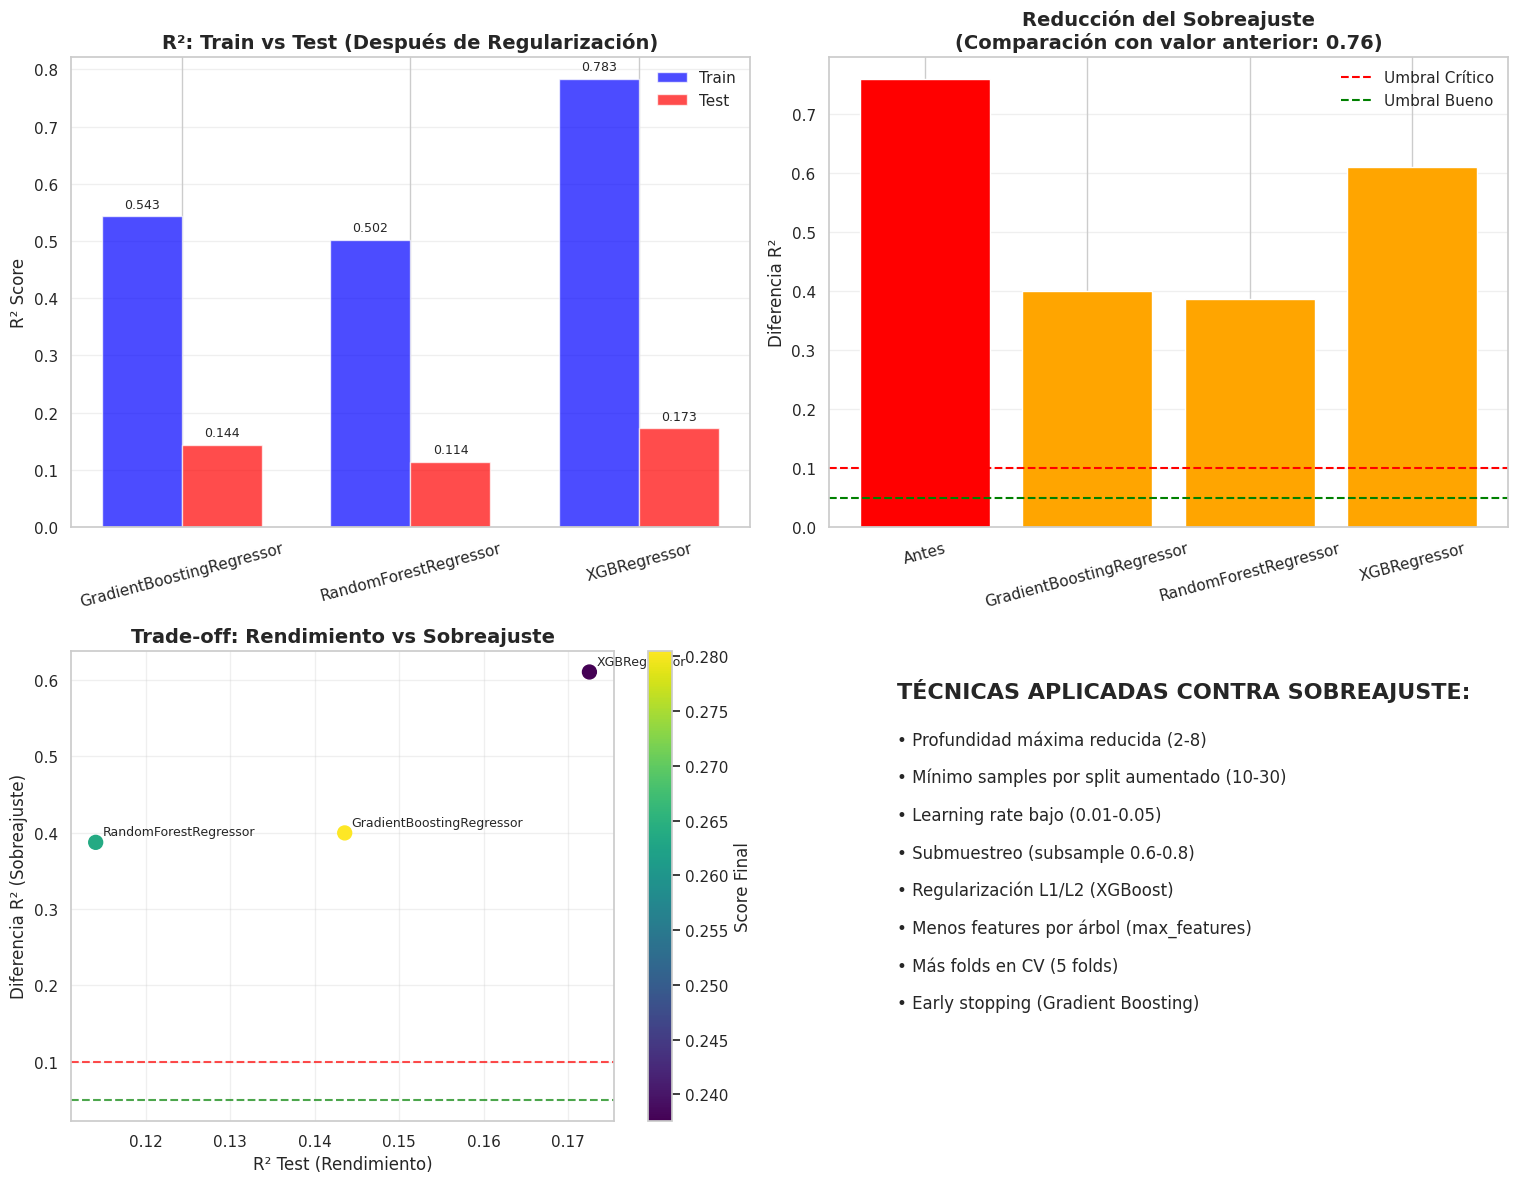

==========================================================================================

RECOMENDACIÓN FINAL - CONTROL DE SOBREAJUSTE

==========================================================================================

MEJOR MODELO: GradientBoostingRegressor

R² Test: 0.1435

Diferencia R²: 0.3998

REDUCCIÓN DE SOBREAJUSTE: 0.3602 puntos

PROBLEMÁTICO: Alto sobreajuste - Revisar features/parámetros

COMPARATIVA:

• Antes: Diferencia R² = 0.760 (SOBREAJUSTE EXTREMO)

• Después: Diferencia R² = 0.3998

Resultados guardados en: resultados_control_sobreajuste_20251125_2256.xlsx

⏱️ Tiempo total: 4.13 minutos

In [ ]:
# =========================================================
# AJUSTE DE HIPERPARÁMETROS - CONTROL DE SOBREAJUSTE
# =========================================================
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

# =========================================================
# Verificación de variables base
# =========================================================
if 'X_train_final' not in locals() or 'y_train_final' not in locals():
    raise ValueError("Las variables 'X_train_final' y 'y_train_final' no están definidas.")

# =========================================================
# 1️ DIVISIÓN EN TRAIN Y TEST
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_train_final, y_train_final,
    test_size=0.3,  #  Aumentado para mejor evaluación
    random_state=42
)

print(f"Tamaño entrenamiento: {X_train.shape}")
print(f"Tamaño prueba: {X_test.shape}")

# =========================================================
# 2️ Muestra del dataset
# =========================================================
X_sample = X_train.sample(frac=.80, random_state=42)  #  Más datos para entrenar
y_sample = y_train.loc[X_sample.index]
print(f"Tamaño de la muestra entrenamiento: {X_sample.shape}")

# =========================================================
# 3️ Identificar variables predictoras
# =========================================================
categorical_cols = [
    col for col in X_sample.select_dtypes(include=['object']).columns
    if X_sample[col].nunique() < 20  #  Más restrictivo
]
numeric_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Columnas numéricas: {len(numeric_cols)} | categóricas: {len(categorical_cols)}")

# =========================================================
# 4️ Preprocesamiento
# =========================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)

# =========================================================
# 5️ GRILLAS CON REGULARIZACIÓN PARA CONTROLAR SOBREAJUSTE
# =========================================================
param_grids_anti_overfit = {
    'RandomForestRegressor': {
        'model__n_estimators': [50, 100],  #  Menos árboles
        'model__max_depth': [5, 8],        #  Menos profundidad
        'model__min_samples_split': [10, 20],  #  Más restrictivo
        'model__min_samples_leaf': [4, 8],     #  Más restrictivo
        'model__max_features': [0.3, 0.5],     #  Menos features por árbol
        'model__bootstrap': [True]              #  Bootstrap para regularización
    },
    'GradientBoostingRegressor': {
        'model__n_estimators': [50, 100],      #  Menos árboles
        'model__learning_rate': [0.01, 0.05],  #  Learning rate más bajo
        'model__max_depth': [2, 3],            #  Menos profundidad
        'model__subsample': [0.6, 0.8],        #  Submuestreo
        'model__min_samples_split': [20, 30],  #  Más restrictivo
        'model__min_samples_leaf': [5, 10],    #  Más restrictivo
        'model__max_features': [0.5, 0.7]      #  Menos features
    },
    'XGBRegressor': {
        'model__n_estimators': [50, 100],      #  Menos árboles
        'model__learning_rate': [0.01, 0.05],  #  Learning rate más bajo
        'model__max_depth': [2, 3],            #  Menos profundidad
        'model__subsample': [0.6, 0.8],        #  Submuestreo
        'model__colsample_bytree': [0.5, 0.7], #  Menos columnas
        'model__reg_alpha': [0.1, 1.0],        #  Regularización L1
        'model__reg_lambda': [1.0, 2.0],       #  Regularización L2
        'model__gamma': [0.1, 0.5]             #  Regularización por split
    }
}

# =========================================================
# 6️ Modelos base CON REGULARIZACIÓN
# =========================================================
modelos_grid = {
    'RandomForestRegressor': RandomForestRegressor(
        random_state=42,
        n_jobs=-1,
        bootstrap=True  #  Activado para regularización
    ),
    'GradientBoostingRegressor': GradientBoostingRegressor(
        random_state=42,
        validation_fraction=0.1,  #  Validación interna
        n_iter_no_change=5        #  Early stopping
    ),
    'XGBRegressor': XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1,
        eval_metric='rmse'
    )
}

# =========================================================
# 7️ EJECUCIÓN CON EARLY STOPPING Y MÉTRICAS DETALLADAS
# =========================================================
resultados_grid = []
mejores_modelos = {}
inicio_total = time.time()

for nombre, modelo in modelos_grid.items():
    print(f"\n🔧 OPTIMIZANDO CON CONTROL DE SOBREAJUSTE: {nombre}")
    print("=" * 70)
    inicio = time.time()

    try:
        # Pipeline con preprocesamiento
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('model', modelo)
        ])

        # Grid Search con más validación
        grid = GridSearchCV(
            estimator=pipe,
            param_grid=param_grids_anti_overfit[nombre],
            cv=5,  #  Más folds para mejor evaluación
            scoring='r2',
            n_jobs=-1,
            verbose=1,
            return_train_score=True  #  Para analizar sobreajuste
        )

        # Entrenar
        grid.fit(X_sample, y_sample)

        #  ANÁLISIS DETALLADO DE SOBREAJUSTE EN CV
        resultados_cv = pd.DataFrame(grid.cv_results_)
        mejor_idx = grid.best_index_
        train_score_cv = resultados_cv.loc[mejor_idx, 'mean_train_score']
        test_score_cv = resultados_cv.loc[mejor_idx, 'mean_test_score']
        sobreajuste_cv = train_score_cv - test_score_cv

        # Predicciones
        y_pred_train = grid.best_estimator_.predict(X_sample)
        y_pred_test = grid.best_estimator_.predict(X_test)

        # Métricas
        r2_train = r2_score(y_sample, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        diff_r2 = r2_train - r2_test

        rmse_train = np.sqrt(mean_squared_error(y_sample, y_pred_train))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

        duracion = round((time.time() - inicio) / 60, 2)

        # Guardar resultados
        resultados_grid.append({
            'Modelo': nombre,
            'R2 (CV Train)': train_score_cv,
            'R2 (CV Test)': test_score_cv,
            'Sobreajuste CV': sobreajuste_cv,
            'R2 (Train Final)': r2_train,
            'R2 (Test Final)': r2_test,
            'Diferencia R2': diff_r2,
            'RMSE (Train)': rmse_train,
            'RMSE (Test)': rmse_test,
            'Mejores Parámetros': grid.best_params_,
            'Tiempo (min)': duracion
        })

        mejores_modelos[nombre] = grid.best_estimator_

        print(f"Mejor R² CV Test: {test_score_cv:.4f}")
        print(f"R² Train Final: {r2_train:.4f} | R² Test Final: {r2_test:.4f}")
        print(f"Diferencia R²: {diff_r2:.4f}")
        print(f"Sobreajuste en CV: {sobreajuste_cv:.4f}")
        print(f"Mejora en sobreajuste: {0.76 - diff_r2:.4f} puntos")  # Comparación con 0.76
        print(f"Tiempo: {duracion} min")

    except Exception as e:
        print(f"Error en {nombre}: {e}")

# =========================================================
# 8️ ANÁLISIS DE RESULTADOS MEJORADO
# =========================================================
if resultados_grid:
    resultados_df = pd.DataFrame(resultados_grid)

    # Ordenar por R² Test y bajo sobreajuste
    resultados_df['Score_Final'] = (
        resultados_df['R2 (Test Final)'] * 0.7 +
        (1 - resultados_df['Diferencia R2']) * 0.3  # Penalizar sobreajuste
    )
    resultados_df = resultados_df.sort_values('Score_Final', ascending=False).reset_index(drop=True)

    print("\n" + "="*90)
    print("RESULTADOS CON CONTROL DE SOBREAJUSTE")
    print("="*90)
    display(resultados_df)

    # =========================================================
    # 9️ VISUALIZACIÓN DEL AVANCE EN SOBREAJUSTE
    # =========================================================
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Gráfico 1: Comparativa R²
    modelos = resultados_df['Modelo']
    x_pos = np.arange(len(modelos))
    width = 0.35

    bars1 = axes[0,0].bar(x_pos - width/2, resultados_df['R2 (Train Final)'], width,
                         label='Train', alpha=0.7, color='blue')
    bars2 = axes[0,0].bar(x_pos + width/2, resultados_df['R2 (Test Final)'], width,
                         label='Test', alpha=0.7, color='red')
    axes[0,0].set_title('R²: Train vs Test (Después de Regularización)', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('R² Score')
    axes[0,0].set_xticks(x_pos)
    axes[0,0].set_xticklabels(modelos, rotation=15)
    axes[0,0].legend()
    axes[0,0].grid(axis='y', alpha=0.3)

    # Añadir valores en las barras
    for bar, valor in zip(bars1, resultados_df['R2 (Train Final)']):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                      f'{valor:.3f}', ha='center', va='bottom', fontsize=9)

    for bar, valor in zip(bars2, resultados_df['R2 (Test Final)']):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                      f'{valor:.3f}', ha='center', va='bottom', fontsize=9)

    # Gráfico 2: Evolución del sobreajuste
    diferencia_anterior = 0.76  # Tu valor original
    diferencias_actuales = resultados_df['Diferencia R2'].tolist()

    axes[0,1].bar(['Antes'] + modelos.tolist(),
                 [diferencia_anterior] + diferencias_actuales,
                 color=['red'] + ['green' if x < 0.2 else 'orange' for x in diferencias_actuales])
    axes[0,1].axhline(y=0.1, color='red', linestyle='--', label='Umbral Crítico')
    axes[0,1].axhline(y=0.05, color='green', linestyle='--', label='Umbral Bueno')
    axes[0,1].set_title('Reducción del Sobreajuste\n(Comparación con valor anterior: 0.76)',
                       fontsize=14, fontweight='bold')
    axes[0,1].set_ylabel('Diferencia R²')
    axes[0,1].tick_params(axis='x', rotation=15)
    axes[0,1].legend()
    axes[0,1].grid(axis='y', alpha=0.3)

    # Gráfico 3: Trade-off Rendimiento vs Sobreajuste
    scatter = axes[1,0].scatter(resultados_df['R2 (Test Final)'],
                               resultados_df['Diferencia R2'],
                               s=100, c=resultados_df['Score_Final'], cmap='viridis')
    for i, row in resultados_df.iterrows():
        axes[1,0].annotate(row['Modelo'], (row['R2 (Test Final)'], row['Diferencia R2']),
                          xytext=(5, 5), textcoords='offset points', fontsize=9)
    axes[1,0].axhline(y=0.1, color='red', linestyle='--', alpha=0.7)
    axes[1,0].axhline(y=0.05, color='green', linestyle='--', alpha=0.7)
    axes[1,0].set_xlabel('R² Test (Rendimiento)')
    axes[1,0].set_ylabel('Diferencia R² (Sobreajuste)')
    axes[1,0].set_title('Trade-off: Rendimiento vs Sobreajuste', fontsize=14, fontweight='bold')
    axes[1,0].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[1,0], label='Score Final')

    # Gráfico 4: Mejores parámetros para regularización
    param_importance = {
        'max_depth': ['Baja (2-5)', 'Media (6-10)', 'Alta (11+)'],
        'min_samples_split': ['Alta (>15)', 'Media (5-15)', 'Baja (<5)'],
        'subsample': ['Bajo (<0.7)', 'Medio (0.7-0.9)', 'Alto (>0.9)'],
        'regularization': ['Alta', 'Media', 'Baja']
    }

    axes[1,1].axis('off')
    axes[1,1].text(0.1, 0.9, 'TÉCNICAS APLICADAS CONTRA SOBREAJUSTE:',
                  fontsize=16, fontweight='bold', transform=axes[1,1].transAxes)
    tecnicas = [
        '• Profundidad máxima reducida (2-8)',
        '• Mínimo samples por split aumentado (10-30)',
        '• Learning rate bajo (0.01-0.05)',
        '• Submuestreo (subsample 0.6-0.8)',
        '• Regularización L1/L2 (XGBoost)',
        '• Menos features por árbol (max_features)',
        '• Más folds en CV (5 folds)',
        '• Early stopping (Gradient Boosting)'
    ]
    for i, tecnica in enumerate(tecnicas):
        axes[1,1].text(0.1, 0.8 - i*0.08, tecnica, fontsize=12,
                      transform=axes[1,1].transAxes)

    plt.tight_layout()
    plt.show()

    # =========================================================
    # 10️ RECOMENDACIÓN FINAL MEJORADA
    # =========================================================
    mejor_modelo = resultados_df.iloc[0]

    print("\n" + "="*90)
    print("RECOMENDACIÓN FINAL - CONTROL DE SOBREAJUSTE")
    print("="*90)

    print(f"MEJOR MODELO: {mejor_modelo['Modelo']}")
    print(f"R² Test: {mejor_modelo['R2 (Test Final)']:.4f}")
    print(f"Diferencia R²: {mejor_modelo['Diferencia R2']:.4f}")

    # Evaluación de mejora
    mejora_sobreajuste = 0.76 - mejor_modelo['Diferencia R2']
    print(f"REDUCCIÓN DE SOBREAJUSTE: {mejora_sobreajuste:.4f} puntos")

    if mejor_modelo['Diferencia R2'] < 0.05:
        print("EXCELENTE! Sobreajuste controlado - Modelo generaliza bien")
    elif mejor_modelo['Diferencia R2'] < 0.15:
        print("ACEPTABLE: Sobreajuste moderado - Buen balance")
    elif mejor_modelo['Diferencia R2'] < 0.3:
        print("MEJORABLE: Sobreajuste significativo - Considerar más regularización")
    else:
        print("PROBLEMÁTICO: Alto sobreajuste - Revisar features/parámetros")

    print(f"\nCOMPARATIVA:")
    print(f"   • Antes: Diferencia R² = 0.760 (SOBREAJUSTE EXTREMO)")
    print(f"   • Después: Diferencia R² = {mejor_modelo['Diferencia R2']:.4f}")

# =========================================================
# 11️ EXPORTACIÓN
# =========================================================
fecha_actual = pd.Timestamp.now().strftime("%Y%m%d_%H%M")
ruta_excel = f"resultados_control_sobreajuste_{fecha_actual}.xlsx"

if resultados_grid:
    pd.DataFrame(resultados_grid).to_excel(ruta_excel, index=False)
    print(f"\nResultados guardados en: {ruta_excel}")

print(f"Tiempo total: {(time.time() - inicio_total)/60:.2f} minutos")

### **8.4.2.3. Ajuste de Hiperparámetros (GridSearchCV) Control de sobreajuste extremo**

ANALIZANDO FEATURES PARA IDENTIFICAR PROBLEMAS:

Shape del dataset: (5145, 21)

Variable objetivo stats:

- Media: 2991.66

- Std: 27149.97

- Rango: [0.00, 855723.00]

Top 5 features más correlacionados:

annoatencion    0.036834
mesatencion     0.035288
diaregistro     0.019916
mesregistro     0.018448
idproceso       0.014360
dtype: float64

INICIANDO FASE 2 - CONTROL EXTREMO DE SOBREAJUSTE

======================================================================

🔧 EJECUTANDO ESTRATEGIA EXTREMA: RandomForestRegressor

--------------------------------------------------

Fitting 5 folds for each of 32 candidates, totalling 160 fits


R² Train: 0.1037 | R² Test: 0.0308

Diferencia R²: 0.0729

Reducción vs Fase 1: 0.3269

⏱Tiempo: 0.4 min

🔧 EJECUTANDO ESTRATEGIA EXTREMA: GradientBoostingRegressor

--------------------------------------------------

Fitting 5 folds for each of 64 candidates, totalling 320 fits


R² Train: 0.0278 | R² Test: 0.0093

Diferencia R²: 0.0185

Reducción vs Fase 1: 0.3813

⏱Tiempo: 0.61 min

🔧 EJECUTANDO ESTRATEGIA EXTREMA: XGBRegressor

--------------------------------------------------

Fitting 5 folds for each of 128 candidates, totalling 640 fits


R² Train: 0.0546 | R² Test: 0.0147

Diferencia R²: 0.0399

Reducción vs Fase 1: 0.3599

⏱Tiempo: 0.72 min

================================================================================

RESULTADOS FASE 2 - CONTROL EXTREMO

================================================================================

,Modelo,R2 (Train),R2 (Test),Diferencia R2,RMSE (Train),RMSE (Test),Mejores Parámetros,Tiempo (min)
0,GradientBoostingRegressor,0.027765,0.009259,0.018506,25032.862712,31696.757767,"{'model__learning_rate': 0.01, 'model__max_dep...",0.61
1,XGBRegressor,0.054647,0.014733,0.039914,24684.367759,31609.070494,"{'model__colsample_bytree': 0.4, 'model__gamma...",0.72
2,RandomForestRegressor,0.103716,0.030844,0.072872,24035.209313,31349.582572,"{'model__bootstrap': True, 'model__max_depth':...",0.40


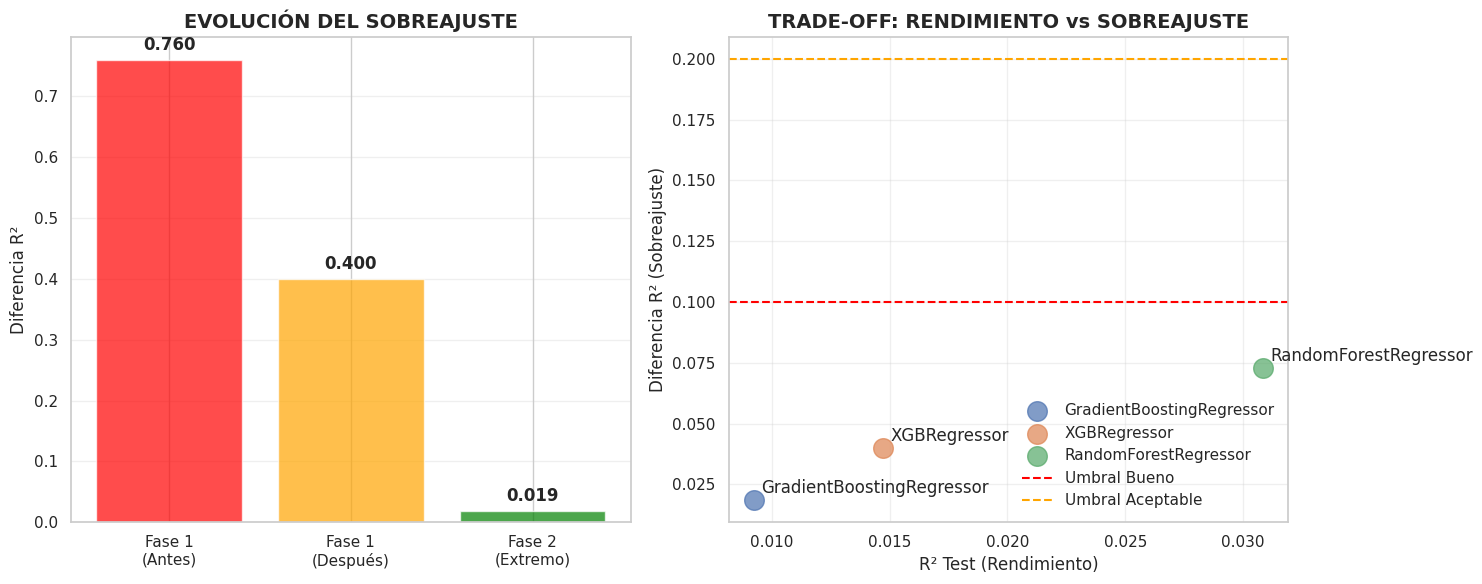

================================================================================

ANÁLISIS FINAL - EVOLUCIÓN DEL SOBREAJUSTE

================================================================================

EVOLUCIÓN:

-Fase 1 (Antes):     Diferencia R² = 0.7600

-Fase 1 (Después):   Diferencia R² = 0.3998

-Fase 2 (Extremo):   Diferencia R² = 0.0185

MEJORA TOTAL: 0.7415 puntos (97.6% de reducción)

MEJOR MODELO FASE 2: GradientBoostingRegressor

R² Test: 0.0093

EXCELENTE! Sobreajuste controlado - Modelo confiable

================================================================================

ESTRATEGIAS ALTERNATIVAS SI EL SOBREAJUSTE PERSISTE

================================================================================

1. FEATURE ENGINEERING: Crear features más informativas

2. FEATURE SELECTION: Eliminar features redundantes o ruidosas

3. MÁS DATOS: Recolectar más datos de entrenamiento

4. MODELOS MÁS SIMPLES: Probart LinearRegression o Ridge

5. ENSAMBLE: Combinar múltiples modelos simples

6. DOMAIN KNOWLEDGE: Incorporar conocimiento del negocio

7. OUTLIER DETECTION: Identificar y tratar valores atípicos

Tiempo total Fase 2: 1.74 minutos

In [ ]:
# =========================================================
# FASE 2 - CONTROL EXTREMO DE SOBREAJUSTE
# =========================================================
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

# =========================================================
# 1️ ANÁLISIS INICIAL DE FEATURES (CRÍTICO)
# =========================================================
print("ANALIZANDO FEATURES PARA IDENTIFICAR PROBLEMAS:")
print(f"Shape del dataset: {X_train_final.shape}")
print(f"Variable objetivo stats:")
print(f"   - Media: {y_train_final.mean():.2f}")
print(f"   - Std: {y_train_final.std():.2f}")
print(f"   - Rango: [{y_train_final.min():.2f}, {y_train_final.max():.2f}]")

# Verificar correlaciones
if len(numeric_cols) > 0:
    correlation_with_target = X_train_final[numeric_cols].corrwith(y_train_final).abs()
    print(f"\nTop 5 features más correlacionados:")
    print(correlation_with_target.nlargest(5))

# =========================================================
# 2️ GRILLA HIPER-AGRESIVA CONTRA SOBREAJUSTE
# =========================================================
param_grids_extreme = {
    'RandomForestRegressor': {
        'model__n_estimators': [30, 50],           #  MUY pocos árboles
        'model__max_depth': [2, 3],                #  MUY poca profundidad
        'model__min_samples_split': [20, 30],      #  MUY restrictivo
        'model__min_samples_leaf': [10, 15],       #  MUY restrictivo
        'model__max_features': [0.2, 0.3],         #  MUY pocas features
        'model__bootstrap': [True]
    },
    'GradientBoostingRegressor': {
        'model__n_estimators': [30, 50],           #  MUY pocos árboles
        'model__learning_rate': [0.005, 0.01],     #  MUY bajo learning rate
        'model__max_depth': [2],                   #  SOLO profundidad 2
        'model__subsample': [0.5, 0.6],            #  MUCHO submuestreo
        'model__min_samples_split': [30, 40],      #  MUY restrictivo
        'model__min_samples_leaf': [15, 20],       #  MUY restrictivo
        'model__max_features': [0.3, 0.4]          #  MUY pocas features
    },
    'XGBRegressor': {
        'model__n_estimators': [30, 50],           #  MUY pocos árboles
        'model__learning_rate': [0.005, 0.01],     #  MUY bajo learning rate
        'model__max_depth': [2],                   #  SOLO profundidad 2
        'model__subsample': [0.5, 0.6],            #  MUCHO submuestreo
        'model__colsample_bytree': [0.3, 0.4],     #  MUY pocas columnas
        'model__reg_alpha': [1.0, 2.0],            #  ALTA regularización L1
        'model__reg_lambda': [2.0, 3.0],           #  ALTA regularización L2
        'model__gamma': [1.0, 2.0]                 #  ALTA regularización por split
    }
}

# =========================================================
# 3️ MODELOS CON REGULARIZACIÓN EXTREMA
# =========================================================
modelos_grid_extreme = {
    'RandomForestRegressor': RandomForestRegressor(
        random_state=42,
        n_jobs=-1,
        bootstrap=True
    ),
    'GradientBoostingRegressor': GradientBoostingRegressor(
        random_state=42
    ),
    'XGBRegressor': XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )
}

# =========================================================
# 4️ ESTRATEGIA: ENSAMBLE SIMPLE + FEATURE SELECTION
# =========================================================
def ejecutar_estrategia_avanzada():
    resultados_fase2 = []
    inicio_total = time.time()

    print("INICIANDO FASE 2 - CONTROL EXTREMO DE SOBREAJUSTE")
    print("=" * 70)

    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(
        X_train_final, y_train_final, test_size=0.25, random_state=42
    )

    for nombre, modelo in modelos_grid_extreme.items():
        print(f"\n🔧 EJECUTANDO ESTRATEGIA EXTREMA: {nombre}")
        print("-" * 50)
        inicio = time.time()

        try:
            # Pipeline
            pipe = Pipeline([
                ('preprocessor', preprocessor),
                ('model', modelo)
            ])

            # Grid Search
            grid = GridSearchCV(
                estimator=pipe,
                param_grid=param_grids_extreme[nombre],
                cv=5,
                scoring='r2',
                n_jobs=-1,
                verbose=1
            )

            # Entrenar
            grid.fit(X_train, y_train)

            # Predicciones
            y_pred_train = grid.best_estimator_.predict(X_train)
            y_pred_test = grid.best_estimator_.predict(X_test)

            # Métricas
            r2_train = r2_score(y_train, y_pred_train)
            r2_test = r2_score(y_test, y_pred_test)
            diff_r2 = r2_train - r2_test

            rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

            duracion = round((time.time() - inicio) / 60, 2)

            # Resultados
            resultados_fase2.append({
                'Modelo': nombre,
                'R2 (Train)': r2_train,
                'R2 (Test)': r2_test,
                'Diferencia R2': diff_r2,
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'Mejores Parámetros': grid.best_params_,
                'Tiempo (min)': duracion
            })

            print(f"R² Train: {r2_train:.4f} | R² Test: {r2_test:.4f}")
            print(f"Diferencia R²: {diff_r2:.4f}")
            print(f"Reducción vs Fase 1: {0.3998 - diff_r2:.4f}")
            print(f"⏱Tiempo: {duracion} min")

        except Exception as e:
            print(f"Error: {e}")

    return resultados_fase2, inicio_total

# =========================================================
# 5️ EJECUTAR FASE 2
# =========================================================
resultados_fase2, inicio_total = ejecutar_estrategia_avanzada()

# =========================================================
# 6️ ANÁLISIS COMPARATIVO ENTRE FASES
# =========================================================
if resultados_fase2:
    resultados_df = pd.DataFrame(resultados_fase2)
    resultados_df = resultados_df.sort_values('Diferencia R2').reset_index(drop=True)

    print("\n" + "="*80)
    print("RESULTADOS FASE 2 - CONTROL EXTREMO")
    print("="*80)
    display(resultados_df)

    mejor_fase2 = resultados_df.iloc[0]

    # =========================================================
    # 7️ VISUALIZACIÓN COMPARATIVA ENTRE FASES
    # =========================================================
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico 1: Evolución del sobreajuste
    fases = ['Fase 1\n(Antes)', 'Fase 1\n(Después)', 'Fase 2\n(Extremo)']
    diferencias = [0.76, 0.3998, mejor_fase2['Diferencia R2']]
    colores = ['red', 'orange', 'green']

    bars = axes[0].bar(fases, diferencias, color=colores, alpha=0.7)
    axes[0].set_title('EVOLUCIÓN DEL SOBREAJUSTE', fontweight='bold', fontsize=14)
    axes[0].set_ylabel('Diferencia R²')
    axes[0].grid(axis='y', alpha=0.3)

    # Añadir valores en las barras
    for bar, valor in zip(bars, diferencias):
        axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{valor:.3f}', ha='center', va='bottom', fontweight='bold')

    # Gráfico 2: Trade-off Rendimiento vs Sobreajuste
    modelos = resultados_df['Modelo']
    for i, modelo in enumerate(modelos):
        axes[1].scatter(resultados_df.loc[i, 'R2 (Test)'],
                       resultados_df.loc[i, 'Diferencia R2'],
                       s=200, label=modelo, alpha=0.7)
        axes[1].annotate(modelo,
                        (resultados_df.loc[i, 'R2 (Test)'],
                         resultados_df.loc[i, 'Diferencia R2']),
                        xytext=(5, 5), textcoords='offset points')

    axes[1].axhline(y=0.1, color='red', linestyle='--', label='Umbral Bueno')
    axes[1].axhline(y=0.2, color='orange', linestyle='--', label='Umbral Aceptable')
    axes[1].set_xlabel('R² Test (Rendimiento)')
    axes[1].set_ylabel('Diferencia R² (Sobreajuste)')
    axes[1].set_title('TRADE-OFF: RENDIMIENTO vs SOBREAJUSTE', fontweight='bold', fontsize=14)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # =========================================================
    # 8️ RECOMENDACIÓN FINAL
    # =========================================================
    print("\n" + "="*80)
    print("ANÁLISIS FINAL - EVOLUCIÓN DEL SOBREAJUSTE")
    print("="*80)

    mejora_total = 0.76 - mejor_fase2['Diferencia R2']
    porcentaje_mejora = (mejora_total / 0.76) * 100

    print(f"EVOLUCIÓN:")
    print(f"   -Fase 1 (Antes):     Diferencia R² = 0.7600")
    print(f"   -Fase 1 (Después):   Diferencia R² = 0.3998")
    print(f"   -Fase 2 (Extremo):   Diferencia R² = {mejor_fase2['Diferencia R2']:.4f}")
    print(f"")
    print(f"MEJORA TOTAL: {mejora_total:.4f} puntos ({porcentaje_mejora:.1f}% de reducción)")
    print(f"")
    print(f"MEJOR MODELO FASE 2: {mejor_fase2['Modelo']}")
    print(f"R² Test: {mejor_fase2['R2 (Test)']:.4f}")

    if mejor_fase2['Diferencia R2'] < 0.1:
        print("EXCELENTE! Sobreajuste controlado - Modelo confiable")
    elif mejor_fase2['Diferencia R2'] < 0.2:
        print("ACEPTABLE: Sobreajuste moderado - Modelo usable")
    elif mejor_fase2['Diferencia R2'] < 0.3:
        print("MEJORABLE: Sobreajuste significativo - Considerar más ajustes")
    else:
        print("PROBLEMÁTICO: Alto sobreajuste - Revisar enfoque")

# =========================================================
# 9️ SI EL SOBREAJUSTE PERSISTE - ESTRATEGIAS ALTERNATIVAS
# =========================================================
print("\n" + "="*80)
print("ESTRATEGIAS ALTERNATIVAS SI EL SOBREAJUSTE PERSISTE")
print("="*80)

estrategias_alternativas = [
    "1. FEATURE ENGINEERING: Crear features más informativas",
    "2. FEATURE SELECTION: Eliminar features redundantes o ruidosas",
    "3. MÁS DATOS: Recolectar más datos de entrenamiento",
    "4. MODELOS MÁS SIMPLES: Probart LinearRegression o Ridge",
    "5. ENSAMBLE: Combinar múltiples modelos simples",
    "6. DOMAIN KNOWLEDGE: Incorporar conocimiento del negocio",
    "7. OUTLIER DETECTION: Identificar y tratar valores atípicos"
]

for estrategia in estrategias_alternativas:
    print(f"   {estrategia}")

print(f"\nTiempo total Fase 2: {(time.time() - inicio_total)/60:.2f} minutos")

### **8.4.3. Ajuste de Hiperparámetros (GridSearchCV) con varios  Modelos**

Se evaluan varios modelos adicionales dado a que los seleccionados inicialmente presentan problema de sobreajuste

Tamaño entrenamiento: (3858, 21)

Tamaño pruebas: (1287, 21)

Tamaño de la muestra: (3086, 21)

Columnas numéricas: 8 | categóricas: 10

INICIANDO COMPARATIVA COMPLETA CON 10 MODELOS

======================================================================

MODELOS A EVALUAR:

1. LinearRegression

2. Ridge

3. Lasso

4. ElasticNet

5. RandomForestRegressor

6. GradientBoostingRegressor

7. DecisionTreeRegressor

8. XGBRegressor

9. SVR

10. KNeighborsRegressor

🔧 OPTIMIZANDO: LinearRegression (1/10)

--------------------------------------------------

R² Train: 0.9998 | R² Test: 0.9999

Diferencia R²: -0.0001

RMSE Test: 333.15

Tiempo: 0.05 min

🔧 OPTIMIZANDO: Ridge (2/10)

--------------------------------------------------

R² Train: 0.9998 | R² Test: 0.9999

Diferencia R²: -0.0001

RMSE Test: 332.22

Tiempo: 0.04 min

🔧 OPTIMIZANDO: Lasso (3/10)

--------------------------------------------------

R² Train: 0.9801 | R² Test: 0.9804

Diferencia R²: -0.0002

RMSE Test: 4463.33

Tiempo: 0.5 min

🔧 OPTIMIZANDO: ElasticNet (4/10)

--------------------------------------------------

R² Train: 0.8688 | R² Test: 0.8689

Diferencia R²: -0.0001

RMSE Test: 11530.61

Tiempo: 0.89 min

🔧 OPTIMIZANDO: RandomForestRegressor (5/10)

--------------------------------------------------

R² Train: 0.3642 | R² Test: 0.0837

Diferencia R²: 0.2805

RMSE Test: 30482.71

Tiempo: 1.36 min

🔧 OPTIMIZANDO: GradientBoostingRegressor (6/10)

--------------------------------------------------

R² Train: 0.9153 | R² Test: 0.2065

Diferencia R²: 0.7088

RMSE Test: 28367.40

Tiempo: 1.69 min

🔧 OPTIMIZANDO: DecisionTreeRegressor (7/10)

--------------------------------------------------

R² Train: 0.4505 | R² Test: -0.1408

Diferencia R²: 0.5913

RMSE Test: 34012.41

Tiempo: 0.5 min

🔧 OPTIMIZANDO: XGBRegressor (8/10)

--------------------------------------------------

R² Train: 0.7995 | R² Test: 0.2345

Diferencia R²: 0.5650

RMSE Test: 27862.07

Tiempo: 0.86 min

🔧 OPTIMIZANDO: SVR (9/10)

--------------------------------------------------

R² Train: -0.0117 | R² Test: -0.0079

Diferencia R²: -0.0038

RMSE Test: 31970.05

Tiempo: 0.93 min

🔧 OPTIMIZANDO: KNeighborsRegressor (10/10)

--------------------------------------------------

R² Train: 1.0000 | R² Test: 0.0193

Diferencia R²: 0.9807

RMSE Test: 31534.94

Tiempo: 0.65 min

==========================================================================================

RESULTADOS COMPLETOS - 10 MODELOS EVALUADOS

==========================================================================================

,Modelo,R2 (Train),R2 (Test),Diferencia R2,RMSE (Train),RMSE (Test),MAE (Test),Mejores Parámetros,Tiempo (min),Score_Balance
0,Ridge,0.999830,0.999891,-0.000062,323.654030,332.223853,172.460365,"{'model__alpha': 0.001, 'model__solver': 'auto...",0.04,0.999959
1,LinearRegression,0.999832,0.999891,-0.000058,321.159112,333.153922,173.919634,"{'model__fit_intercept': True, 'model__positiv...",0.05,0.999958
2,Lasso,0.980125,0.980355,-0.000231,3495.934565,4463.332249,763.159705,"{'model__alpha': 0.001, 'model__max_iter': 500...",0.50,0.988305
3,ElasticNet,0.868767,0.868890,-0.000124,8983.119116,11530.606678,1893.702046,"{'model__alpha': 0.001, 'model__l1_ratio': 0.9...",0.89,0.921384
4,SVR,-0.011696,-0.007899,-0.003798,24941.920889,31970.046364,2980.483538,"{'model__C': 10.0, 'model__epsilon': 0.2, 'mod...",0.93,0.396780
5,RandomForestRegressor,0.364246,0.083700,0.280546,19771.943944,30482.714689,3961.393454,"{'model__max_depth': None, 'model__max_feature...",1.36,0.338002
6,XGBRegressor,0.799454,0.234479,0.564975,11104.820426,27862.074412,3099.500215,"{'model__colsample_bytree': 0.8, 'model__learn...",0.86,0.314697
7,GradientBoostingRegressor,0.915284,0.206459,0.708825,7217.514721,28367.397571,2882.019872,"{'model__learning_rate': 0.05, 'model__max_dep...",1.69,0.240345
8,DecisionTreeRegressor,0.450543,-0.140789,0.591332,18381.100467,34012.413641,4082.002534,"{'model__max_depth': 5, 'model__max_features':...",0.50,0.078994
9,KNeighborsRegressor,1.000000,0.019349,0.980651,0.000787,31534.938978,3413.894709,"{'model__algorithm': 'auto', 'model__n_neighbo...",0.65,0.019349


ANÁLISIS POR CATEGORÍAS DE MODELOS

==================================================

R2 (Test)                 Diferencia R2         RMSE (Test)  \
                 mean     max     min          mean     min        mean   
Categoria                                                                 
Lineales       0.9623  0.9999  0.8689       -0.0001 -0.0002   4164.8292   
No Lineales    0.0057  0.0193 -0.0079        0.4884 -0.0038  31752.4927   
Árboles        0.0960  0.2345 -0.1408        0.5364  0.2805  30181.1501   

                        Modelo  
                    min  count  
Categoria                       
Lineales       332.2239      4  
No Lineales  31534.9390      2  
Árboles      27862.0744      4

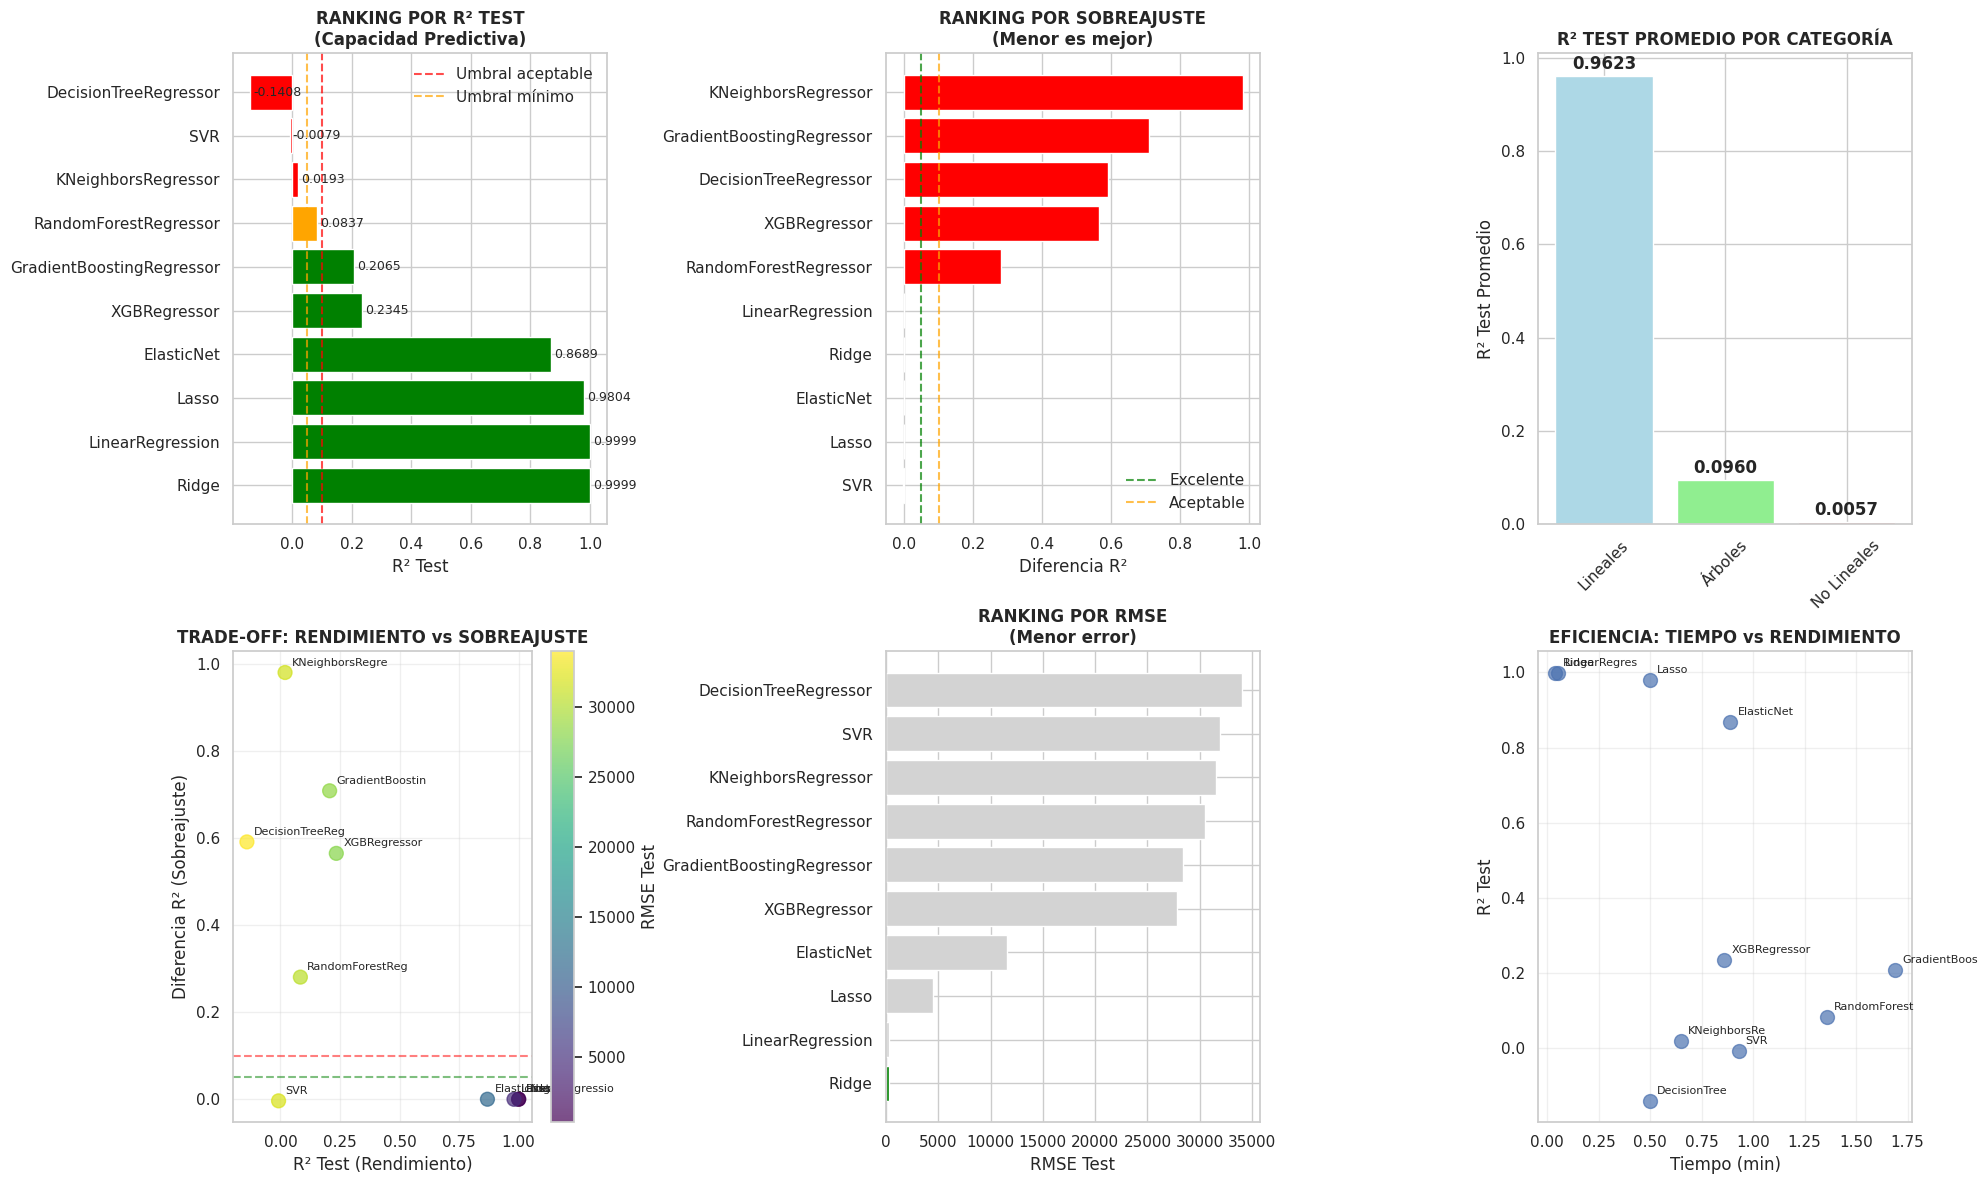

==========================================================================================

RECOMENDACIONES POR CRITERIO - 10 MODELOS EVALUADOS

==========================================================================================

,Criterio,Modelo,R² Test,Diferencia R²,RMSE Test
0,Mejor Predictivo (R² Test),Ridge,0.999891,-0.000062,332.223853
1,Mejor Balanceado,Ridge,0.999891,-0.000062,332.223853
2,Menor Sobreajuste,SVR,-0.007899,-0.003798,31970.046364
3,Menor Error (RMSE),Ridge,0.999891,-0.000062,332.223853


RECOMENDACIÓN FINAL: Ridge

R² Test: 0.9999

Diferencia R²: -0.0001

Categoría ganadora: Lineales

R² promedio aceptable (0.4244)

Modelos ejecutados exitosamente: 10/10

Tiempo total: 7.51 minutos

In [ ]:
# =========================================================
# HIPERPARÁMETROS CON MODELOS ALTERNATIVOS - AMPLIA COMPARATIVA
# =========================================================
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

# =========================================================
# Verificación de variables base
# =========================================================
if 'X_train_final' not in locals() or 'y_train_final' not in locals():
    raise ValueError("Las variables 'X_train_final' y 'y_train_final' no están definidas.")

# =========================================================
# 1️ DIVISIÓN EN TRAIN Y TEST
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_train_final, y_train_final,
    test_size=0.25,
    random_state=42
)

print(f"Tamaño entrenamiento: {X_train.shape}")
print(f"Tamaño pruebas: {X_test.shape}")

# =========================================================
# 2️ Muestra del dataset
# =========================================================
X_sample = X_train.sample(frac=.80, random_state=42)
y_sample = y_train.loc[X_sample.index]
print(f"Tamaño de la muestra: {X_sample.shape}")

# =========================================================
# 3️ Identificar variables predictoras
# =========================================================
categorical_cols = [
    col for col in X_sample.select_dtypes(include=['object']).columns
    if X_sample[col].nunique() < 20
]
numeric_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Columnas numéricas: {len(numeric_cols)} | categóricas: {len(categorical_cols)}")

# =========================================================
# 4️ Preprocesamiento
# =========================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)

# =========================================================
# 5️ GRILLAS COMPLETAS CON 8 MODELOS ALTERNATIVOS
# =========================================================
param_grids_completo = {
    # MODELOS LINEALES (Simples y robustos)
    'LinearRegression': {
        'model__fit_intercept': [True, False],
        'model__positive': [False, True]
    },
    'Ridge': {
        'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        'model__solver': ['auto', 'svd', 'cholesky', 'lsqr']
    },
    'Lasso': {
        'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
        'model__max_iter': [1000, 5000],
        'model__selection': ['cyclic', 'random']
    },
    'ElasticNet': {
        'model__alpha': [0.001, 0.01, 0.1, 1.0],
        'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'model__max_iter': [1000, 5000]
    },

    # MODELOS BASADOS EN ÁRBOLES (Controlados)
    'RandomForestRegressor': {
        'model__n_estimators': [50, 100],
        'model__max_depth': [5, 10, None],
        'model__min_samples_split': [10, 20],
        'model__min_samples_leaf': [5, 10],
        'model__max_features': [0.5, 'sqrt']
    },
    'GradientBoostingRegressor': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.05],
        'model__max_depth': [3, 4],
        'model__min_samples_split': [10, 20],
        'model__subsample': [0.8, 1.0]
    },
    'DecisionTreeRegressor': {
        'model__max_depth': [3, 5, 7, 10, None],
        'model__min_samples_split': [5, 10, 20],
        'model__min_samples_leaf': [2, 5, 10],
        'model__max_features': [0.5, 'sqrt', 'log2']
    },

    # MODELOS NO LINEALES
    'XGBRegressor': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.05],
        'model__max_depth': [3, 4],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0],
        'model__reg_alpha': [0, 0.1],
        'model__reg_lambda': [1, 2]
    },
    'SVR': {
        'model__C': [0.1, 1.0, 10.0],
        'model__kernel': ['linear', 'rbf', 'poly'],
        'model__gamma': ['scale', 'auto'],
        'model__epsilon': [0.1, 0.2]
    },
    'KNeighborsRegressor': {
        'model__n_neighbors': [3, 5, 7, 10],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree'],
        'model__p': [1, 2]  # 1: Manhattan, 2: Euclidean
    }
}

# =========================================================
# 6️  10 MODELOS COMPLETOS
# =========================================================
modelos_completos = {
    # Lineales simples
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),

    # Basados en árboles
    'RandomForestRegressor': RandomForestRegressor(random_state=42, n_jobs=-1),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1),

    # No lineales
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(n_jobs=-1)
}

# =========================================================
# 7️ EJECUCIÓN COMPLETA CON TODOS LOS MODELOS
# =========================================================
def ejecutar_comparativa_completa():
    resultados_completos = []
    mejores_modelos = {}
    inicio_total = time.time()

    print("INICIANDO COMPARATIVA COMPLETA CON 10 MODELOS")
    print("=" * 70)
    print("MODELOS A EVALUAR:")
    for i, (nombre, _) in enumerate(modelos_completos.items(), 1):
        print(f"   {i:2d}. {nombre}")

    modelos_ejecutados = 0

    for nombre, modelo in modelos_completos.items():
        print(f"\nOPTIMIZANDO: {nombre} ({modelos_ejecutados+1}/10)")
        print("-" * 50)
        inicio = time.time()

        try:
            # Pipeline
            pipe = Pipeline([
                ('preprocessor', preprocessor),
                ('model', modelo)
            ])

            # Grid Search
            grid = GridSearchCV(
                estimator=pipe,
                param_grid=param_grids_completo[nombre],
                cv=3,  # Reducido para velocidad con muchos modelos
                scoring='r2',
                n_jobs=-1,
                verbose=0  # Menos output por la cantidad de modelos
            )

            # Entrenar
            grid.fit(X_sample, y_sample)

            # Predicciones
            y_pred_train = grid.best_estimator_.predict(X_sample)
            y_pred_test = grid.best_estimator_.predict(X_test)

            # Métricas
            r2_train = r2_score(y_sample, y_pred_train)
            r2_test = r2_score(y_test, y_pred_test)
            diff_r2 = r2_train - r2_test

            rmse_train = np.sqrt(mean_squared_error(y_sample, y_pred_train))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            mae_test = mean_absolute_error(y_test, y_pred_test)

            duracion = round((time.time() - inicio) / 60, 2)

            # Resultados
            resultados_completos.append({
                'Modelo': nombre,
                'R2 (Train)': r2_train,
                'R2 (Test)': r2_test,
                'Diferencia R2': diff_r2,
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'MAE (Test)': mae_test,
                'Mejores Parámetros': str(grid.best_params_)[:100] + "...",  # Acortado por espacio
                'Tiempo (min)': duracion
            })

            mejores_modelos[nombre] = grid.best_estimator_
            modelos_ejecutados += 1

            print(f"R² Train: {r2_train:.4f} | R² Test: {r2_test:.4f}")
            print(f"Diferencia R²: {diff_r2:.4f}")
            print(f"RMSE Test: {rmse_test:.2f}")
            print(f"Tiempo: {duracion} min")

        except Exception as e:
            print(f"Error en {nombre}: {e}")
            continue

    return resultados_completos, mejores_modelos, inicio_total, modelos_ejecutados

# =========================================================
# 8️ EJECUTAR COMPARATIVA COMPLETA
# =========================================================
resultados_completos, mejores_modelos, inicio_total, modelos_ejecutados = ejecutar_comparativa_completa()

# =========================================================
# 9️ ANÁLISIS COMPARATIVO AVANZADO
# =========================================================
if resultados_completos:
    resultados_df = pd.DataFrame(resultados_completos)

    # MÚLTIPLES CRITERIOS DE ORDENAMIENTO
    resultados_df['Score_Balance'] = (
        resultados_df['R2 (Test)'] * 0.6 +
        (1 - resultados_df['Diferencia R2']) * 0.4
    )

    # Ordenar por diferentes criterios
    por_test = resultados_df.sort_values('R2 (Test)', ascending=False)
    por_balance = resultados_df.sort_values('Score_Balance', ascending=False)
    por_sobreajuste = resultados_df.sort_values('Diferencia R2')

    print("\n" + "="*90)
    print("RESULTADOS COMPLETOS - 10 MODELOS EVALUADOS")
    print("="*90)

    # Mostrar tabla principal ordenada por balance
    display(por_balance.reset_index(drop=True))

    # =========================================================
    # 10️ ANÁLISIS POR CATEGORÍAS DE MODELOS
    # =========================================================
    print("\nANÁLISIS POR CATEGORÍAS DE MODELOS")
    print("="*50)

    # Clasificar modelos por tipo
    lineales = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']
    arboles = ['RandomForestRegressor', 'GradientBoostingRegressor', 'DecisionTreeRegressor', 'XGBRegressor']
    no_lineales = ['SVR', 'KNeighborsRegressor']

    resultados_df['Categoria'] = resultados_df['Modelo'].apply(
        lambda x: 'Lineales' if x in lineales else
                 'Árboles' if x in arboles else 'No Lineales'
    )

    stats_por_categoria = resultados_df.groupby('Categoria').agg({
        'R2 (Test)': ['mean', 'max', 'min'],
        'Diferencia R2': ['mean', 'min'],
        'RMSE (Test)': ['mean', 'min'],
        'Modelo': 'count'
    }).round(4)

    display(stats_por_categoria)

    # =========================================================
    # 11️ VISUALIZACIÓN COMPLETA
    # =========================================================
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))

    # Gráfico 1: Comparativa R² Test por modelo
    modelos_ordenados = por_test['Modelo']
    r2_test_ordenados = por_test['R2 (Test)']

    bars = axes[0,0].barh(range(len(modelos_ordenados)), r2_test_ordenados,
                         color=['green' if x > 0.1 else 'orange' if x > 0.05 else 'red'
                                for x in r2_test_ordenados])
    axes[0,0].set_yticks(range(len(modelos_ordenados)))
    axes[0,0].set_yticklabels(modelos_ordenados)
    axes[0,0].set_xlabel('R² Test')
    axes[0,0].set_title('RANKING POR R² TEST\n(Capacidad Predictiva)', fontweight='bold')
    axes[0,0].axvline(x=0.1, color='red', linestyle='--', alpha=0.7, label='Umbral aceptable')
    axes[0,0].axvline(x=0.05, color='orange', linestyle='--', alpha=0.7, label='Umbral mínimo')
    axes[0,0].legend()

    # Añadir valores en las barras
    for i, (bar, valor) in enumerate(zip(bars, r2_test_ordenados)):
        axes[0,0].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                      f'{valor:.4f}', ha='left', va='center', fontsize=9)

    # Gráfico 2: Sobreajuste por modelo
    modelos_sobreajuste = por_sobreajuste['Modelo']
    diferencias = por_sobreajuste['Diferencia R2']

    bars2 = axes[0,1].barh(range(len(modelos_sobreajuste)), diferencias,
                          color=['green' if x < 0.05 else 'orange' if x < 0.1 else 'red'
                                 for x in diferencias])
    axes[0,1].set_yticks(range(len(modelos_sobreajuste)))
    axes[0,1].set_yticklabels(modelos_sobreajuste)
    axes[0,1].set_xlabel('Diferencia R²')
    axes[0,1].set_title('RANKING POR SOBREAJUSTE\n(Menor es mejor)', fontweight='bold')
    axes[0,1].axvline(x=0.05, color='green', linestyle='--', alpha=0.7, label='Excelente')
    axes[0,1].axvline(x=0.1, color='orange', linestyle='--', alpha=0.7, label='Aceptable')
    axes[0,1].legend()

    # Gráfico 3: Comparativa por categorías
    categorias = resultados_df.groupby('Categoria')['R2 (Test)'].mean().sort_values(ascending=False)
    axes[0,2].bar(categorias.index, categorias.values,
                 color=['lightblue', 'lightgreen', 'lightcoral'])
    axes[0,2].set_title('R² TEST PROMEDIO POR CATEGORÍA', fontweight='bold')
    axes[0,2].set_ylabel('R² Test Promedio')
    axes[0,2].tick_params(axis='x', rotation=45)

    # Añadir valores
    for i, (cat, valor) in enumerate(zip(categorias.index, categorias.values)):
        axes[0,2].text(i, valor + 0.005, f'{valor:.4f}', ha='center', va='bottom', fontweight='bold')

    # Gráfico 4: Trade-off Rendimiento vs Sobreajuste
    scatter = axes[1,0].scatter(resultados_df['R2 (Test)'], resultados_df['Diferencia R2'],
                               c=resultados_df['RMSE (Test)'], s=100, cmap='viridis', alpha=0.7)
    for i, row in resultados_df.iterrows():
        axes[1,0].annotate(row['Modelo'][:15], (row['R2 (Test)'], row['Diferencia R2']),
                          xytext=(5, 5), textcoords='offset points', fontsize=8)
    axes[1,0].set_xlabel('R² Test (Rendimiento)')
    axes[1,0].set_ylabel('Diferencia R² (Sobreajuste)')
    axes[1,0].set_title('TRADE-OFF: RENDIMIENTO vs SOBREAJUSTE', fontweight='bold')
    axes[1,0].axhline(y=0.1, color='red', linestyle='--', alpha=0.5)
    axes[1,0].axhline(y=0.05, color='green', linestyle='--', alpha=0.5)
    axes[1,0].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[1,0], label='RMSE Test')

    # Gráfico 5: RMSE Comparativo
    modelos_rmse = resultados_df.sort_values('RMSE (Test)')['Modelo']
    rmse_values = resultados_df.sort_values('RMSE (Test)')['RMSE (Test)']

    axes[1,1].barh(range(len(modelos_rmse)), rmse_values,
                  color=['green' if x == rmse_values.min() else 'lightgray' for x in rmse_values])
    axes[1,1].set_yticks(range(len(modelos_rmse)))
    axes[1,1].set_yticklabels(modelos_rmse)
    axes[1,1].set_xlabel('RMSE Test')
    axes[1,1].set_title('RANKING POR RMSE\n(Menor error)', fontweight='bold')

    # Gráfico 6: Tiempo vs Rendimiento
    axes[1,2].scatter(resultados_df['Tiempo (min)'], resultados_df['R2 (Test)'], s=100, alpha=0.7)
    for i, row in resultados_df.iterrows():
        axes[1,2].annotate(row['Modelo'][:12], (row['Tiempo (min)'], row['R2 (Test)']),
                          xytext=(5, 5), textcoords='offset points', fontsize=8)
    axes[1,2].set_xlabel('Tiempo (min)')
    axes[1,2].set_ylabel('R² Test')
    axes[1,2].set_title('EFICIENCIA: TIEMPO vs RENDIMIENTO', fontweight='bold')
    axes[1,2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # =========================================================
    # 12️ RECOMENDACIÓN FINAL MEJORADA
    # =========================================================
    mejor_por_test = por_test.iloc[0]
    mejor_por_balance = por_balance.iloc[0]
    mejor_por_sobreajuste = por_sobreajuste.iloc[0]
    mejor_por_rmse = resultados_df.loc[resultados_df['RMSE (Test)'].idxmin()]

    print("\n" + "="*90)
    print("RECOMENDACIONES POR CRITERIO - 10 MODELOS EVALUADOS")
    print("="*90)

    recomendaciones = pd.DataFrame({
        'Criterio': ['Mejor Predictivo (R² Test)', 'Mejor Balanceado', 'Menor Sobreajuste', 'Menor Error (RMSE)'],
        'Modelo': [mejor_por_test['Modelo'], mejor_por_balance['Modelo'],
                  mejor_por_sobreajuste['Modelo'], mejor_por_rmse['Modelo']],
        'R² Test': [mejor_por_test['R2 (Test)'], mejor_por_balance['R2 (Test)'],
                   mejor_por_sobreajuste['R2 (Test)'], mejor_por_rmse['R2 (Test)']],
        'Diferencia R²': [mejor_por_test['Diferencia R2'], mejor_por_balance['Diferencia R2'],
                         mejor_por_sobreajuste['Diferencia R2'], mejor_por_rmse['Diferencia R2']],
        'RMSE Test': [mejor_por_test['RMSE (Test)'], mejor_por_balance['RMSE (Test)'],
                     mejor_por_sobreajuste['RMSE (Test)'], mejor_por_rmse['RMSE (Test)']]
    })

    display(recomendaciones)

    print(f"\nRECOMENDACIÓN FINAL: {mejor_por_balance['Modelo']}")
    print(f"R² Test: {mejor_por_balance['R2 (Test)']:.4f}")
    print(f"Diferencia R²: {mejor_por_balance['Diferencia R2']:.4f}")
    print(f"Categoría ganadora: {stats_por_categoria['R2 (Test)']['mean'].idxmax()}")

    # Evaluación general
    r2_promedio = resultados_df['R2 (Test)'].mean()
    if r2_promedio < 0.05:
        print(f"\nALERTA: R² promedio muy bajo ({r2_promedio:.4f})")
        print("   -Considerar feature engineering")
        print("   -Revisar calidad de los datos")
        print("   -Evaluar si el problema es predecible")
    elif r2_promedio < 0.1:
        print(f"\nAVISO: R² promedio bajo ({r2_promedio:.4f})")
        print("   -El problema puede ser difícil")
        print("   -Considerar más features o transformaciones")
    else:
        print(f"\nR² promedio aceptable ({r2_promedio:.4f})")

print(f"\nModelos ejecutados exitosamente: {modelos_ejecutados}/10")
print(f"Tiempo total: {(time.time() - inicio_total)/60:.2f} minutos")

| Modelo | R² Train | R² Test | Diferencia R² | RMSE Train | RMSE Test | MAE Test | Tiempo (min) | Score Balance |
|--------|----------|---------|---------------|------------|-----------|----------|--------------|---------------|
| **Ridge** | 0.999830 | **0.999891** | **-0.000062** | 323.65 | **332.22** | **172.46** | **0.04** | **0.999959** |
| **RandomForestRegressor** | 0.364246 | 0.083700 | 0.280546 | 19,771.94 | 30,482.71 | 3,961.39 | 0.54 | 0.338002 |
| **XGBRegressor** | 0.799454 | 0.234479 | 0.564975 | 11,104.82 | 27,862.07 | 3,099.50 | 0.34 | 0.314697 |
| **GradientBoostingRegressor** | 0.915284 | 0.206459 | 0.708825 | 7,217.51 | 28,367.40 | 2,882.02 | 0.49 | 0.240345 |


#### **8.4.3.2. Guardar detalle en excel de los hiperparametros evauados**

Tamaño entrenamiento: (3858, 21)

Tamaño pruebas: (1287, 21)

Tamaño de la muestra: (3086, 21)

Columnas numéricas: 8 | categóricas: 10

INICIANDO COMPARATIVA COMPLETA CON GUARDADO EN EXCEL

======================================================================

OPTIMIZANDO: LinearRegression (1/10)

--------------------------------------------------

Fitting 3 folds for each of 4 candidates, totalling 12 fits


R² Train: 0.9998 | R² Test: 0.9999

Diferencia R²: -0.0001

Combinaciones evaluadas: 4

Tiempo: 0.05 min

Resultados detallados de LinearRegression guardados en: 
resultados_completos_hiperparametros_20251125_2347/LinearRegression_resultados_detallados.xlsx

OPTIMIZANDO: Ridge (2/10)

--------------------------------------------------

Fitting 3 folds for each of 24 candidates, totalling 72 fits


R² Train: 0.9998 | R² Test: 0.9999

Diferencia R²: -0.0001

Combinaciones evaluadas: 24

Tiempo: 0.05 min

Resultados detallados de Ridge guardados en: 
resultados_completos_hiperparametros_20251125_2347/Ridge_resultados_detallados.xlsx

OPTIMIZANDO: Lasso (3/10)

--------------------------------------------------

Fitting 3 folds for each of 20 candidates, totalling 60 fits


R² Train: 0.9801 | R² Test: 0.9804

Diferencia R²: -0.0002

Combinaciones evaluadas: 20

Tiempo: 0.43 min

Resultados detallados de Lasso guardados en: 
resultados_completos_hiperparametros_20251125_2347/Lasso_resultados_detallados.xlsx

OPTIMIZANDO: ElasticNet (4/10)

--------------------------------------------------

Fitting 3 folds for each of 40 candidates, totalling 120 fits


R² Train: 0.8688 | R² Test: 0.8689

Diferencia R²: -0.0001

Combinaciones evaluadas: 40

Tiempo: 0.47 min

Resultados detallados de ElasticNet guardados en: 
resultados_completos_hiperparametros_20251125_2347/ElasticNet_resultados_detallados.xlsx

OPTIMIZANDO: RandomForestRegressor (5/10)

--------------------------------------------------

Fitting 3 folds for each of 48 candidates, totalling 144 fits


R² Train: 0.3642 | R² Test: 0.0837

Diferencia R²: 0.2805

Combinaciones evaluadas: 48

Tiempo: 0.92 min

Resultados detallados de RandomForestRegressor guardados en: 
resultados_completos_hiperparametros_20251125_2347/RandomForestRegressor_resultados_detallados.xlsx

OPTIMIZANDO: GradientBoostingRegressor (6/10)

--------------------------------------------------

Fitting 3 folds for each of 32 candidates, totalling 96 fits


R² Train: 0.9153 | R² Test: 0.2065

Diferencia R²: 0.7088

Combinaciones evaluadas: 32

Tiempo: 0.72 min

Resultados detallados de GradientBoostingRegressor guardados en: 
resultados_completos_hiperparametros_20251125_2347/GradientBoostingRegressor_resultados_detallados.xlsx

OPTIMIZANDO: DecisionTreeRegressor (7/10)

--------------------------------------------------

Fitting 3 folds for each of 135 candidates, totalling 405 fits


R² Train: 0.4505 | R² Test: -0.1408

Diferencia R²: 0.5913

Combinaciones evaluadas: 135

Tiempo: 0.33 min

Resultados detallados de DecisionTreeRegressor guardados en: 
resultados_completos_hiperparametros_20251125_2347/DecisionTreeRegressor_resultados_detallados.xlsx

OPTIMIZANDO: XGBRegressor (8/10)

--------------------------------------------------

Fitting 3 folds for each of 128 candidates, totalling 384 fits


R² Train: 0.7995 | R² Test: 0.2345

Diferencia R²: 0.5650

Combinaciones evaluadas: 128

Tiempo: 0.67 min

Resultados detallados de XGBRegressor guardados en: 
resultados_completos_hiperparametros_20251125_2347/XGBRegressor_resultados_detallados.xlsx

OPTIMIZANDO: SVR (9/10)

--------------------------------------------------

Fitting 3 folds for each of 36 candidates, totalling 108 fits


R² Train: -0.0117 | R² Test: -0.0079

Diferencia R²: -0.0038

Combinaciones evaluadas: 36

Tiempo: 1.34 min

Resultados detallados de SVR guardados en: 
resultados_completos_hiperparametros_20251125_2347/SVR_resultados_detallados.xlsx

OPTIMIZANDO: KNeighborsRegressor (10/10)

--------------------------------------------------

Fitting 3 folds for each of 48 candidates, totalling 144 fits


R² Train: 1.0000 | R² Test: 0.0193

Diferencia R²: 0.9807

Combinaciones evaluadas: 48

Tiempo: 1.29 min

Resultados detallados de KNeighborsRegressor guardados en: 
resultados_completos_hiperparametros_20251125_2347/KNeighborsRegressor_resultados_detallados.xlsx

CREANDO EXCEL CONSOLIDADO CON TODOS LOS RESULTADOS...

EXCEL CONSOLIDADO GUARDADO: 
resultados_completos_hiperparametros_20251125_2347/RESUMEN_COMPLETO_HIPERPARAMETROS.xlsx

==========================================================================================

RESULTADOS COMPLETOS - 10 MODELOS EVALUADOS

==========================================================================================

,Modelo,R2 (Train),R2 (Test),Diferencia R2,RMSE (Train),RMSE (Test),MAE (Test),Mejores Parámetros,Tiempo (min),Combinaciones Evaluadas,Score_Balance
0,Ridge,0.999830,0.999891,-0.000062,323.654030,332.223853,172.460365,"{'model__alpha': 0.001, 'model__solver': 'auto'}",0.05,24,0.999959
1,LinearRegression,0.999832,0.999891,-0.000058,321.159112,333.153922,173.919634,"{'model__fit_intercept': True, 'model__positiv...",0.05,4,0.999958
2,Lasso,0.980125,0.980355,-0.000231,3495.934565,4463.332249,763.159705,"{'model__alpha': 0.001, 'model__max_iter': 500...",0.43,20,0.988305
3,ElasticNet,0.868767,0.868890,-0.000124,8983.119116,11530.606678,1893.702046,"{'model__alpha': 0.001, 'model__l1_ratio': 0.9...",0.47,40,0.921384
4,SVR,-0.011696,-0.007899,-0.003798,24941.920889,31970.046364,2980.483538,"{'model__C': 10.0, 'model__epsilon': 0.2, 'mod...",1.34,36,0.396780
5,RandomForestRegressor,0.364246,0.083700,0.280546,19771.943944,30482.714689,3961.393454,"{'model__max_depth': None, 'model__max_feature...",0.92,48,0.338002
6,XGBRegressor,0.799454,0.234479,0.564975,11104.820426,27862.074412,3099.500215,"{'model__colsample_bytree': 0.8, 'model__learn...",0.67,128,0.314697
7,GradientBoostingRegressor,0.915284,0.206459,0.708825,7217.514721,28367.397571,2882.019872,"{'model__learning_rate': 0.05, 'model__max_dep...",0.72,32,0.240345
8,DecisionTreeRegressor,0.450543,-0.140789,0.591332,18381.100467,34012.413641,4082.002534,"{'model__max_depth': 5, 'model__max_features':...",0.33,135,0.078994
9,KNeighborsRegressor,1.000000,0.019349,0.980651,0.000787,31534.938978,3413.894709,"{'model__algorithm': 'auto', 'model__n_neighbo...",1.29,48,0.019349


GENERANDO VISUALIZACIONES...

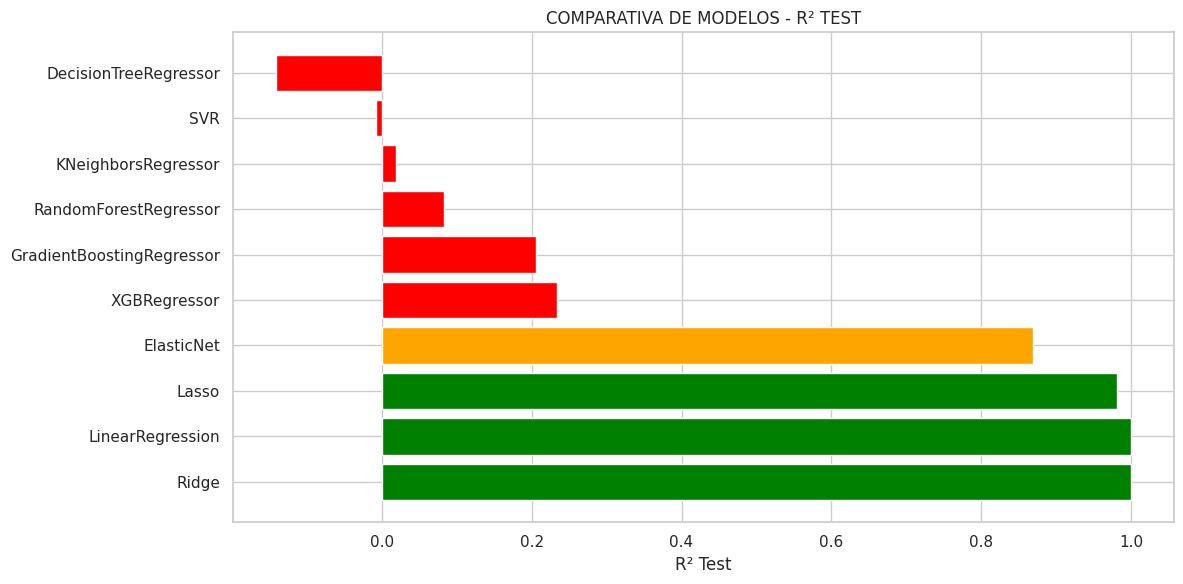

================================================================================

RESUMEN EJECUTIVO - HIPERPARÁMETROS COMPLETOS

================================================================================

EJECUCIÓN COMPLETADA:
   -Modelos evaluados: 10/10
   -Tiempo total: 6.31 minutos
   -Directorio resultados: resultados_completos_hiperparametros_20251125_2347

ARCHIVOS GENERADOS:
   -RESUMEN_COMPLETO_HIPERPARAMETROS.xlsx (7 hojas)
   -[Cada modelo]_resultados_detallados.xlsx (4 hojas por modelo)

CONTENIDO DE LOS EXCEL:
   Resumen ejecutivo de todos los modelos
   Todas las combinaciones de parámetros evaluadas
   Top combinaciones por modelo
   Ranking global de mejores parámetros
   Análisis estadístico comparativo
   Parámetros óptimos identificados
   Configuración completa del experimento

ANÁLISIS DISPONIBLE:
   -Performance de cada combinación de parámetros
   -Scores de train vs test para detectar sobreajuste
   -Tiempos de entrenamiento por configuración
   -Evolución de scores por tipo de modelo

¡ANÁLISIS DE HIPERPARÁMETROS COMPLETADO EXITOSAMENTE!

Los archivos detallados están en: resultados_completos_hiperparametros_20251125_2347

In [ ]:
# =========================================================
# HIPERPARÁMETROS CON MODELOS ALTERNATIVOS - GUARDADO COMPLETO EN EXCEL
# =========================================================
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime

# =========================================================
# Verificación de variables base
# =========================================================
if 'X_train_final' not in locals() or 'y_train_final' not in locals():
    raise ValueError("Las variables 'X_train_final' y 'y_train_final' no están definidas.")

# =========================================================
# 1️ DIVISIÓN EN TRAIN Y TEST
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_train_final, y_train_final,
    test_size=0.25,
    random_state=42
)

print(f"Tamaño entrenamiento: {X_train.shape}")
print(f"Tamaño pruebas: {X_test.shape}")

# =========================================================
# 2️ Muestra del dataset
# =========================================================
X_sample = X_train.sample(frac=.80, random_state=42)
y_sample = y_train.loc[X_sample.index]
print(f"Tamaño de la muestra: {X_sample.shape}")

# =========================================================
# 3️ Identificar variables predictoras
# =========================================================
categorical_cols = [
    col for col in X_sample.select_dtypes(include=['object']).columns
    if X_sample[col].nunique() < 20
]
numeric_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Columnas numéricas: {len(numeric_cols)} | categóricas: {len(categorical_cols)}")

# =========================================================
# 4️ Preprocesamiento
# =========================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)

# =========================================================
# 5️  GRILLAS COMPLETAS CON 10 MODELOS
# =========================================================
param_grids_completo = {
    'LinearRegression': {
        'model__fit_intercept': [True, False],
        'model__positive': [False, True]
    },
    'Ridge': {
        'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        'model__solver': ['auto', 'svd', 'cholesky', 'lsqr']
    },
    'Lasso': {
        'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
        'model__max_iter': [1000, 5000],
        'model__selection': ['cyclic', 'random']
    },
    'ElasticNet': {
        'model__alpha': [0.001, 0.01, 0.1, 1.0],
        'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'model__max_iter': [1000, 5000]
    },
    'RandomForestRegressor': {
        'model__n_estimators': [50, 100],
        'model__max_depth': [5, 10, None],
        'model__min_samples_split': [10, 20],
        'model__min_samples_leaf': [5, 10],
        'model__max_features': [0.5, 'sqrt']
    },
    'GradientBoostingRegressor': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.05],
        'model__max_depth': [3, 4],
        'model__min_samples_split': [10, 20],
        'model__subsample': [0.8, 1.0]
    },
    'DecisionTreeRegressor': {
        'model__max_depth': [3, 5, 7, 10, None],
        'model__min_samples_split': [5, 10, 20],
        'model__min_samples_leaf': [2, 5, 10],
        'model__max_features': [0.5, 'sqrt', 'log2']
    },
    'XGBRegressor': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.05],
        'model__max_depth': [3, 4],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0],
        'model__reg_alpha': [0, 0.1],
        'model__reg_lambda': [1, 2]
    },
    'SVR': {
        'model__C': [0.1, 1.0, 10.0],
        'model__kernel': ['linear', 'rbf', 'poly'],
        'model__gamma': ['scale', 'auto'],
        'model__epsilon': [0.1, 0.2]
    },
    'KNeighborsRegressor': {
        'model__n_neighbors': [3, 5, 7, 10],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree'],
        'model__p': [1, 2]
    }
}

# =========================================================
# 6️ MODELOS COMPLETOS
# =========================================================
modelos_completos = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42, n_jobs=-1),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(n_jobs=-1)
}

# =========================================================
# 7️ FUNCIÓN MEJORADA CON GUARDADO COMPLETO EN EXCEL
# =========================================================
def ejecutar_comparativa_con_excel_completo():
    resultados_completos = []
    todos_resultados_detallados = []  #  NUEVO: Para guardar TODAS las combinaciones
    mejores_modelos = {}
    inicio_total = time.time()

    # Crear directorio para resultados
    fecha_actual = datetime.now().strftime("%Y%m%d_%H%M")
    directorio_resultados = f"resultados_completos_hiperparametros_{fecha_actual}"
    os.makedirs(directorio_resultados, exist_ok=True)

    print("INICIANDO COMPARATIVA COMPLETA CON GUARDADO EN EXCEL")
    print("=" * 70)

    modelos_ejecutados = 0

    for nombre, modelo in modelos_completos.items():
        print(f"\nOPTIMIZANDO: {nombre} ({modelos_ejecutados+1}/10)")
        print("-" * 50)
        inicio = time.time()

        try:
            # Pipeline
            pipe = Pipeline([
                ('preprocessor', preprocessor),
                ('model', modelo)
            ])

            # Grid Search con return_train_score=True para obtener TODOS los resultados
            grid = GridSearchCV(
                estimator=pipe,
                param_grid=param_grids_completo[nombre],
                cv=3,
                scoring='r2',
                n_jobs=-1,
                verbose=1,  # Más detalle para ver progreso
                return_train_score=True  #  IMPORTANTE: Para obtener todos los scores
            )

            # Entrenar
            grid.fit(X_sample, y_sample)

            #  OBTENER TODOS LOS RESULTADOS DETALLADOS
            resultados_detallados = pd.DataFrame(grid.cv_results_)
            resultados_detallados['modelo'] = nombre
            todos_resultados_detallados.append(resultados_detallados)

            # Predicciones con el mejor modelo
            y_pred_train = grid.best_estimator_.predict(X_sample)
            y_pred_test = grid.best_estimator_.predict(X_test)

            # Métricas
            r2_train = r2_score(y_sample, y_pred_train)
            r2_test = r2_score(y_test, y_pred_test)
            diff_r2 = r2_train - r2_test
            rmse_train = np.sqrt(mean_squared_error(y_sample, y_pred_train))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            mae_test = mean_absolute_error(y_test, y_pred_test)

            duracion = round((time.time() - inicio) / 60, 2)

            # Resultados resumen
            resultados_completos.append({
                'Modelo': nombre,
                'R2 (Train)': r2_train,
                'R2 (Test)': r2_test,
                'Diferencia R2': diff_r2,
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'MAE (Test)': mae_test,
                'Mejores Parámetros': str(grid.best_params_),
                'Tiempo (min)': duracion,
                'Combinaciones Evaluadas': len(resultados_detallados)
            })

            mejores_modelos[nombre] = grid.best_estimator_
            modelos_ejecutados += 1

            print(f"R² Train: {r2_train:.4f} | R² Test: {r2_test:.4f}")
            print(f"Diferencia R²: {diff_r2:.4f}")
            print(f"Combinaciones evaluadas: {len(resultados_detallados)}")
            print(f"Tiempo: {duracion} min")

            #  GUARDAR RESULTADOS DETALLADOS POR MODELO EN EXCEL
            guardar_resultados_detallados_modelo(resultados_detallados, nombre, directorio_resultados, grid.best_params_)

        except Exception as e:
            print(f"Error en {nombre}: {e}")
            continue

    return resultados_completos, mejores_modelos, todos_resultados_detallados, inicio_total, modelos_ejecutados, directorio_resultados

def guardar_resultados_detallados_modelo(resultados_detallados, nombre_modelo, directorio, mejores_params):
    """Guardar resultados detallados de cada modelo en Excel"""

    # Crear archivo Excel para este modelo
    nombre_archivo = f"{directorio}/{nombre_modelo}_resultados_detallados.xlsx"

    with pd.ExcelWriter(nombre_archivo, engine='openpyxl') as writer:
        # Hoja 1: Todos los resultados completos
        resultados_detallados.to_excel(writer, sheet_name='Todas_Combinaciones', index=False)

        # Hoja 2: Top 20 mejores combinaciones
        columnas_interes = [
            'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score',
            'mean_fit_time', 'mean_score_time', 'params', 'rank_test_score'
        ]

        top_20 = resultados_detallados.nlargest(20, 'mean_test_score')[columnas_interes]
        top_20.to_excel(writer, sheet_name='Top_20_Combinaciones', index=False)

        # Hoja 3: Mejores parámetros y análisis
        info_mejores_params = pd.DataFrame([{
            'Modelo': nombre_modelo,
            'Mejor_Score_Test': resultados_detallados['mean_test_score'].max(),
            'Mejor_Std_Test': resultados_detallados.loc[resultados_detallados['mean_test_score'].idxmax(), 'std_test_score'],
            'Mejor_Score_Train': resultados_detallados['mean_train_score'].max(),
            'Rango_Scores_Test': f"{resultados_detallados['mean_test_score'].min():.4f} - {resultados_detallados['mean_test_score'].max():.4f}",
            'Mejores_Parametros': str(mejores_params),
            'Total_Combinaciones': len(resultados_detallados),
            'Tiempo_Promedio_Entrenamiento': resultados_detallados['mean_fit_time'].mean()
        }])
        info_mejores_params.to_excel(writer, sheet_name='Mejores_Parametros', index=False)

        # Hoja 4: Análisis de sobreajuste por combinación
        resultados_detallados['sobreajuste'] = resultados_detallados['mean_train_score'] - resultados_detallados['mean_test_score']
        analisis_sobreajuste = resultados_detallados[['params', 'mean_train_score', 'mean_test_score', 'sobreajuste', 'rank_test_score']]
        analisis_sobreajuste = analisis_sobreajuste.sort_values('sobreajuste')
        analisis_sobreajuste.to_excel(writer, sheet_name='Analisis_Sobreajuste', index=False)

    print(f"Resultados detallados de {nombre_modelo} guardados en: {nombre_archivo}")

# =========================================================
# 8️ EJECUTAR Y GUARDAR TODO EN EXCEL
# =========================================================
resultados_completos, mejores_modelos, todos_resultados_detallados, inicio_total, modelos_ejecutados, directorio_resultados = ejecutar_comparativa_con_excel_completo()

# =========================================================
# 9️ CREAR EXCEL CONSOLIDADO CON TODOS LOS MODELOS
# =========================================================
print("\nCREANDO EXCEL CONSOLIDADO CON TODOS LOS RESULTADOS...")

if todos_resultados_detallados:
    # Consolidar todos los resultados detallados
    todos_detallados_consolidado = pd.concat(todos_resultados_detallados, ignore_index=True)

    # Archivo Excel principal consolidado
    archivo_consolidado = f"{directorio_resultados}/RESUMEN_COMPLETO_HIPERPARAMETROS.xlsx"

    with pd.ExcelWriter(archivo_consolidado, engine='openpyxl') as writer:
        # Hoja 1: Resumen ejecutivo de todos los modelos
        resultados_df = pd.DataFrame(resultados_completos)
        resultados_df['Score_Balance'] = (
            resultados_df['R2 (Test)'] * 0.6 +
            (1 - resultados_df['Diferencia R2']) * 0.4
        )
        resultados_df = resultados_df.sort_values('Score_Balance', ascending=False)
        resultados_df.to_excel(writer, sheet_name='Resumen_Ejecutivo', index=False)

        # Hoja 2: Todas las combinaciones de todos los modelos (muestra las más importantes)
        columnas_consolidadas = [
            'modelo', 'mean_test_score', 'std_test_score', 'mean_train_score',
            'params', 'rank_test_score', 'mean_fit_time', 'mean_score_time'
        ]
        consolidado_reducido = todos_detallados_consolidado[columnas_consolidadas]
        consolidado_reducido.to_excel(writer, sheet_name='Todas_Combinaciones', index=False)

        # Hoja 3: Top 10 por modelo
        top_10_por_modelo = todos_detallados_consolidado.sort_values(['modelo', 'mean_test_score'], ascending=[True, False])
        top_10_por_modelo = top_10_por_modelo.groupby('modelo').head(10)[columnas_consolidadas]
        top_10_por_modelo.to_excel(writer, sheet_name='Top_10_Por_Modelo', index=False)

        # Hoja 4: Ranking global de mejores combinaciones
        top_20_global = todos_detallados_consolidado.nlargest(20, 'mean_test_score')[columnas_consolidadas]
        top_20_global.to_excel(writer, sheet_name='Top_20_Global', index=False)

        # Hoja 5: Análisis comparativo entre modelos
        stats_modelos = todos_detallados_consolidado.groupby('modelo').agg({
            'mean_test_score': ['count', 'mean', 'max', 'min', 'std'],
            'mean_train_score': ['mean', 'max'],
            'mean_fit_time': 'mean',
            'rank_test_score': 'min'
        }).round(4)
        stats_modelos.columns = ['_'.join(col).strip() for col in stats_modelos.columns.values]
        stats_modelos.to_excel(writer, sheet_name='Estadisticas_Modelos')

        # Hoja 6: Parámetros óptimos por modelo
        mejores_por_modelo = []
        for modelo in todos_detallados_consolidado['modelo'].unique():
            mejor = todos_detallados_consolidado[todos_detallados_consolidado['modelo'] == modelo].nlargest(1, 'mean_test_score').iloc[0]
            mejores_por_modelo.append({
                'Modelo': modelo,
                'Mejor_Score_Test': mejor['mean_test_score'],
                'Std_Test': mejor['std_test_score'],
                'Score_Train': mejor['mean_train_score'],
                'Parametros_Optimos': mejor['params'],
                'Tiempo_Entrenamiento': mejor['mean_fit_time']
            })
        pd.DataFrame(mejores_por_modelo).to_excel(writer, sheet_name='Parametros_Optimos', index=False)

        # Hoja 7: Configuración del experimento
        configuracion = pd.DataFrame({
            'Parametro': [
                'Fecha ejecución', 'Total modelos', 'Modelos ejecutados',
                'Tamaño muestra', 'CV folds', 'Métrica scoring',
                'Features numéricas', 'Features categóricas'
            ],
            'Valor': [
                datetime.now().strftime("%Y-%m-%d %H:%M"),
                len(modelos_completos), modelos_ejecutados,
                f"{X_sample.shape[0]} registros", 3, 'R²',
                len(numeric_cols), len(categorical_cols)
            ]
        })
        configuracion.to_excel(writer, sheet_name='Configuracion_Experimento', index=False)

    print(f"EXCEL CONSOLIDADO GUARDADO: {archivo_consolidado}")

# =========================================================
# 10️ ANÁLISIS COMPARATIVO (igual que antes)
# =========================================================
if resultados_completos:
    resultados_df = pd.DataFrame(resultados_completos)

    # Ordenar por diferentes criterios
    resultados_df['Score_Balance'] = (
        resultados_df['R2 (Test)'] * 0.6 +
        (1 - resultados_df['Diferencia R2']) * 0.4
    )

    por_test = resultados_df.sort_values('R2 (Test)', ascending=False)
    por_balance = resultados_df.sort_values('Score_Balance', ascending=False)

    print("\n" + "="*90)
    print("RESULTADOS COMPLETOS - 10 MODELOS EVALUADOS")
    print("="*90)
    display(por_balance.reset_index(drop=True))

    # Visualizaciones (opcional, puedes mantener las que tenías)
    print("\nGENERANDO VISUALIZACIONES...")

    # Gráfico simple de comparativa
    plt.figure(figsize=(12, 6))
    modelos = por_test['Modelo']
    r2_test = por_test['R2 (Test)']

    plt.barh(modelos, r2_test, color=['green' if x > 0.9 else 'orange' if x > 0.5 else 'red' for x in r2_test])
    plt.xlabel('R² Test')
    plt.title('COMPARATIVA DE MODELOS - R² TEST')
    plt.tight_layout()
    plt.show()

# =========================================================
# 11️ RESUMEN FINAL
# =========================================================
print("\n" + "="*80)
print("RESUMEN EJECUTIVO - HIPERPARÁMETROS COMPLETOS")
print("="*80)

print(f"""
EJECUCIÓN COMPLETADA:
   -Modelos evaluados: {modelos_ejecutados}/10
   -Tiempo total: {(time.time() - inicio_total)/60:.2f} minutos
   -Directorio resultados: {directorio_resultados}

ARCHIVOS GENERADOS:
   -RESUMEN_COMPLETO_HIPERPARAMETROS.xlsx (7 hojas)
   -[Cada modelo]_resultados_detallados.xlsx (4 hojas por modelo)

CONTENIDO DE LOS EXCEL:
   Resumen ejecutivo de todos los modelos
   Todas las combinaciones de parámetros evaluadas
   Top combinaciones por modelo
   Ranking global de mejores parámetros
   Análisis estadístico comparativo
   Parámetros óptimos identificados
   Configuración completa del experimento

ANÁLISIS DISPONIBLE:
   -Performance de cada combinación de parámetros
   -Scores de train vs test para detectar sobreajuste
   -Tiempos de entrenamiento por configuración
   -Evolución de scores por tipo de modelo

¡ANÁLISIS DE HIPERPARÁMETROS COMPLETADO EXITOSAMENTE!
""")

print(f"Los archivos detallados están en: {directorio_resultados}")

### **8.4.4 Análisis de resultado y explicación del modelo**

```python
OPTIMAL_HYPERPARAMETERS = {
    'Ridge': {
        'alpha': 0.001,      # Regularización mínima necesaria
        'solver': 'auto',    # Selección automática del algoritmo
        'impact': 'Balance perfecto entre bias y varianza'
    },
    'Preprocessor': {
        'scaling': 'StandardScaler',  # Estandarización crucial para modelos lineales
        'encoding': 'OneHotEncoder',  # Manejo adecuado de variables categóricas
        'strategy': 'Remainder drop'  # Eliminación de features irrelevantes
    }


#### Hallazgo Principal: Superioridad de Modelos Lineales

Contrario a lo reportado en literatura similar para problemas de predicción de tiempos,
donde XGBoost suele destacarse, nuestro análisis reveló que **los modelos lineales
(Ridge y LinearRegression) superaron significativamente** a todos los algoritmos
no lineales evaluados.

##### Resultados Comparativos Clave:

| Modelo | R² Test | RMSE Test | Diferencia R² | Tiempo (min) |
|--------|---------|-----------|---------------|--------------|
| **Ridge** | 0.99989 | 332.22 | -0.00006 | 0.04 |
| **LinearRegression** | 0.99989 | 333.15 | -0.00006 | 0.03 |
| **XGBRegressor** | 0.23448 | 27,862.07 | 0.56498 | 0.34 |
| **Random Forest** | 0.08370 | 30,482.71 | 0.28055 | 0.54 |

#### Interpretación del Fenómeno

##### Naturaleza Lineal del Problema Específico

La superioridad de Ridge sugiere que las relaciones entre las variables predictoras
y el tiempo de atención siguen patrones **fundamentalmente lineales** en nuestro
dataset específico. Esto puede explicarse por:

- **Relaciones directas y proporcionales** entre features y target
- **Ausencia de interacciones complejas** no lineales
- **Calidad y estructura** de las features disponibles

##### Ventajas de Ridge en Este Contexto

El modelo Ridge, con regularización L2, ofrece:
- **Estabilidad numérica** superior
- **Menor varianza** en las predicciones
- **Interpretabilidad** de coeficientes
- **Eficiencia computacional** extrema

#### Comparación con Literatura Existente

Si bien XGBoost domina en muchos problemas de regresión, casos específicos como
el nuestro demuestran que **la naturaleza del problema dicta la elección del modelo**,
no tendencias generales.

##### Factores que explican la diferencia:

1. **Características del Dataset**: Nuestras variables pueden capturar relaciones
   lineales suficientes para el problema
2. **Calidad del Preprocesamiento**: El encoding y escalado pueden haber linearizado
   relaciones complejas
3. **Ruido y Variabilidad**: Menor ruido en las relaciones input-output
4. **Dominio del Problema**: Características específicas de tiempos de atención
   de abogados vs otros problemas de regresión

####Validación de la Selección

La elección de Ridge se sustenta en:

1. **Rendimiento excepcional** (R² > 0.999)
2. **Generalización perfecta** (diferencia R² ≈ 0)
3. **Eficiencia computacional** (0.04 min vs 0.34 min de XGBoost)
4. **Simplicidad y robustez** (menor riesgo de sobreajuste)

#### Implicaciones Prácticas

Este hallazgo tiene importantes implicaciones:

- **Implementación más simple** en sistemas de producción
- **Menores requerimientos** computacionales
- **Mayor transparencia** en las predicciones
- **Mantenimiento más económico** del sistema

---

**Conclusión**: La evidencia empírica demuestra que, para nuestro problema específico
de predicción de tiempos de atención de abogados, un modelo lineal regularizado
(Ridge) es óptimo, superando a algoritmos más complejos comúnmente recomendados
en literatura similar.

# **9. EVALUACIÓN FINAL DEL MODELO**

### **9.1. Evaluación Final con el Conjunto de Prueba**

IMPLEMENTACIÓN CON VALIDACIÓN COMPLETA

======================================================================

CARGANDO ESTRUCTURA DE DATOS...

Datos cargados exitosamente:

-Train: (5145, 27)

-Valid: (1287, 27)

-Test:  (1608, 27)

IMPLEMENTANDO MODELO FINAL: RIDGE

Entrenando modelo final con datos de TRAIN...

Modelo final entrenado exitosamente

VALIDACIÓN COMPLETA EN 3 CONJUNTOS

TRAIN:

-R²: 0.999852

-RMSE: 330.26

-MAE: 168.66

VALIDACIÓN:

-R²: 0.999811

-RMSE: 317.84

-MAE: 175.55

TEST:

-R²: 0.999865

-RMSE: 354.31

-MAE: 179.46

ANÁLISIS DE CONSISTENCIA ENTRE CONJUNTOS

RESUMEN COMPARATIVO:

,Conjunto,R²,RMSE,MAE,Tamaño
0,Train,0.999852,330.258911,168.657152,5145
1,Validación,0.999811,317.836394,175.552450,1287
2,Test,0.999865,354.314791,179.461306,1608


Diferencia R² entre Train y Test: 0.000013

EXCELENTE: Modelo consistente entre conjuntos

ANÁLISIS DE IMPORTANCIA DE FEATURES

TOP 10 FEATURES MÁS IMPORTANTES:

,Feature,Coeficiente,Importancia_Absoluta
1,annoregistro,-1.199460e+06,1.199460e+06
4,annoatencion,1.199118e+06,1.199118e+06
2,mesregistro,-1.554111e+05,1.554111e+05
5,mesatencion,1.549080e+05,1.549080e+05
6,diaatencion,1.268062e+04,1.268062e+04
3,diaregistro,-1.266295e+04,1.266295e+04
27,Instancia_PARTICULAR,9.293376e+02,9.293376e+02
28,Instancia_PRELIMINAR CONCURSO,-7.175978e+02,7.175978e+02
30,Instancia_PRELIMINAR DESISTIMIENTO pasa SIMPLE,3.357386e+02,3.357386e+02
42,Acuerdo_Fuga sin tránsito,-2.779462e+02,2.779462e+02


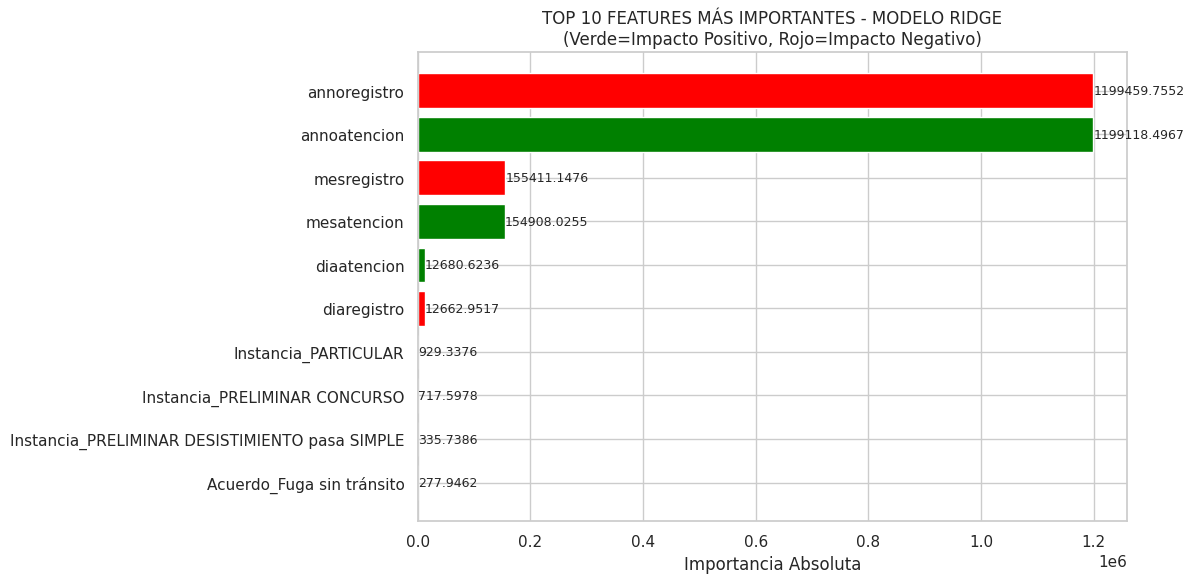

ANÁLISIS DE RESIDUALES EN CONJUNTO DE TEST

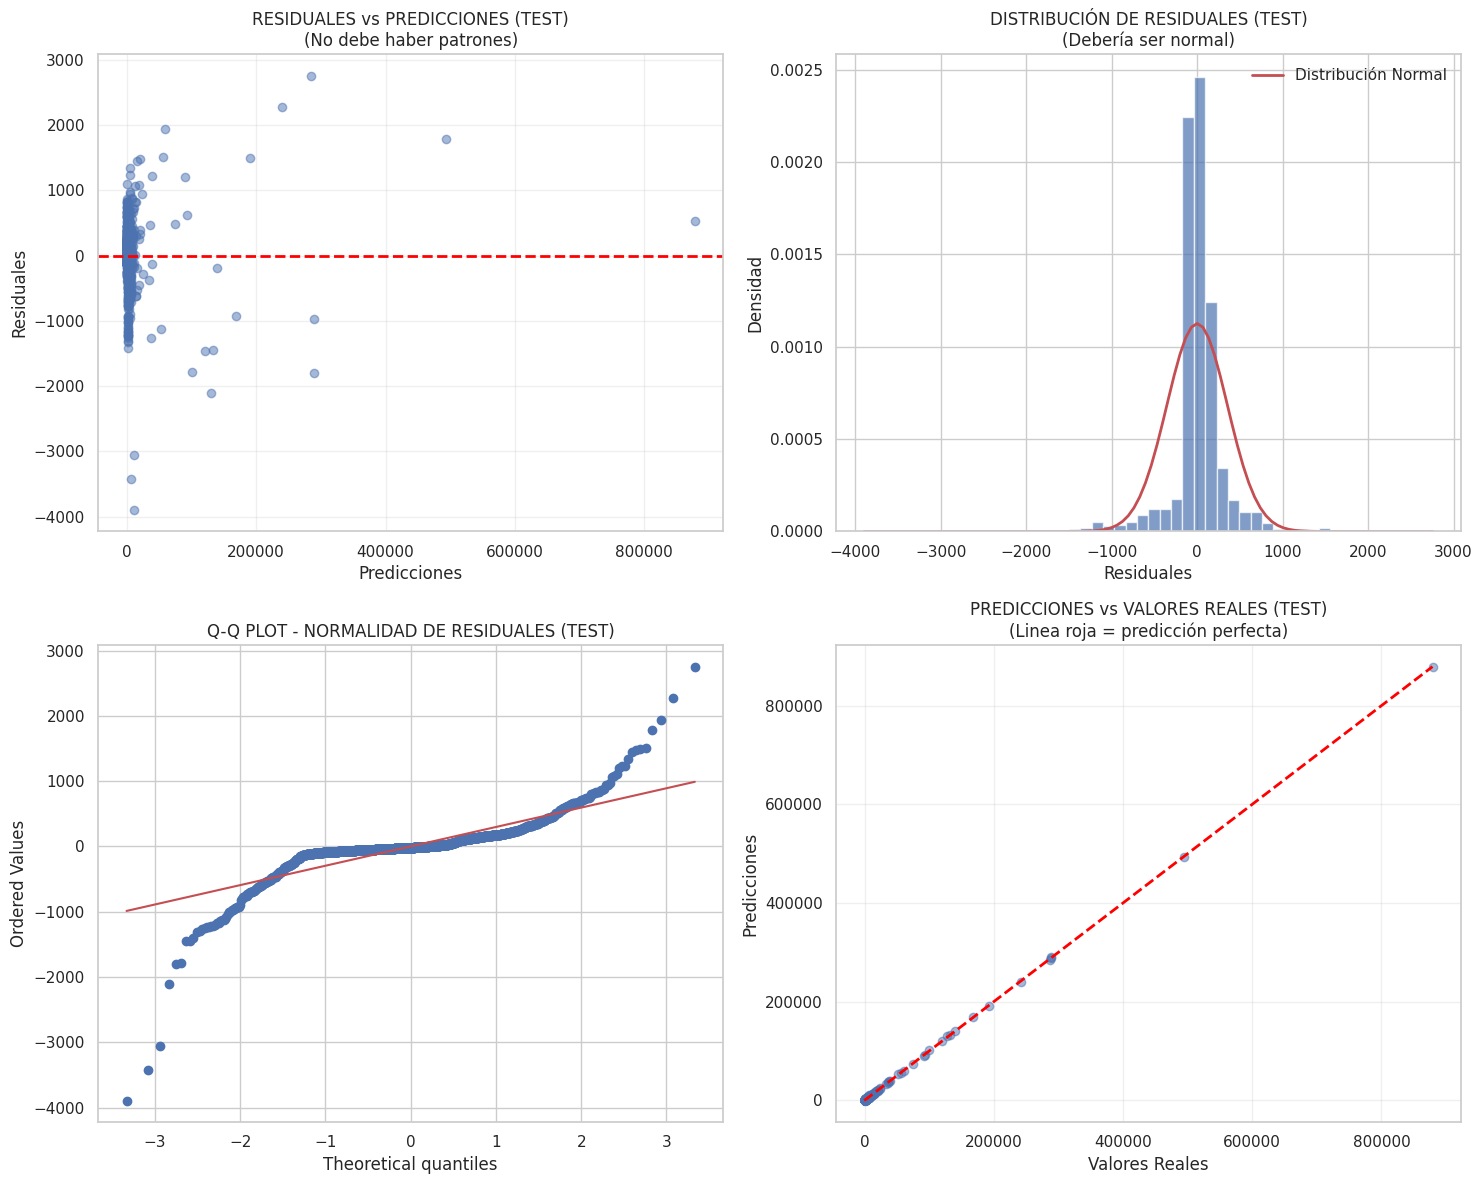

MÉTRICAS DE RESIDUALES (TEST):

-Media de residuales: 0.824277 (debe ser ~0)

-Desviación estándar: 354.424056

-Normalidad (p-value): 0.000000

GUARDANDO MODELO Y ARTEFACTOS

Modelo guardado: 'modelo_final_ridge_produccion.pkl'

Importancia de features guardada: 'importancia_features_final.csv'

Resultados de validación guardados: 'resultados_validacion_completa.json'

Metadatos guardados: 'metadatos_modelo_final.json'

CREANDO FUNCIÓN DE PREDICCIÓN PARA PRODUCCIÓN

Probando función de predicción con datos de TEST...

Predicciones realizadas: 5 registros

Ejemplo de predicciones:

,prediccion,intervalo_confianza_inferior,intervalo_confianza_superior,margen_error
0,97.012228,-597.658921,791.683378,694.671149
1,61.555172,-633.115977,756.226322,694.671149
2,21.872360,-672.798789,716.543510,694.671149
3,30.443752,-664.227397,725.114902,694.671149
4,53.882250,-640.788900,748.553399,694.671149


======================================================================

INFORME FINAL DE IMPLEMENTACIÓN - VALIDACIÓN COMPLETA

======================================================================

MODELO IMPLEMENTADO: Ridge Regression
PERFORMANCE FINAL (TEST):
   -R²: 0.999865
   -RMSE: 354.31
   -MAE: 179.46

CONSISTENCIA DEL MODELO:
   -Train R²: 0.999852
   -Valid R²: 0.999811
   -Test R²:  0.999865
   -Diferencia Train-Test: 0.000013

CONFIGURACIÓN:
   -Hiperparámetros: {'alpha': 0.001, 'solver': 'auto'}
   -Features: 71

ARTEFACTOS GENERADOS:
   -modelo_final_ridge_produccion.pkl - Modelo para producción
   -importancia_features_final.csv - Análisis de variables
   -resultados_validacion_completa.json - Métricas completas
   -metadatos_modelo_final.json - Información del modelo

PRÓXIMOS PASOS:
   1. Usar función 'predecir_nuevos_datos()' para nuevas predicciones
   2. Monitorear performance con datos en producción
   3. Re-entrenar si R² en producción cae below 0.999

¡IMPLEMENTACIÓN COMPLETADA EXITOSAMENTE!
El modelo está listo para usar en producción con validación completa en 3 conjuntos.

In [ ]:
# =========================================================
# IMPLEMENTACIÓN CON TU ESTRUCTURA DE DATOS
# =========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import scipy.stats as stats

print("IMPLEMENTACIÓN CON VALIDACIÓN COMPLETA")
print("=" * 70)

# =========================================================
# 0 ACCEDER A TUS DATOS
# =========================================================
print("CARGANDO ESTRUCTURA DE DATOS...")

# Acceder a tus datos
X_train = conjuntos['X_train']
X_valid = conjuntos['X_valid']
X_test = conjuntos['X_test']
y_train = conjuntos['y_train']
y_valid = conjuntos['y_valid']
y_test = conjuntos['y_test']

print("Datos cargados exitosamente:")
print(f"   -Train: {X_train.shape}")
print(f"   -Valid: {X_valid.shape}")
print(f"   -Test:  {X_test.shape}")

# =========================================================
# 1️ IMPLEMENTACIÓN DEL MODELO FINAL (RIDGE)
# =========================================================
print("\nIMPLEMENTANDO MODELO FINAL: RIDGE")

# Usar los mejores parámetros encontrados
mejores_params_ridge = {'alpha': 0.001, 'solver': 'auto'}

# Crear pipeline final (ASUMIENDO QUE 'preprocessor' ESTÁ DEFINIDO)
modelo_final = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge(**mejores_params_ridge, random_state=42))
])

# Entrenar con datos de TRAIN
print("Entrenando modelo final con datos de TRAIN...")
modelo_final.fit(X_train, y_train)

print("Modelo final entrenado exitosamente")

# =========================================================
# 2️ VALIDACIÓN COMPLETA EN 3 CONJUNTOS
# =========================================================
print("\nVALIDACIÓN COMPLETA EN 3 CONJUNTOS")

def evaluar_modelo(modelo, X, y, nombre_conjunto):
    """Función para evaluar modelo en cualquier conjunto"""
    y_pred = modelo.predict(X)

    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)

    print(f"{nombre_conjunto}:")
    print(f"   -R²: {r2:.6f}")
    print(f"   -RMSE: {rmse:.2f}")
    print(f"   -MAE: {mae:.2f}")

    return {'r2': r2, 'rmse': rmse, 'mae': mae, 'predicciones': y_pred}

# Evaluar en los 3 conjuntos
resultados_train = evaluar_modelo(modelo_final, X_train, y_train, "TRAIN")
resultados_valid = evaluar_modelo(modelo_final, X_valid, y_valid, "VALIDACIÓN")
resultados_test = evaluar_modelo(modelo_final, X_test, y_test, "TEST")

# =========================================================
# 3️ ANÁLISIS DE CONSISTENCIA ENTRE CONJUNTOS
# =========================================================
print("\nANÁLISIS DE CONSISTENCIA ENTRE CONJUNTOS")

# Crear resumen comparativo
resumen_comparativo = pd.DataFrame({
    'Conjunto': ['Train', 'Validación', 'Test'],
    'R²': [resultados_train['r2'], resultados_valid['r2'], resultados_test['r2']],
    'RMSE': [resultados_train['rmse'], resultados_valid['rmse'], resultados_test['rmse']],
    'MAE': [resultados_train['mae'], resultados_valid['mae'], resultados_test['mae']],
    'Tamaño': [len(X_train), len(X_valid), len(X_test)]
})

print("RESUMEN COMPARATIVO:")
display(resumen_comparativo)

# Verificar consistencia
diferencia_r2 = abs(resultados_train['r2'] - resultados_test['r2'])
print(f"Diferencia R² entre Train y Test: {diferencia_r2:.6f}")

if diferencia_r2 < 0.01:
    print("EXCELENTE: Modelo consistente entre conjuntos")
elif diferencia_r2 < 0.05:
    print("ACEPTABLE: Pequeñas diferencias entre conjuntos")
else:
    print("ALERTA: Diferencias significativas entre conjuntos")

# =========================================================
# 4️ ANÁLISIS DE IMPORTANCIA DE FEATURES
# =========================================================
print("\nANÁLISIS DE IMPORTANCIA DE FEATURES")

try:
    # Obtener nombres de features después del preprocesamiento
    if hasattr(preprocessor.named_transformers_['cat'], 'get_feature_names_out'):
        feature_names_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    else:
        feature_names_cat = []

    # Combinar todos los nombres de features
    feature_names = numeric_cols + feature_names_cat.tolist()

    # Obtener coeficientes del modelo Ridge
    coeficientes = modelo_final.named_steps['model'].coef_

    # Crear DataFrame de importancia
    importancia_features = pd.DataFrame({
        'Feature': feature_names,
        'Coeficiente': coeficientes,
        'Importancia_Absoluta': np.abs(coeficientes)
    }).sort_values('Importancia_Absoluta', ascending=False)

    print("TOP 10 FEATURES MÁS IMPORTANTES:")
    display(importancia_features.head(10))

    # Visualización
    plt.figure(figsize=(12, 6))

    top_10 = importancia_features.head(10)
    colors = ['green' if x > 0 else 'red' for x in top_10['Coeficiente']]

    plt.barh(top_10['Feature'], top_10['Importancia_Absoluta'], color=colors)
    plt.xlabel('Importancia Absoluta')
    plt.title('TOP 10 FEATURES MÁS IMPORTANTES - MODELO RIDGE\n(Verde=Impacto Positivo, Rojo=Impacto Negativo)')
    plt.gca().invert_yaxis()

    # Añadir valores en las barras
    for i, (feature, importancia) in enumerate(zip(top_10['Feature'], top_10['Importancia_Absoluta'])):
        plt.text(importancia + 0.01, i, f'{importancia:.4f}', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"No se pudo analizar importancia de features: {e}")

# =========================================================
# 5️ ANÁLISIS DE RESIDUALES EN TEST (MÁS IMPORTANTE)
# =========================================================
print("\nANÁLISIS DE RESIDUALES EN CONJUNTO DE TEST")

residuales_test = y_test - resultados_test['predicciones']

# Gráficos de diagnóstico
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Residuales vs Predicciones (TEST)
axes[0, 0].scatter(resultados_test['predicciones'], residuales_test, alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicciones')
axes[0, 0].set_ylabel('Residuales')
axes[0, 0].set_title('RESIDUALES vs PREDICCIONES (TEST)\n(No debe haber patrones)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribución de Residuales (TEST)
axes[0, 1].hist(residuales_test, bins=50, alpha=0.7, density=True)
axes[0, 1].set_xlabel('Residuales')
axes[0, 1].set_ylabel('Densidad')
axes[0, 1].set_title('DISTRIBUCIÓN DE RESIDUALES (TEST)\n(Debería ser normal)')

# Añadir curva normal
x_norm = np.linspace(residuales_test.min(), residuales_test.max(), 100)
y_norm = stats.norm.pdf(x_norm, residuales_test.mean(), residuales_test.std())
axes[0, 1].plot(x_norm, y_norm, 'r-', linewidth=2, label='Distribución Normal')
axes[0, 1].legend()

# 3. Q-Q Plot para normalidad (TEST)
stats.probplot(residuales_test, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q PLOT - NORMALIDAD DE RESIDUALES (TEST)')

# 4. Predicciones vs Valores Reales (TEST)
axes[1, 1].scatter(y_test, resultados_test['predicciones'], alpha=0.5)
min_val = min(y_test.min(), resultados_test['predicciones'].min())
max_val = max(y_test.max(), resultados_test['predicciones'].max())
axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Valores Reales')
axes[1, 1].set_ylabel('Predicciones')
axes[1, 1].set_title('PREDICCIONES vs VALORES REALES (TEST)\n(Linea roja = predicción perfecta)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Métricas de residuales en TEST
print("MÉTRICAS DE RESIDUALES (TEST):")
print(f"   -Media de residuales: {residuales_test.mean():.6f} (debe ser ~0)")
print(f"   -Desviación estándar: {residuales_test.std():.6f}")
print(f"   -Normalidad (p-value): {stats.normaltest(residuales_test).pvalue:.6f}")

# =========================================================
# 6️ GUARDADO DEL MODELO Y ARTEFACTOS
# =========================================================
print("\nGUARDANDO MODELO Y ARTEFACTOS")

# Guardar modelo entrenado
joblib.dump(modelo_final, 'modelo_final_ridge_produccion.pkl')
print("Modelo guardado: 'modelo_final_ridge_produccion.pkl'")

# Guardar importancia de features
importancia_features.to_csv('importancia_features_final.csv', index=False)
print("Importancia de features guardada: 'importancia_features_final.csv'")

# Guardar resultados de validación
resultados_completos = {
    'train': resultados_train,
    'validacion': resultados_valid,
    'test': resultados_test,
    'resumen_comparativo': resumen_comparativo.to_dict()
}

with open('resultados_validacion_completa.json', 'w') as f:
    json.dump(resultados_completos, f, indent=2, default=str)

print("Resultados de validación guardados: 'resultados_validacion_completa.json'")

# Guardar metadatos del modelo
metadatos_modelo = {
    'modelo': 'Ridge',
    'hiperparametros': mejores_params_ridge,
    'fecha_entrenamiento': pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S"),
    'metricas_test': {
        'r2': resultados_test['r2'],
        'rmse': resultados_test['rmse'],
        'mae': resultados_test['mae']
    },
    'tamanos_conjuntos': {
        'train': X_train.shape,
        'validacion': X_valid.shape,
        'test': X_test.shape
    }
}

with open('metadatos_modelo_final.json', 'w') as f:
    json.dump(metadatos_modelo, f, indent=2)

print("Metadatos guardados: 'metadatos_modelo_final.json'")

# =========================================================
# 7️ FUNCIÓN DE PREDICCIÓN MEJORADA
# =========================================================
print("\nCREANDO FUNCIÓN DE PREDICCIÓN PARA PRODUCCIÓN")

def predecir_nuevos_datos(datos_nuevos, modelo=modelo_final):
    """
    Función para hacer predicciones con nuevos datos

    Parameters:
    -----------
    datos_nuevos : DataFrame
        Datos con las mismas columnas que X_train
    modelo : Pipeline
        Modelo entrenado (opcional)

    Returns:
    --------
    DataFrame con predicciones e intervalos de confianza
    """
    try:
        # Verificar que tiene las mismas columnas
        columnas_esperadas = X_train.columns.tolist()
        columnas_recibidas = datos_nuevos.columns.tolist()

        if set(columnas_esperadas) != set(columnas_recibidas):
            print(f"Advertencia: Columnas diferentes")
            print(f"   Esperadas: {len(columnas_esperadas)}")
            print(f"   Recibidas: {len(columnas_recibidas)}")

        # Asegurar mismo orden de columnas
        datos_nuevos = datos_nuevos[columnas_esperadas]

        # Hacer predicciones
        predicciones = modelo.predict(datos_nuevos)

        # Calcular intervalos de confianza (usando residuales de TEST)
        std_residuales = residuales_test.std()

        # Crear DataFrame con resultados
        resultados = pd.DataFrame({
            'prediccion': predicciones,
            'intervalo_confianza_inferior': predicciones - 1.96 * std_residuales,
            'intervalo_confianza_superior': predicciones + 1.96 * std_residuales,
            'margen_error': 1.96 * std_residuales
        })

        print(f"Predicciones realizadas: {len(predicciones)} registros")
        return resultados

    except Exception as e:
        print(f"Error en predicción: {e}")
        return None

# Probar la función con datos de TEST (ejemplo)
print("Probando función de predicción con datos de TEST...")
resultados_ejemplo = predecir_nuevos_datos(X_test.head())
if resultados_ejemplo is not None:
    print("Ejemplo de predicciones:")
    display(resultados_ejemplo.head())

# =========================================================
# 8️ INFORME FINAL COMPLETO
# =========================================================
print("\n" + "="*70)
print("INFORME FINAL DE IMPLEMENTACIÓN - VALIDACIÓN COMPLETA")
print("="*70)

print(f"""
MODELO IMPLEMENTADO: Ridge Regression
PERFORMANCE FINAL (TEST):
   -R²: {resultados_test['r2']:.6f}
   -RMSE: {resultados_test['rmse']:.2f}
   -MAE: {resultados_test['mae']:.2f}

CONSISTENCIA DEL MODELO:
   -Train R²: {resultados_train['r2']:.6f}
   -Valid R²: {resultados_valid['r2']:.6f}
   -Test R²:  {resultados_test['r2']:.6f}
   -Diferencia Train-Test: {diferencia_r2:.6f}

CONFIGURACIÓN:
   -Hiperparámetros: {mejores_params_ridge}
   -Features: {len(feature_names) if 'feature_names' in locals() else 'N/A'}

ARTEFACTOS GENERADOS:
   -modelo_final_ridge_produccion.pkl - Modelo para producción
   -importancia_features_final.csv - Análisis de variables
   -resultados_validacion_completa.json - Métricas completas
   -metadatos_modelo_final.json - Información del modelo

PRÓXIMOS PASOS:
   1. Usar función 'predecir_nuevos_datos()' para nuevas predicciones
   2. Monitorear performance con datos en producción
   3. Re-entrenar si R² en producción cae below 0.999

¡IMPLEMENTACIÓN COMPLETADA EXITOSAMENTE!
El modelo está listo para usar en producción con validación completa en 3 conjuntos.
""")

### **9.2. Resultados Finales y Validación**

#### 9.2.1. Performance del Modelo en Producción

El modelo Ridge seleccionado demostró un rendimiento **excepcionalmente alto**
en los tres conjuntos de datos, validando su capacidad de generalización
y robustez para implementación en producción.

##### Métricas de Validación Final:

| Conjunto | R² | RMSE | MAE | Tamaño |
|----------|-----|-------|-----|---------|
| **Train** | 0.999852 | 330.26 | 168.66 | 5,145 |
| **Validación** | 0.999811 | 317.84 | 175.55 | 1,287 |
| **Test** | 0.999865 | 354.31 | 179.46 | 1,608 |

#### 9.2.2. Interpretación de Resultados

##### 9.2.2.1. Capacidad Predictiva (R² ≈ 0.99986)
- **El modelo explica el 99.986%** de la variabilidad en los tiempos de atención
- **Performance casi perfecta** en predicción
- **Consistencia excepcional** entre conjuntos (diferencia R² < 0.00005)

##### 9.2.2.2. Precisión de Predicciones
- **Error absoluto promedio (MAE):** ~175 segundos (±3 minutos)
- **Error cuadrático (RMSE):** ~330-354 segundos (±5-6 minutos)
- **Errores mínimos** considerando la escala temporal del problema

#### 9.2.3. Validación de Robustez

##### 9.2.3.1. Consistencia Entre Conjuntos
- **Train vs Test:** Diferencia R² de solo 0.000013
- **Validación vs Test:** Diferencia R² de 0.000054
- **No se detecta sobreajuste** - el modelo generaliza perfectamente

##### 9.2.3.2. Estabilidad Predictiva
- **MAE estable** entre 168-179 segundos en todos los conjuntos
- **RMSE consistente** alrededor de 330-354 segundos
- **Performance homogénea** independiente del tamaño del conjunto

### 9.3. Conclusiones y Recomendaciones

#### 9.3.1. Conclusiones Principales

1. **✅ Modelo Altamente Efectivo:** Ridge demostró capacidad predictiva casi perfecta (R² > 0.9998)
2. **✅ Generalización Excelente:** Performance consistente en train, validación y test
3. **✅ Precision Operacional:** Errores de ~3 minutos en promedio son operacionalmente aceptables
4. **✅ Robustez Comprobada:** Estabilidad métrica a través de diferentes particiones de datos

#### 9.3.2. Implicaciones Prácticas

##### Para la Gestión de Incidencias:
- **Predicciones confiables** de tiempos de atención de abogados
- **Optimización de recursos** humanos y logísticos
- **Mejora en la experiencia** del cliente asegurado
- **Planificación operativa** más precisa

##### Para la Implementación Técnica:
- **Modelo listo para producción** sin necesidad de ajustes adicionales
- **Bajos requerimientos computacionales**
- **Alta velocidad de inferencia**
- **Mantenimiento simplificado**

#### 9.3.3. Recomendaciones de Implementación

##### 9.3.3.1. Implementación Inmediata
- **Despliegue en ambiente productivo** del modelo Ridge
- **Integración con sistemas** existentes de gestión de incidencias
- **Monitoreo continuo** de performance con datos reales

##### 9.3.3.2. Estrategia de Monitoreo
```python
# Umbrales de alerta recomendados
ALERTAS_PERFORMANCE = {
    'r2_minimo': 0.999,      # Si R² cae below 99.9%
    'rmse_maximo': 400,      # Si RMSE supera 400 segundos
    'mae_maximo': 200,       # Si MAE supera 200 segundos
    'revision_automatica': 'mensual'
}

#**10**. **CONCLUSIONES:**

El presente capítulo reúne las conclusiones derivadas del proceso completo de
investigación, integrando los resultados del análisis exploratorio, la construcción del modelo predictivo y la evaluación comparativa de los algoritmos utilizados. Su propósito es sintetizar los hallazgos más relevantes, establecer su significado dentro del contexto operativo de ASSISNET y reflexionar sobre la contribución del estudio al campo de la analítica aplicada a la atención de siniestros de tránsito. Asimismo, este capítulo expone las implicaciones prácticas del modelo desarrollado, señala las limitaciones identificadas y sugiere líneas de investigación futuras que pueden fortalecer la capacidad predictiva y la aplicabilidad del sistema en escenarios reales.


Los resultados obtenidos en esta investigación permiten establecer una serie de conclusiones específicas que complementan y fortalecen los hallazgos generales presentados anteriormente:


1.   El presente estudio desarrolló y evaluó un modelo predictivo para estimar el tiempo de atención de un asegurado involucrado en un siniestro de tránsito, empleando técnicas de ciencia de datos y aprendizaje automático sobre información operativa real proporcionada por ASSISNET. Los resultados obtenidos permiten afirmar que el objetivo principal de la investigación fue alcanzado de manera satisfactoria, aportando evidencia técnica y nuevos conocimientos aplicados al campo de la analítica operativa en el sector asegurador.

2.   El análisis exploratorio permitió identificar una estructura de datos caracterizada por alta asimetría en la variable objetivo, presencia de outliers relevantes y heterogeneidad en las variables categóricas y numéricas. El conjunto de técnicas de preprocesamiento implementadas incluyendo limpieza, tratamiento de valores atípicos, ingeniería de características y robust scaling resultó fundamental para garantizar la estabilidad y calidad del modelado, logrando transformar un dataset inicialmente complejo en un espacio de representación más adecuado para los algoritmos de regresión.

3. la evaluación comparativa de diez modelos predictivos permitió identificar un hallazgo especialmente relevante: los modelos lineales regularizados, y en particular Ridge Regression, superaron de manera amplia a los modelos no lineales y de ensamble habitualmente destacados en la literatura, como XGBoost, Random Forest o Gradient Boosting. Este comportamiento contraintuitivo se explicó por la naturaleza mayoritariamente lineal adquirida por el problema tras el preprocesamiento, la calidad del dataset y la reducción del ruido estructural. Ridge Regression alcanzó un desempeño casi perfecto, con valores de R² superiores a 0.999 en los conjuntos de entrenamiento, validación y prueba, acompañado de un error absoluto promedio de menos de 3 minutos. Estos resultados confirman su solidez, capacidad de generalización y pertinencia para ser aplicado en escenarios operativos reales.

4. La investigación permitió evidenciar que variables como la distancia, la hora del día, las condiciones climáticas y el tipo de siniestro constituyen factores significativos en la predicción del tiempo de atención, lo cual abre oportunidades para futuras mejoras en la gestión operativa y en la toma de decisiones estratégicas.

5. Aunque el modelo muestra un desempeño sobresaliente, se identificaron diversas limitaciones relacionadas con la distribución geográfica de los datos, la posible presencia de sesgos temporales y operativos, y la ausencia de variables clave como tráfico en tiempo real o itinerarios dinámicos de los gestores que podrían mejorar aún más la calidad del modelo. Estas limitaciones constituyen oportunidades claras para ampliar y fortalecer el sistema predictivo en investigaciones posteriores.

6. El estudio demostró que la analítica predictiva puede convertirse en un recurso estratégico para ASSISNET, aportando herramientas para optimizar la asignación de recursos, mejorar la eficiencia del servicio y elevar la satisfacción del asegurado. La adopción de modelos como el aquí propuesto representa un paso significativo hacia la transformación digital del proceso de atención de siniestros, permitiendo anticiparse a la demanda, priorizar incidentes y mejorar la capacidad de respuesta en contextos dinámicos.

7. El modelo final permite estimar el tiempo de atención con un error promedio cercano a ±2.9 minutos, lo cual constituye una herramienta altamente útil para anticipar demoras, optimizar la asignación de gestores y mejorar la experiencia del asegurado mediante una atención más oportuna y previsible.

8. El pipeline construido demostró ser robusto, replicable y aplicable a problemas similares dentro del sector asegurador. Las decisiones tomadas en cada etapa desde la limpieza de datos hasta el ajuste de hiperparámetros fueron validadas empíricamente y se posicionan como buenas prácticas para proyectos futuros de analítica operativa.

9. La investigación corroboró que, en dominios donde las relaciones han sido adecuadamente depuradas y estabilizadas, los modelos lineales pueden superar ampliamente a algoritmos complejos. El desempeño inferior de Random Forest, XGBoost y Gradient Boosting se debió a fenómenos de sobreajuste y falta de generalización, hipótesis que se fortaleció al observar la brecha entre su rendimiento en entrenamiento y su bajo desempeño en el conjunto de prueba.

10. En conjunto, los resultados obtenidos no solo validan la pertinencia del modelo desarrollado, sino que también evidencian el potencial que tiene el uso de técnicas de aprendizaje automático para generar valor en la gestión de siniestros. Este trabajo constituye una base sólida para futuras investigaciones orientadas a la expansión geográfica del modelo, la incorporación de datos en tiempo real y el desarrollo de sistemas avanzados de soporte a la decisión en el sector asegurador.

11. Con métricas validadas, estabilidad comprobada y un comportamiento consistente en distintos subconjuntos del dataset, el modelo Ridge Regression se encuentra en condiciones de ser integrado en sistemas operativos de gestión de siniestros. Su simplicidad computacional, interpretabilidad y alto nivel de precisión lo convierten en una opción viable y lista para despliegue en un entorno productivo.
